#### installing packages
DESeq2, dplyr, EnhancedVolcano

In [1]:
options(repr.plot.width=15, repr.plot.height=15)

In [2]:
library(DESeq2)
# this only works when i'm in r-env

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'EnhancedVolcano'”
Old packages: 'BH', 'brew', 'brio', 'bslib', 'curl', 'data.table', 'DBI',
  'desc', 'digest', 'GenomicAlignments', 'ggfun', 'ggrepel', 'glue',
  'GOSemSim', 'graphlayouts', 'haven', 'htmlwidgets', 'httpuv', 'MASS',
  'Matrix', 'mgcv', 'nlme', 'patchwork', 'pbdZMQ', 'pkgbuild', 'pkgload', 'ps',
  'ragg', 'Rcpp', 'RcppArmadillo', 'RCurl', 'readr', 'reprex', 'rlang',
  'RSQLite', 'scales', 'shadowtext', 'shiny', 'SparseArray', 'testthat',
  'timechange', 'uuid', 'vroom', 'withr', 'xml2', 'yulab.utils'



In [5]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



#### loading in data frames
specifically the meta data, counts matrices, and gtf file

In [6]:
meta = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/CV_CE18_meta.csv")
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
2,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
3,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
4,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
5,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
6,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


In [7]:
# counts matrix generated from htseq-counts, with type=exon
counts_exon = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_exon.txt", sep='\t')
head(counts_exon)

,X,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,⋯,X0.20,X0.21,X0.22,X0.23,X0.24,X0.25,X0.26,X0.27,X0.28,X0.29
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111099029,5,12,14,11,14,12,9,14,11,⋯,9,6,1,30,12,15,0,0,3,0
2,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111099031,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111099032,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099033,0,0,10,0,1,0,0,0,0,⋯,1,0,0,1,0,0,0,0,0,0
6,LOC111099034,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [8]:
# counts matrix generated from htseq-counts, with type=gene
counts_gene = read.csv("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_gene.txt", sep='\t')
head(counts_gene)

,ATP6,X0,X0.1,X0.2,X0.3,X0.4,X0.5,X0.6,X0.7,X0.8,⋯,X0.20,X0.21,X0.22,X0.23,X0.24,X0.25,X0.26,X0.27,X0.28,X0.29
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,COX1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,COX2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,COX3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,CYTB,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099029,7,13,15,11,16,12,9,15,11,⋯,9,6,1,30,13,15,0,0,4,0
6,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
# comparing dimensions of counts_exon and counts_gene
dim(counts_exon) #38,833 rows
dim(counts_gene) #39,509 rows

[1] 38833    31

[1] 39509    31

loading in gtf file

In [10]:
gtf_file <- "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/assembly/reference_genomes/genomic.gtf"

# Read GTF file with read.table
gtf_data <- read.table(gtf_file, header = FALSE, sep = "\t", comment.char = "#", quote = "", stringsAsFactors = FALSE)

# add column names manually
colnames(gtf_data) <- c("seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attributes")

In [11]:
head(gtf_data)

,seqname,source,feature,start,end,score,strand,frame,attributes
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,NC_035780.1,Gnomon,gene,13578,14594,.,+,.,"gene_id ""LOC111116054""; db_xref ""GeneID:111116054""; gbkey ""Gene""; gene ""LOC111116054""; gene_biotype ""lncRNA"";"
2,NC_035780.1,Gnomon,exon,13578,13603,.,+,.,"gene_id ""LOC111116054""; transcript_id ""XR_002636969.1""; db_xref ""GeneID:111116054""; gbkey ""ncRNA""; gene ""LOC111116054""; model_evidence ""Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns""; product ""uncharacterized LOC111116054""; exon_number ""1"";"
3,NC_035780.1,Gnomon,exon,14237,14290,.,+,.,"gene_id ""LOC111116054""; transcript_id ""XR_002636969.1""; db_xref ""GeneID:111116054""; gbkey ""ncRNA""; gene ""LOC111116054""; model_evidence ""Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns""; product ""uncharacterized LOC111116054""; exon_number ""2"";"
4,NC_035780.1,Gnomon,exon,14557,14594,.,+,.,"gene_id ""LOC111116054""; transcript_id ""XR_002636969.1""; db_xref ""GeneID:111116054""; gbkey ""ncRNA""; gene ""LOC111116054""; model_evidence ""Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 1 sample with support for all annotated introns""; product ""uncharacterized LOC111116054""; exon_number ""3"";"
5,NC_035780.1,Gnomon,gene,28961,33324,.,+,.,"gene_id ""LOC111126949""; db_xref ""GeneID:111126949""; gbkey ""Gene""; gene ""LOC111126949""; gene_biotype ""protein_coding"";"
6,NC_035780.1,Gnomon,exon,28961,29073,.,+,.,"gene_id ""LOC111126949""; transcript_id ""XM_022471938.1""; db_xref ""GeneID:111126949""; gbkey ""mRNA""; gene ""LOC111126949""; model_evidence ""Supporting evidence includes similarity to: 3 Proteins, and 100% coverage of the annotated genomic feature by RNAseq alignments, including 21 samples with support for all annotated introns""; product ""UNC5C-like protein""; exon_number ""1"";"


#### cleaning data frames

setting the unique IDs as the rownames for meta 

In [12]:
rownames(meta) = meta$unique_ID
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control


adding the row names of meta as the column names of both counts_exon and counts_gene

In [13]:
colnames(counts_exon) = c('gene', rownames(meta))
head(counts_exon)

colnames(counts_gene) = c('gene', rownames(meta))
head(counts_gene)

,gene,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,LOC111099029,5,12,14,11,14,12,9,14,11,⋯,9,6,1,30,12,15,0,0,3,0
2,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,LOC111099031,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,LOC111099032,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099033,0,0,10,0,1,0,0,0,0,⋯,1,0,0,1,0,0,0,0,0,0
6,LOC111099034,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,gene,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,COX1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,COX2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,COX3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,CYTB,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,LOC111099029,7,13,15,11,16,12,9,15,11,⋯,9,6,1,30,13,15,0,0,4,0
6,LOC111099030,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


making the genes column for both counts_exon and counts_gene be the index

In [14]:
rownames(counts_exon) = counts_exon$gene # setting row names = gene
counts_exon = counts_exon[,2:31] # dropping gene column 
head(counts_exon)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
LOC111099029,5,12,14,11,14,12,9,14,11,1,⋯,9,6,1,30,12,15,0,0,3,0
LOC111099030,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111099031,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111099032,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111099033,0,0,10,0,1,0,0,0,0,0,⋯,1,0,0,1,0,0,0,0,0,0
LOC111099034,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
rownames(counts_gene) = counts_gene$gene # setting row names = gene
counts_gene = counts_gene[,2:31] # dropping gene column 
head(counts_gene)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
COX1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
COX2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
COX3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CYTB,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC111099029,7,13,15,11,16,12,9,15,11,1,⋯,9,6,1,30,13,15,0,0,4,0
LOC111099030,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [16]:
# have to remove extra info/'gunk' at bottom of counts_gene that is generated from htseq-counts
counts_gene = counts_gene[1:39504,]
tail(counts_gene)

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WBR-BBY-W25,WBV-WBO-W23,WBV-WBR-W12,WBY-BBV-W65,WBY-BBY-W30,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Trnay-gua_4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_7,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Trnay-gua_9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [17]:
#### unique phase treatments for the samples
unique(meta$Phase1) # 'hypoxic''both''control''warm'
unique(meta$Phase2) # 'control''hypoxic''both'

[1] "hypoxic" "both"    "control" "warm"

[1] "control" "hypoxic" "both"

looking at https://htseq.readthedocs.io/en/master/features.html

trying to match up gtf file with genes file (counts matrix) - although might not need to do rn

In [18]:
# filtering gtf_data for only rows with gene
gtf_genes = filter(gtf_data, gtf_data$feature == 'gene')
dim(gtf_genes) # 39,505 rows

[1] 39505     9

In [19]:
dim(counts_gene) #39,509 rows

[1] 39504    30

okay so I'm pretty sure I've got the gtf data and the counts matrix to line up - except the counts_gene df has these CO... genes - checking to see if those are also in gtf_genes or if I should remove them

creating a new column in the gtf file to add just the gene_id info - this will help with matching up the counts_gene df

In [20]:
# Extract gene_id
gtf_genes$gene_id <- gsub('.*gene_id "(.*?)";.*', '\\1', gtf_genes$attributes)

# set row names as the gene_id
rownames(gtf_genes) = gtf_genes$gene_id
head(gtf_genes)

,seqname,source,feature,start,end,score,strand,frame,attributes,gene_id
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111116054,NC_035780.1,Gnomon,gene,13578,14594,.,+,.,"gene_id ""LOC111116054""; db_xref ""GeneID:111116054""; gbkey ""Gene""; gene ""LOC111116054""; gene_biotype ""lncRNA"";",LOC111116054
LOC111126949,NC_035780.1,Gnomon,gene,28961,33324,.,+,.,"gene_id ""LOC111126949""; db_xref ""GeneID:111126949""; gbkey ""Gene""; gene ""LOC111126949""; gene_biotype ""protein_coding"";",LOC111126949
LOC111110729,NC_035780.1,Gnomon,gene,43111,66897,.,-,.,"gene_id ""LOC111110729""; db_xref ""GeneID:111110729""; gbkey ""Gene""; gene ""LOC111110729""; gene_biotype ""protein_coding"";",LOC111110729
LOC111112434,NC_035780.1,Gnomon,gene,85606,95254,.,-,.,"gene_id ""LOC111112434""; db_xref ""GeneID:111112434""; gbkey ""Gene""; gene ""LOC111112434""; gene_biotype ""protein_coding"";",LOC111112434
LOC111120752,NC_035780.1,Gnomon,gene,99840,106460,.,+,.,"gene_id ""LOC111120752""; db_xref ""GeneID:111120752""; gbkey ""Gene""; gene ""LOC111120752""; gene_biotype ""protein_coding"";",LOC111120752
LOC111128944,NC_035780.1,Gnomon,gene,108305,110077,.,-,.,"gene_id ""LOC111128944""; db_xref ""GeneID:111128944""; gbkey ""Gene""; gene ""LOC111128944""; gene_biotype ""protein_coding""; partial ""true"";",LOC111128944


In [21]:
# Checking if the genes in counts_genes are also in gtf_genes
genes_in_both <- rownames(gtf_genes) %in% rownames(counts_gene)

# looking at what's FALSE (in gtf_genes but not in counts_gene)
#sum(!genes_in_both) # only 1 FALSE
false_cg = gtf_genes[!genes_in_both,]
false_cg #ATP6 is in gtf_genes, but not in counts_gene

# Pulling out only the rows in gtf_genes that match the genes in counts_genes
gtf_genes1 <- gtf_genes[genes_in_both,]

,seqname,source,feature,start,end,score,strand,frame,attributes,gene_id
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
ATP6,NC_007175.2,RefSeq,gene,9518,10192,.,+,.,"gene_id ""ATP6""; db_xref ""GeneID:3453229""; gbkey ""Gene""; gene ""ATP6""; gene_biotype ""protein_coding"";",ATP6


In [22]:
dim(gtf_genes1) #39,504 - removed row that didn't match in counts_gene
dim(counts_gene) #39,504

# OG gtf file of genes
dim(gtf_genes) # 39,505

[1] 39504    10

[1] 39504    30

[1] 39505    10

In [23]:
# removing gene_id column - not necessary
gtf_genes1 <- gtf_genes1[, -ncol(gtf_genes)]

# adding dataframes together 
counts_meta <- cbind(counts_gene, gtf_genes1)

# checking out the new df - making sure things make sense
dim(counts_meta) 
# 39,504 rows for 39,504 genes
# 39 columns for 30 samples + 9 gtf columns 
head(counts_meta)

[1] 39504    39

,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,BBO-BBY-B27,BBO-WBO-B16,BBO-WBV-B64,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,BBY-WBG-B42,⋯,WPV-BPR-G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
COX1,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,13578,14594,.,+,.,"gene_id ""LOC111116054""; db_xref ""GeneID:111116054""; gbkey ""Gene""; gene ""LOC111116054""; gene_biotype ""lncRNA"";"
COX2,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,28961,33324,.,+,.,"gene_id ""LOC111126949""; db_xref ""GeneID:111126949""; gbkey ""Gene""; gene ""LOC111126949""; gene_biotype ""protein_coding"";"
COX3,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,43111,66897,.,-,.,"gene_id ""LOC111110729""; db_xref ""GeneID:111110729""; gbkey ""Gene""; gene ""LOC111110729""; gene_biotype ""protein_coding"";"
CYTB,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,85606,95254,.,-,.,"gene_id ""LOC111112434""; db_xref ""GeneID:111112434""; gbkey ""Gene""; gene ""LOC111112434""; gene_biotype ""protein_coding"";"
LOC111099029,7,13,15,11,16,12,9,15,11,1,⋯,0,NC_035780.1,Gnomon,gene,99840,106460,.,+,.,"gene_id ""LOC111120752""; db_xref ""GeneID:111120752""; gbkey ""Gene""; gene ""LOC111120752""; gene_biotype ""protein_coding"";"
LOC111099030,0,0,0,0,0,0,0,0,0,0,⋯,0,NC_035780.1,Gnomon,gene,108305,110077,.,-,.,"gene_id ""LOC111128944""; db_xref ""GeneID:111128944""; gbkey ""Gene""; gene ""LOC111128944""; gene_biotype ""protein_coding""; partial ""true"";"


In [24]:
# saving counts_meta as a csv file
write.csv(counts_meta, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/counts_and_meta/counts_meta.csv')

creating variables to use for anaylsis

so going forward - dataframes to use:
> - **counts_gene:** counts matrix of genes generated from htseq-counts
> - **gtf_genes1:** gtf file filtered for only genes and removed gene that wasn't in counts_gene
> - **counts_meta:** combined df of counts_gene and gtf_genes1
> - **meta:** all treatment data for individual samples

### analysis



#### looking at effects of phase 1, ignoring phase 2

In [25]:
p1_dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta, 
                              design = ~ Phase1)
p1_dds=DESeq(p1_dds)
resultsNames(p1_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 385 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase1_control_vs_both" "Phase1_hypoxic_vs_both"
[4] "Phase1_warm_vs_both"

In [26]:
# need to first specify contrasts
contrast1 <- c("Phase1", "hypoxic", "control")
contrast2 <- c("Phase1", "both", "control")
contrast3 <- c("Phase1", "warm", "control")

In [27]:
results1 <- results(p1_dds, contrast = contrast1)
results2 <- results(p1_dds, contrast = contrast2)
results3 <- results(p1_dds, contrast = contrast3)


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 1, 0.0056%
outliers [1]       : 204, 1.1%
low counts [2]     : 6, 0.034%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



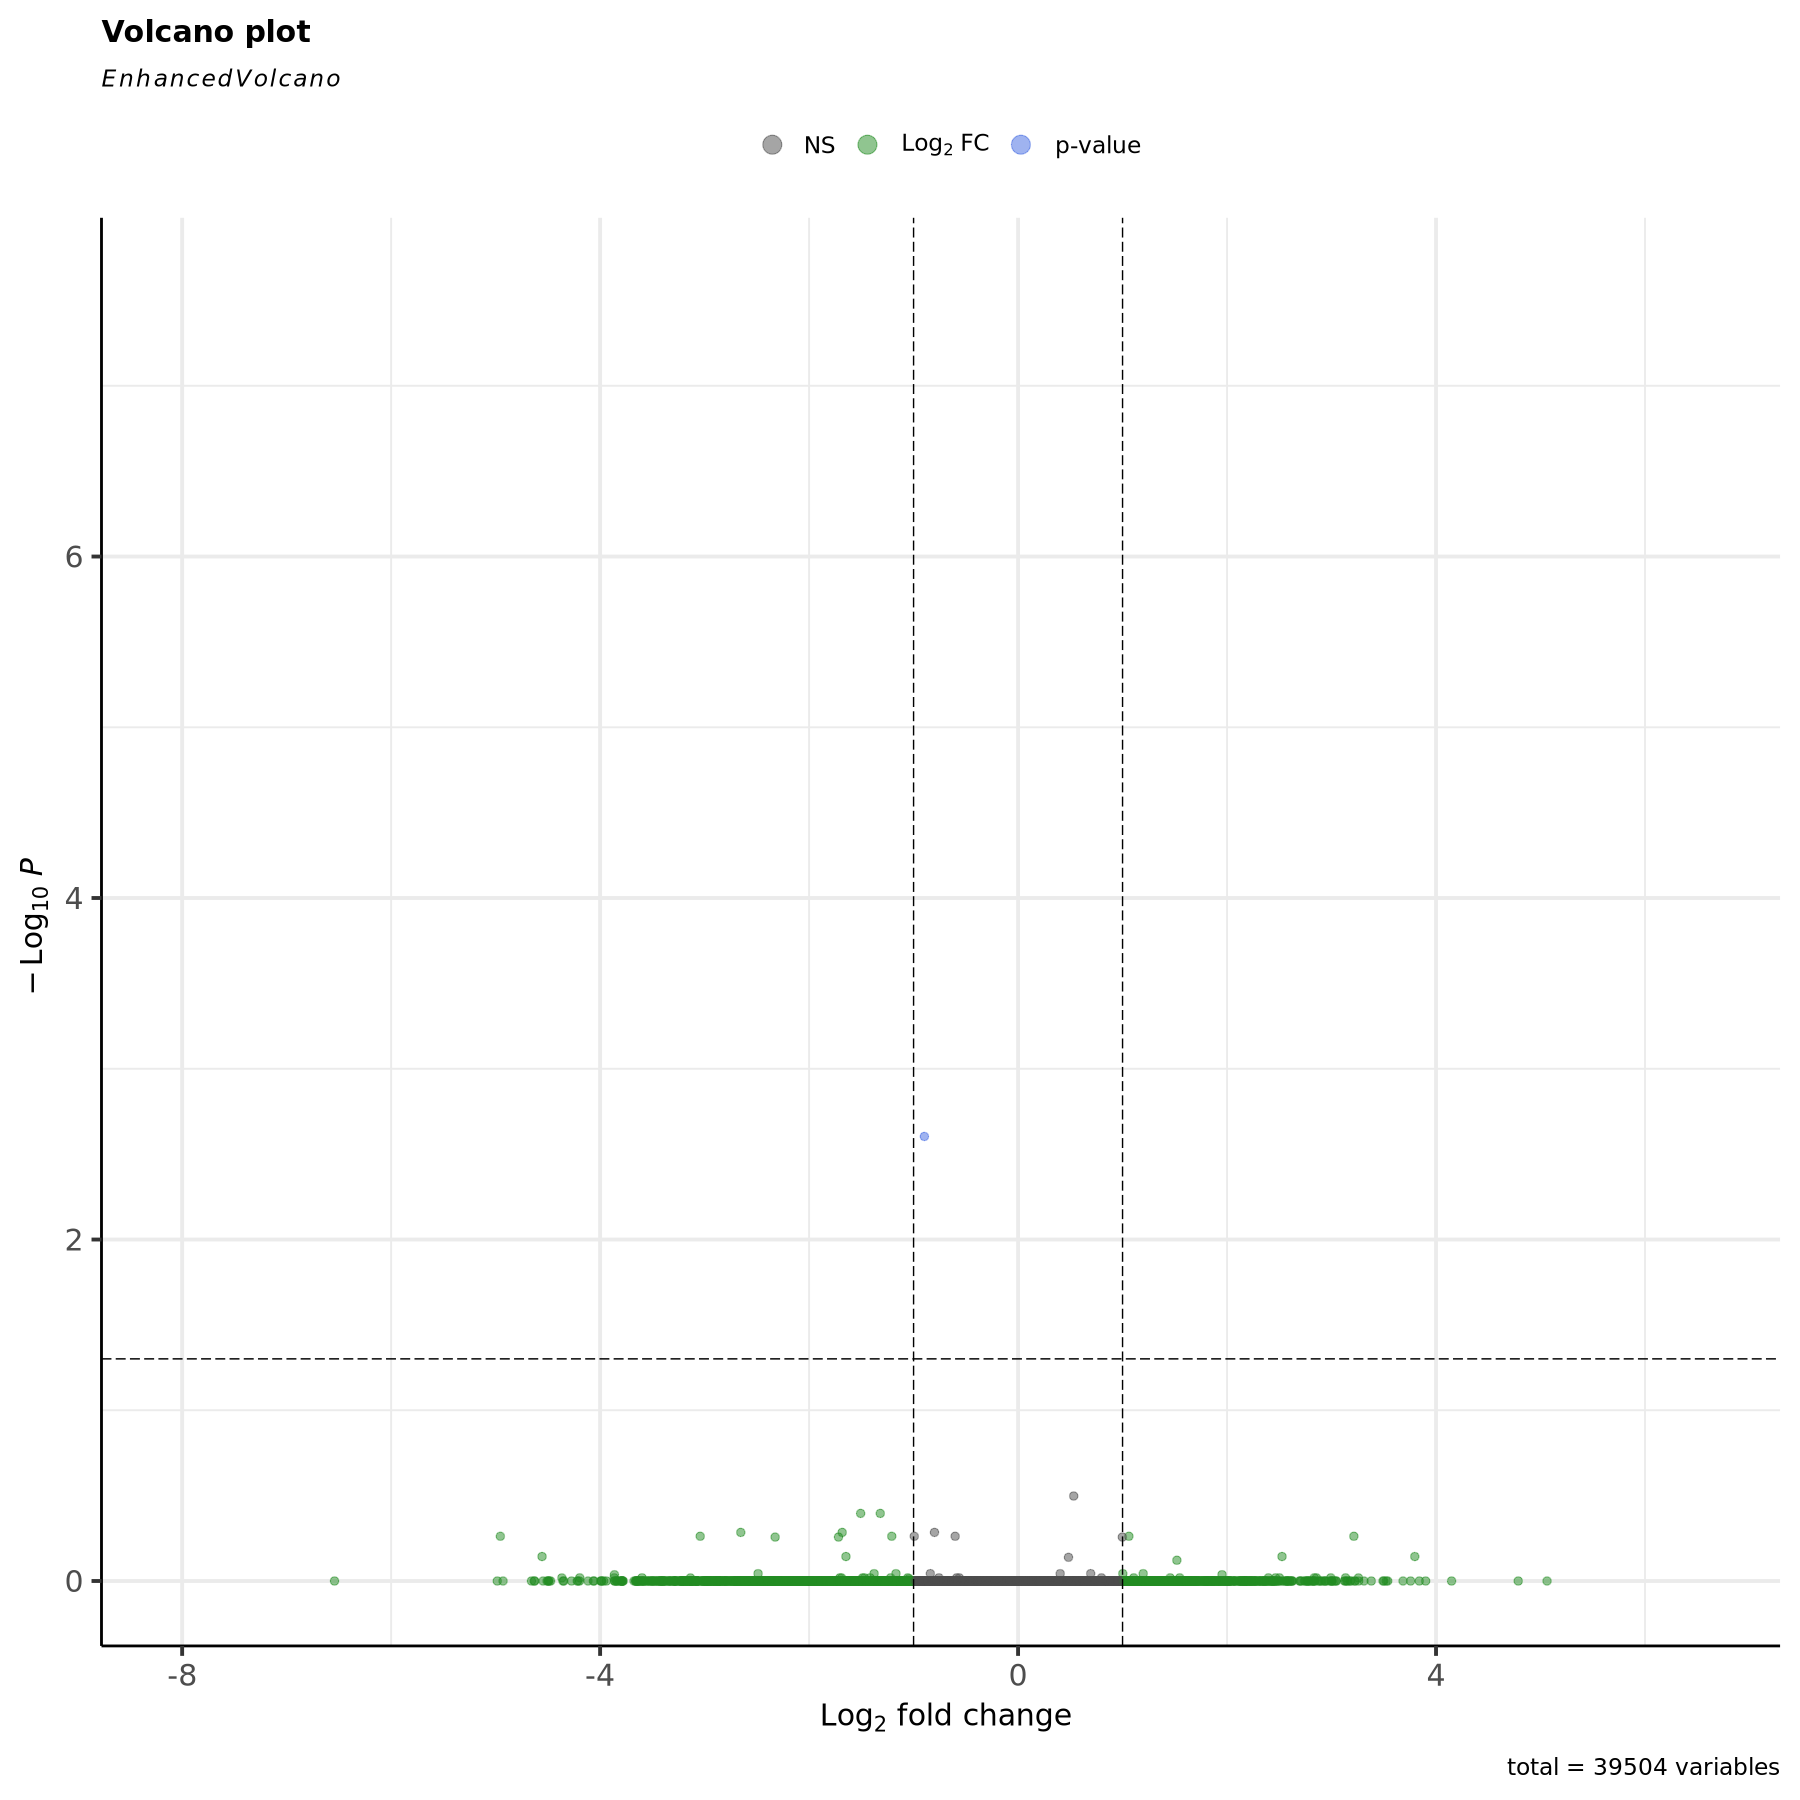

In [28]:
# hypoxic vs control for phase 1
summary(results1)

EnhancedVolcano(results1,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

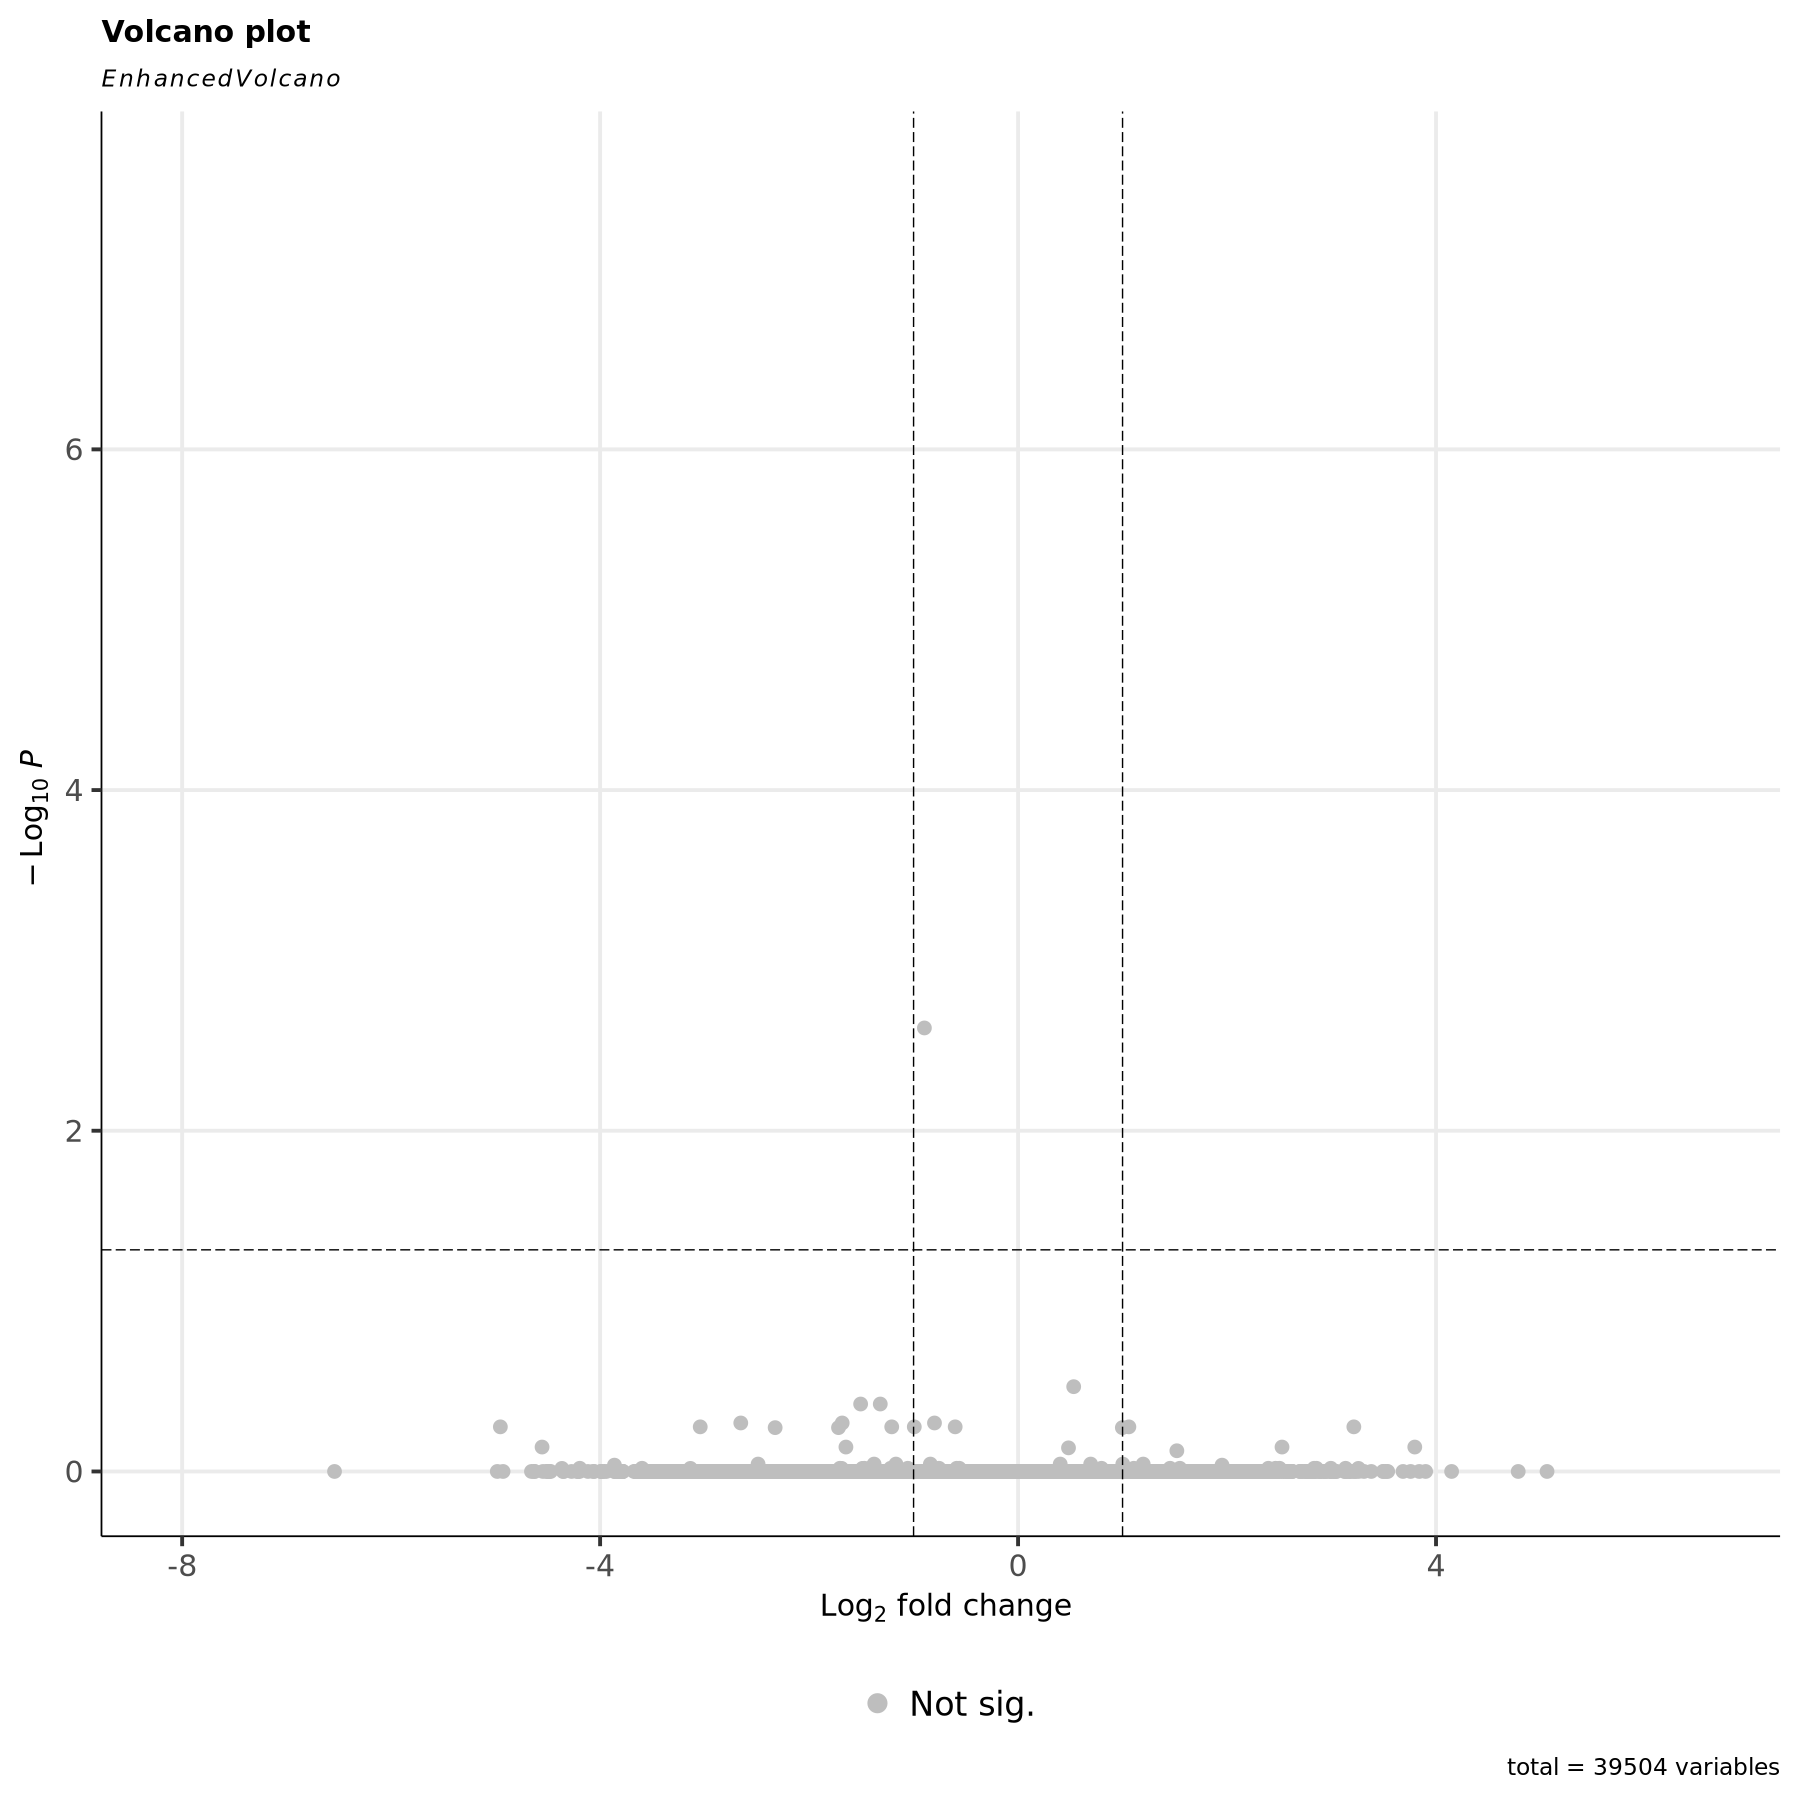

In [29]:
keyvals <- ifelse(
results1$log2FoldChange < -1& results1$padj <0.05, "#000066",
  ifelse(results1$log2FoldChange > 1& results1$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Hypoxic'
names(keyvals)[keyvals == 'grey'] <- 'Not sig.'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Control'

results1_plot <- EnhancedVolcano(results1,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(results1)[which(names(keyvals) %in% c('More methylation in Hypoxic', 'More methylation in Control'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'bottom',
    legendLabSize = 20,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
results1_plot

In [30]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("phase1_hypoxic_control.pdf", width=10, height=10) 
# 2. Create a plot
results1_plot
# Close the pdf filegb
dev.off() 

png 
  2


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 204, 1.1%
low counts [2]     : 6, 0.034%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



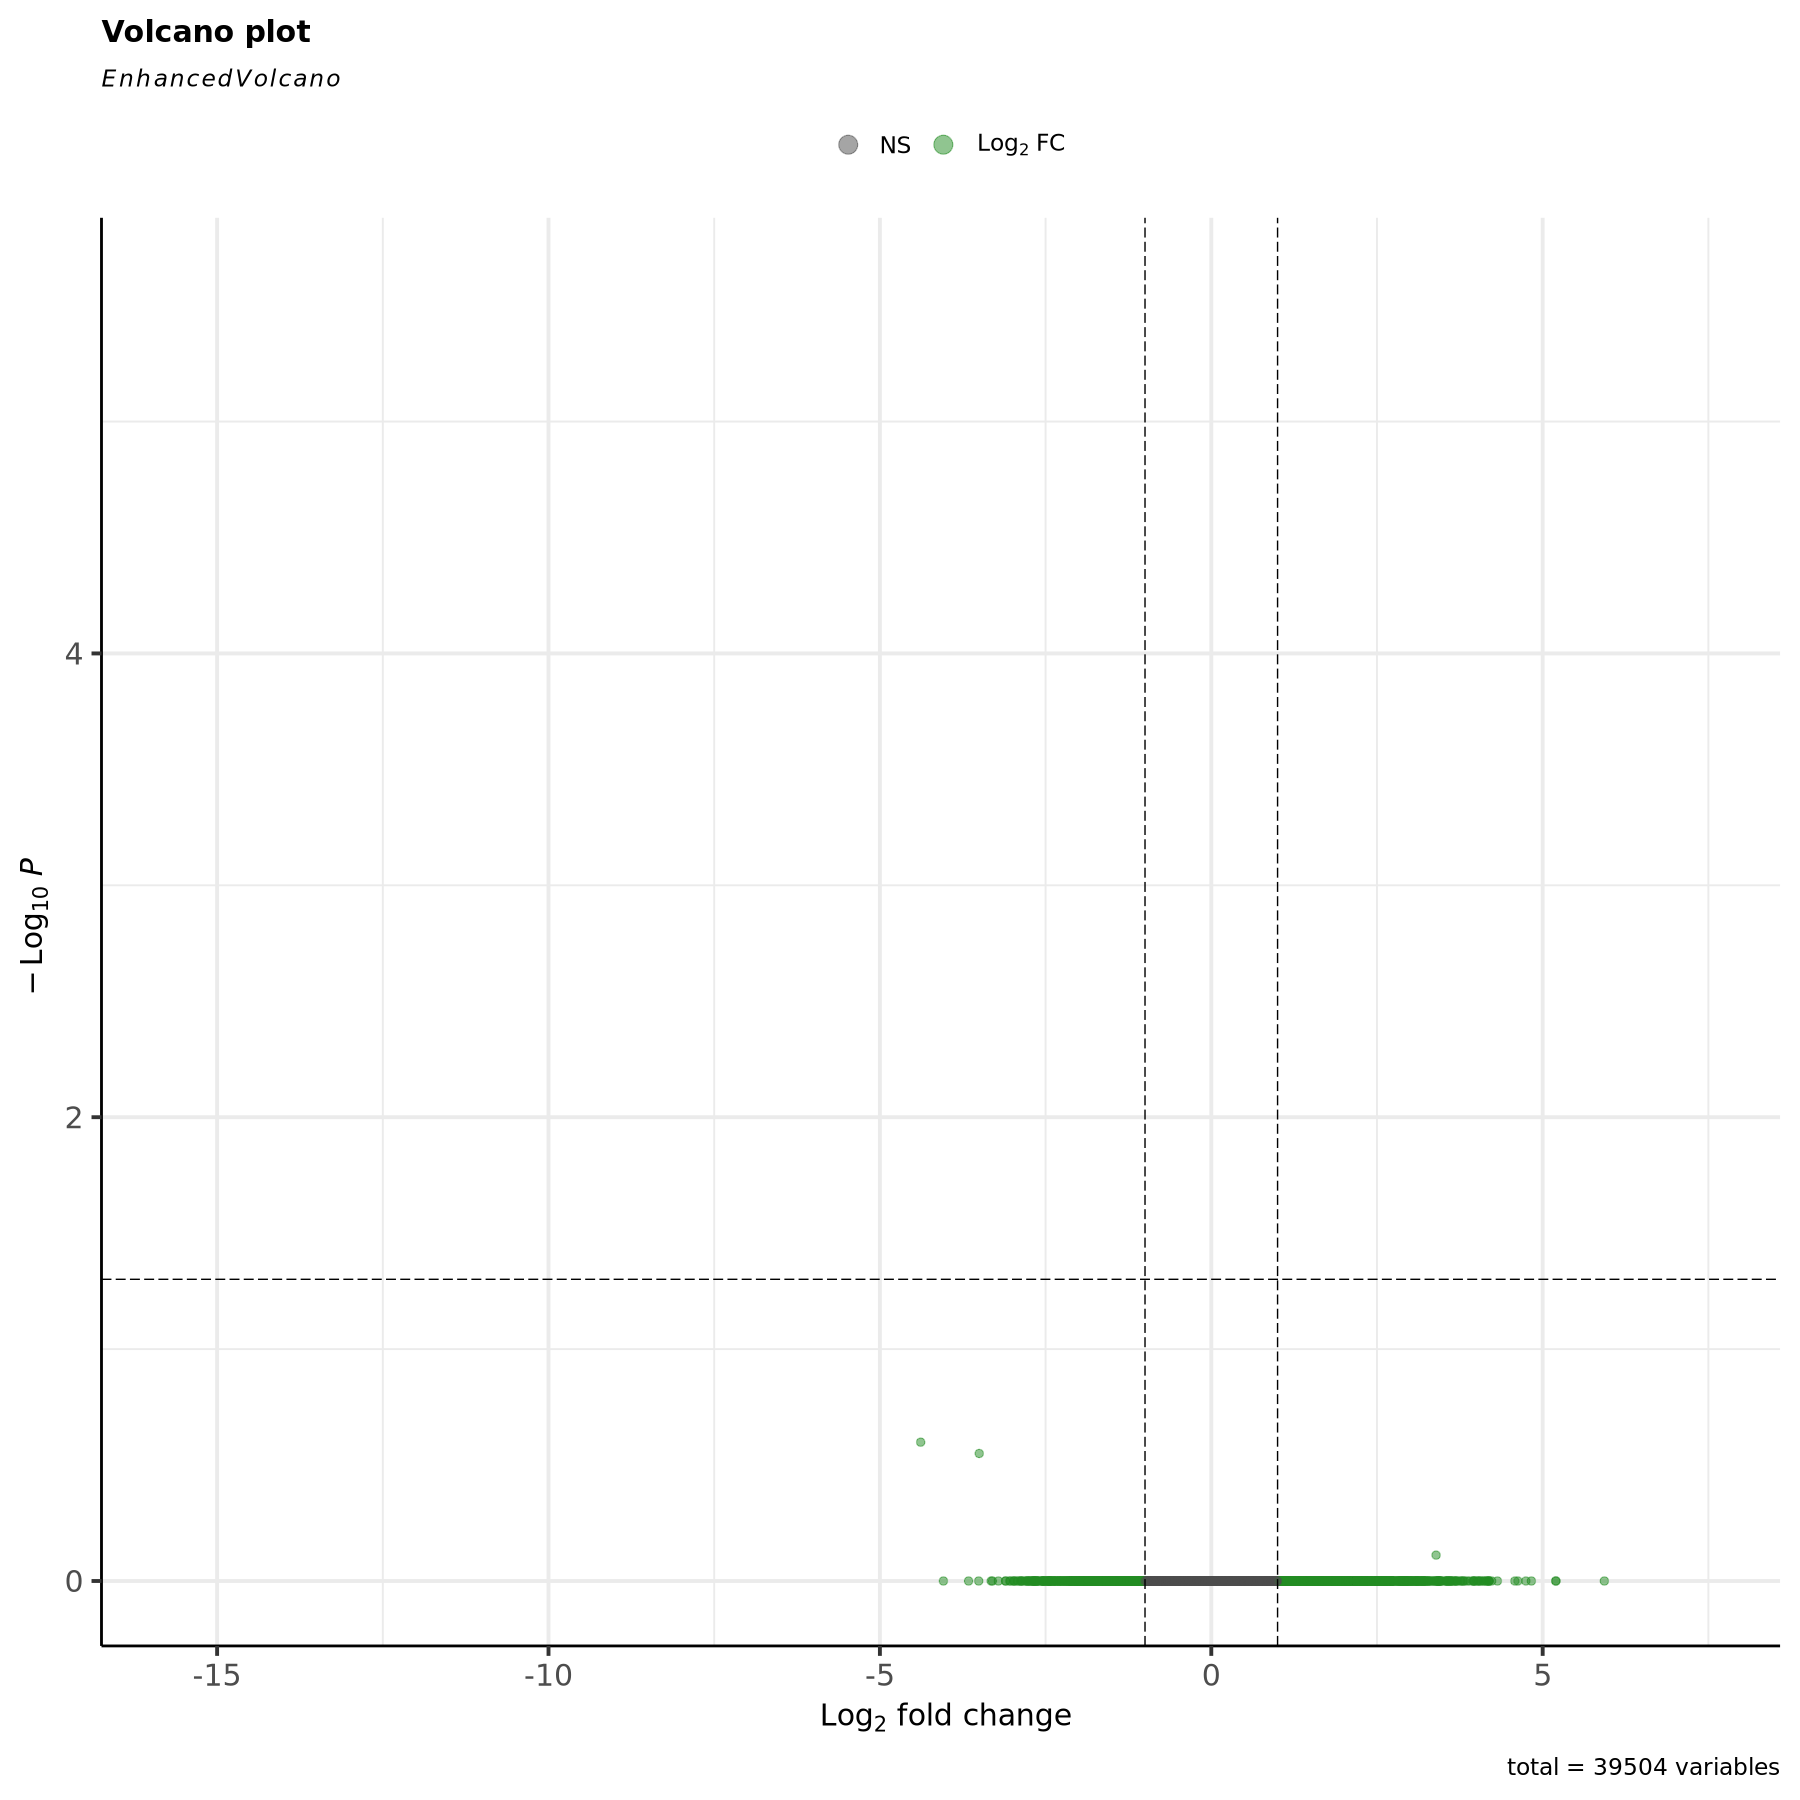

In [31]:
# both vs control for phase 1
summary(results2)

EnhancedVolcano(results2,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 493, 2.8%
LFC < 0 (down)     : 43, 0.24%
outliers [1]       : 204, 1.1%
low counts [2]     : 13274, 74%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



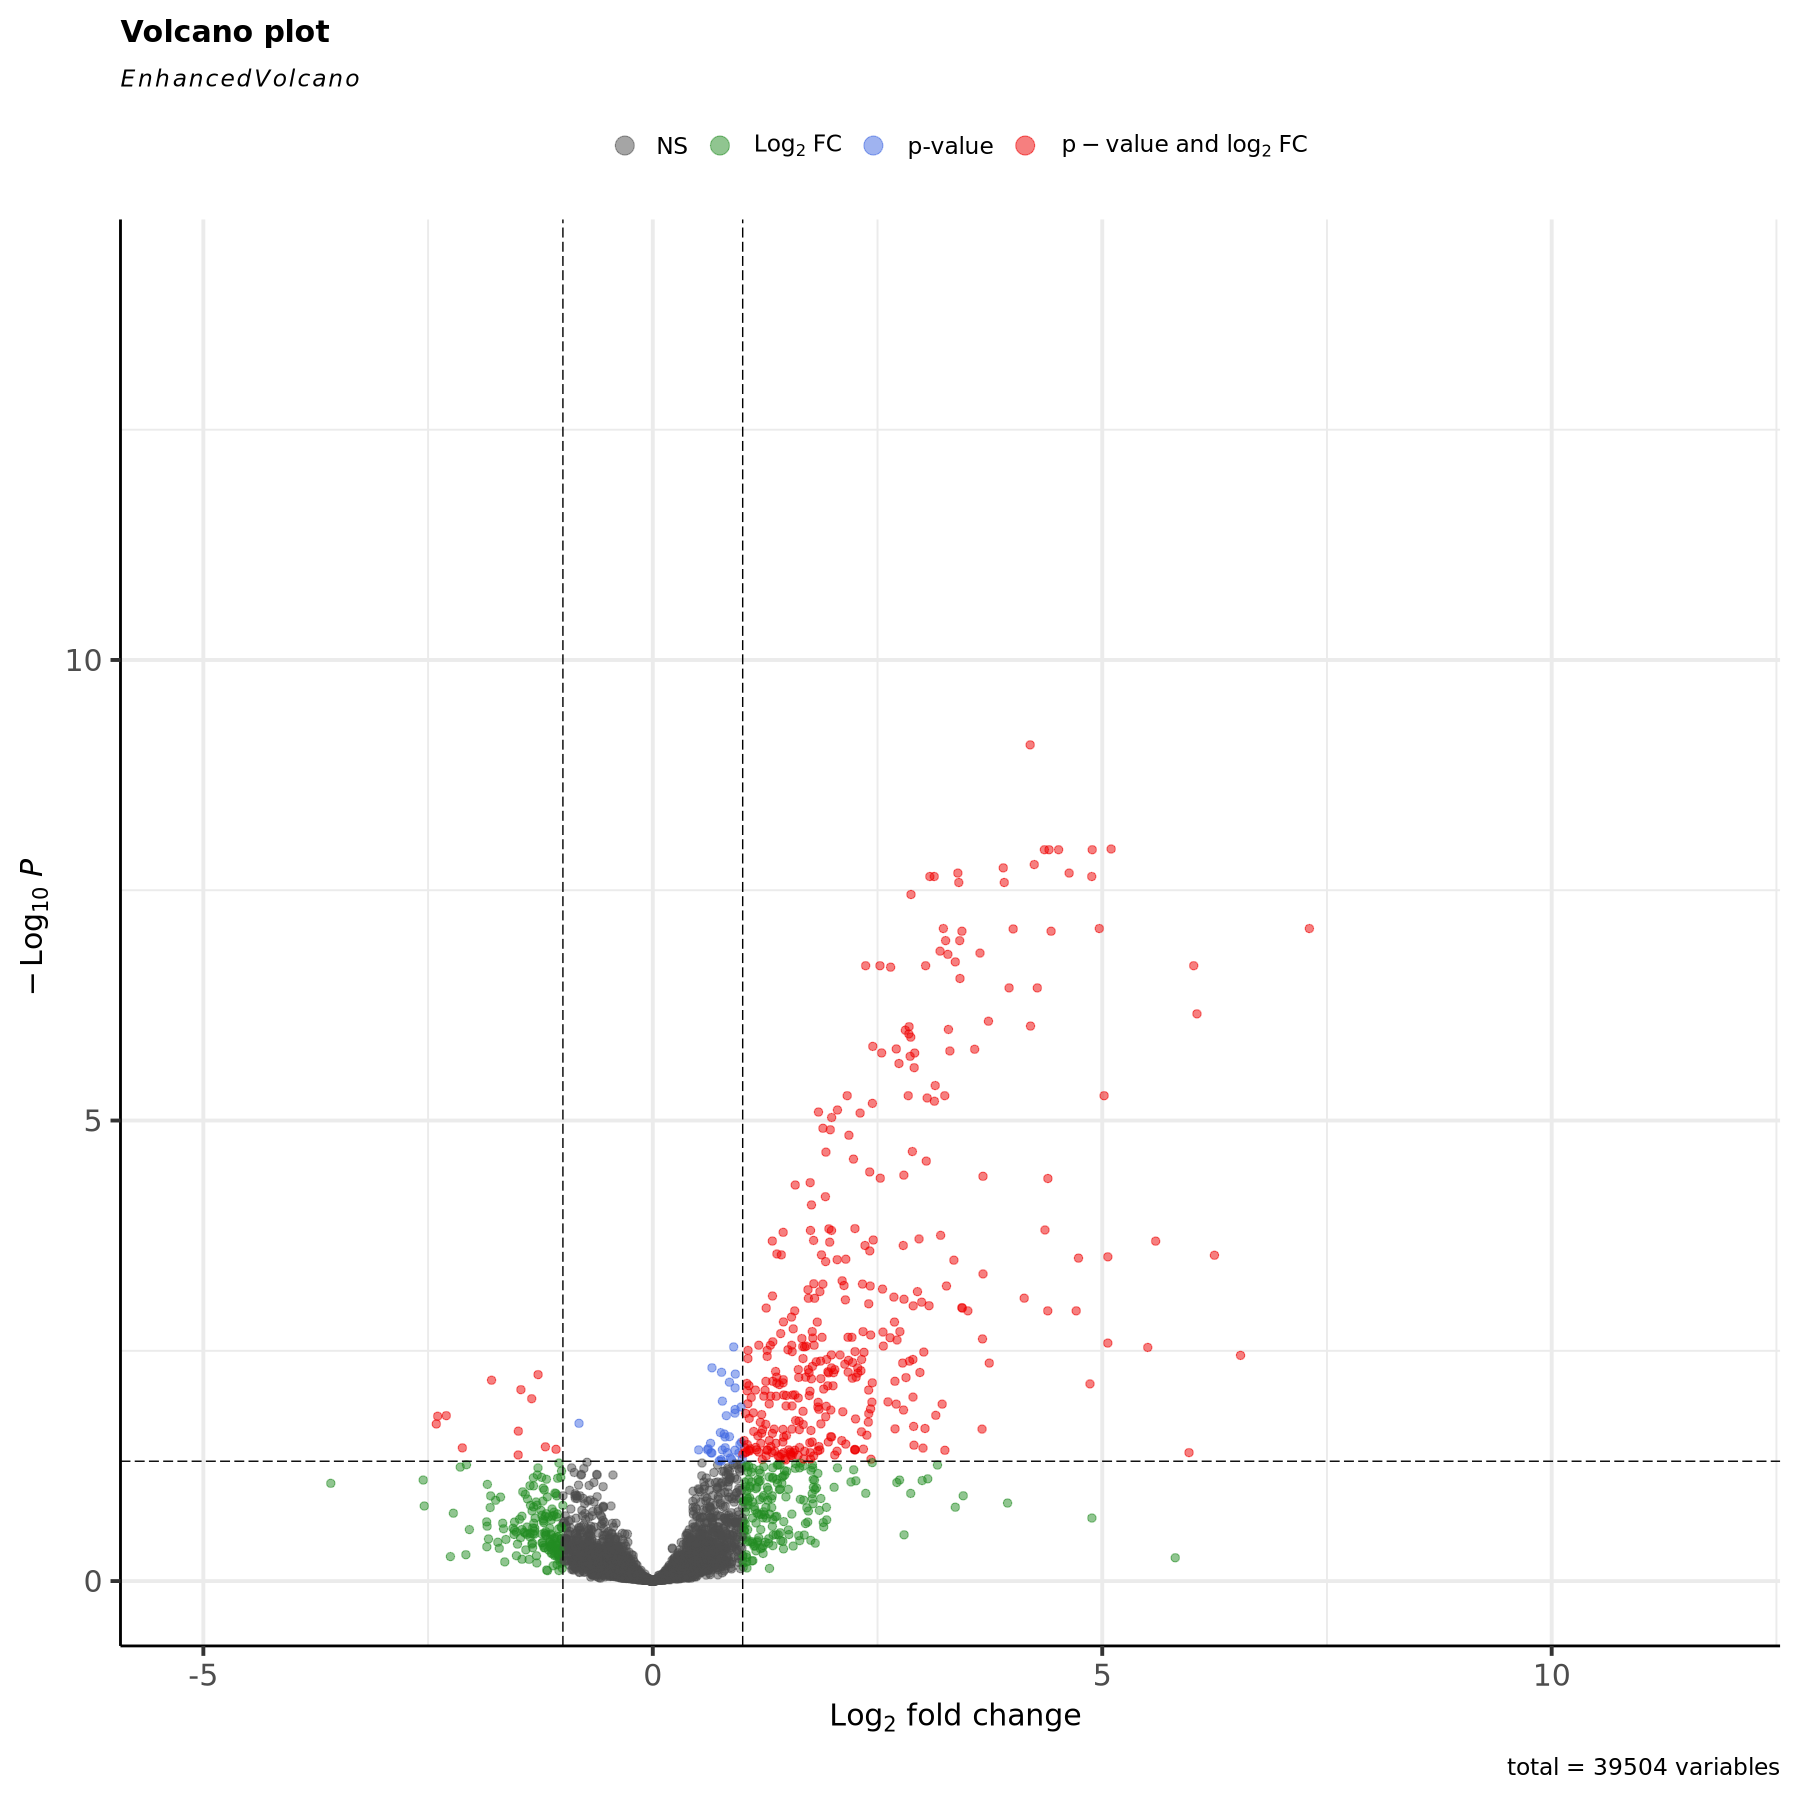

In [32]:
# warm vs control for phase 1
summary(results3)

EnhancedVolcano(results3,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

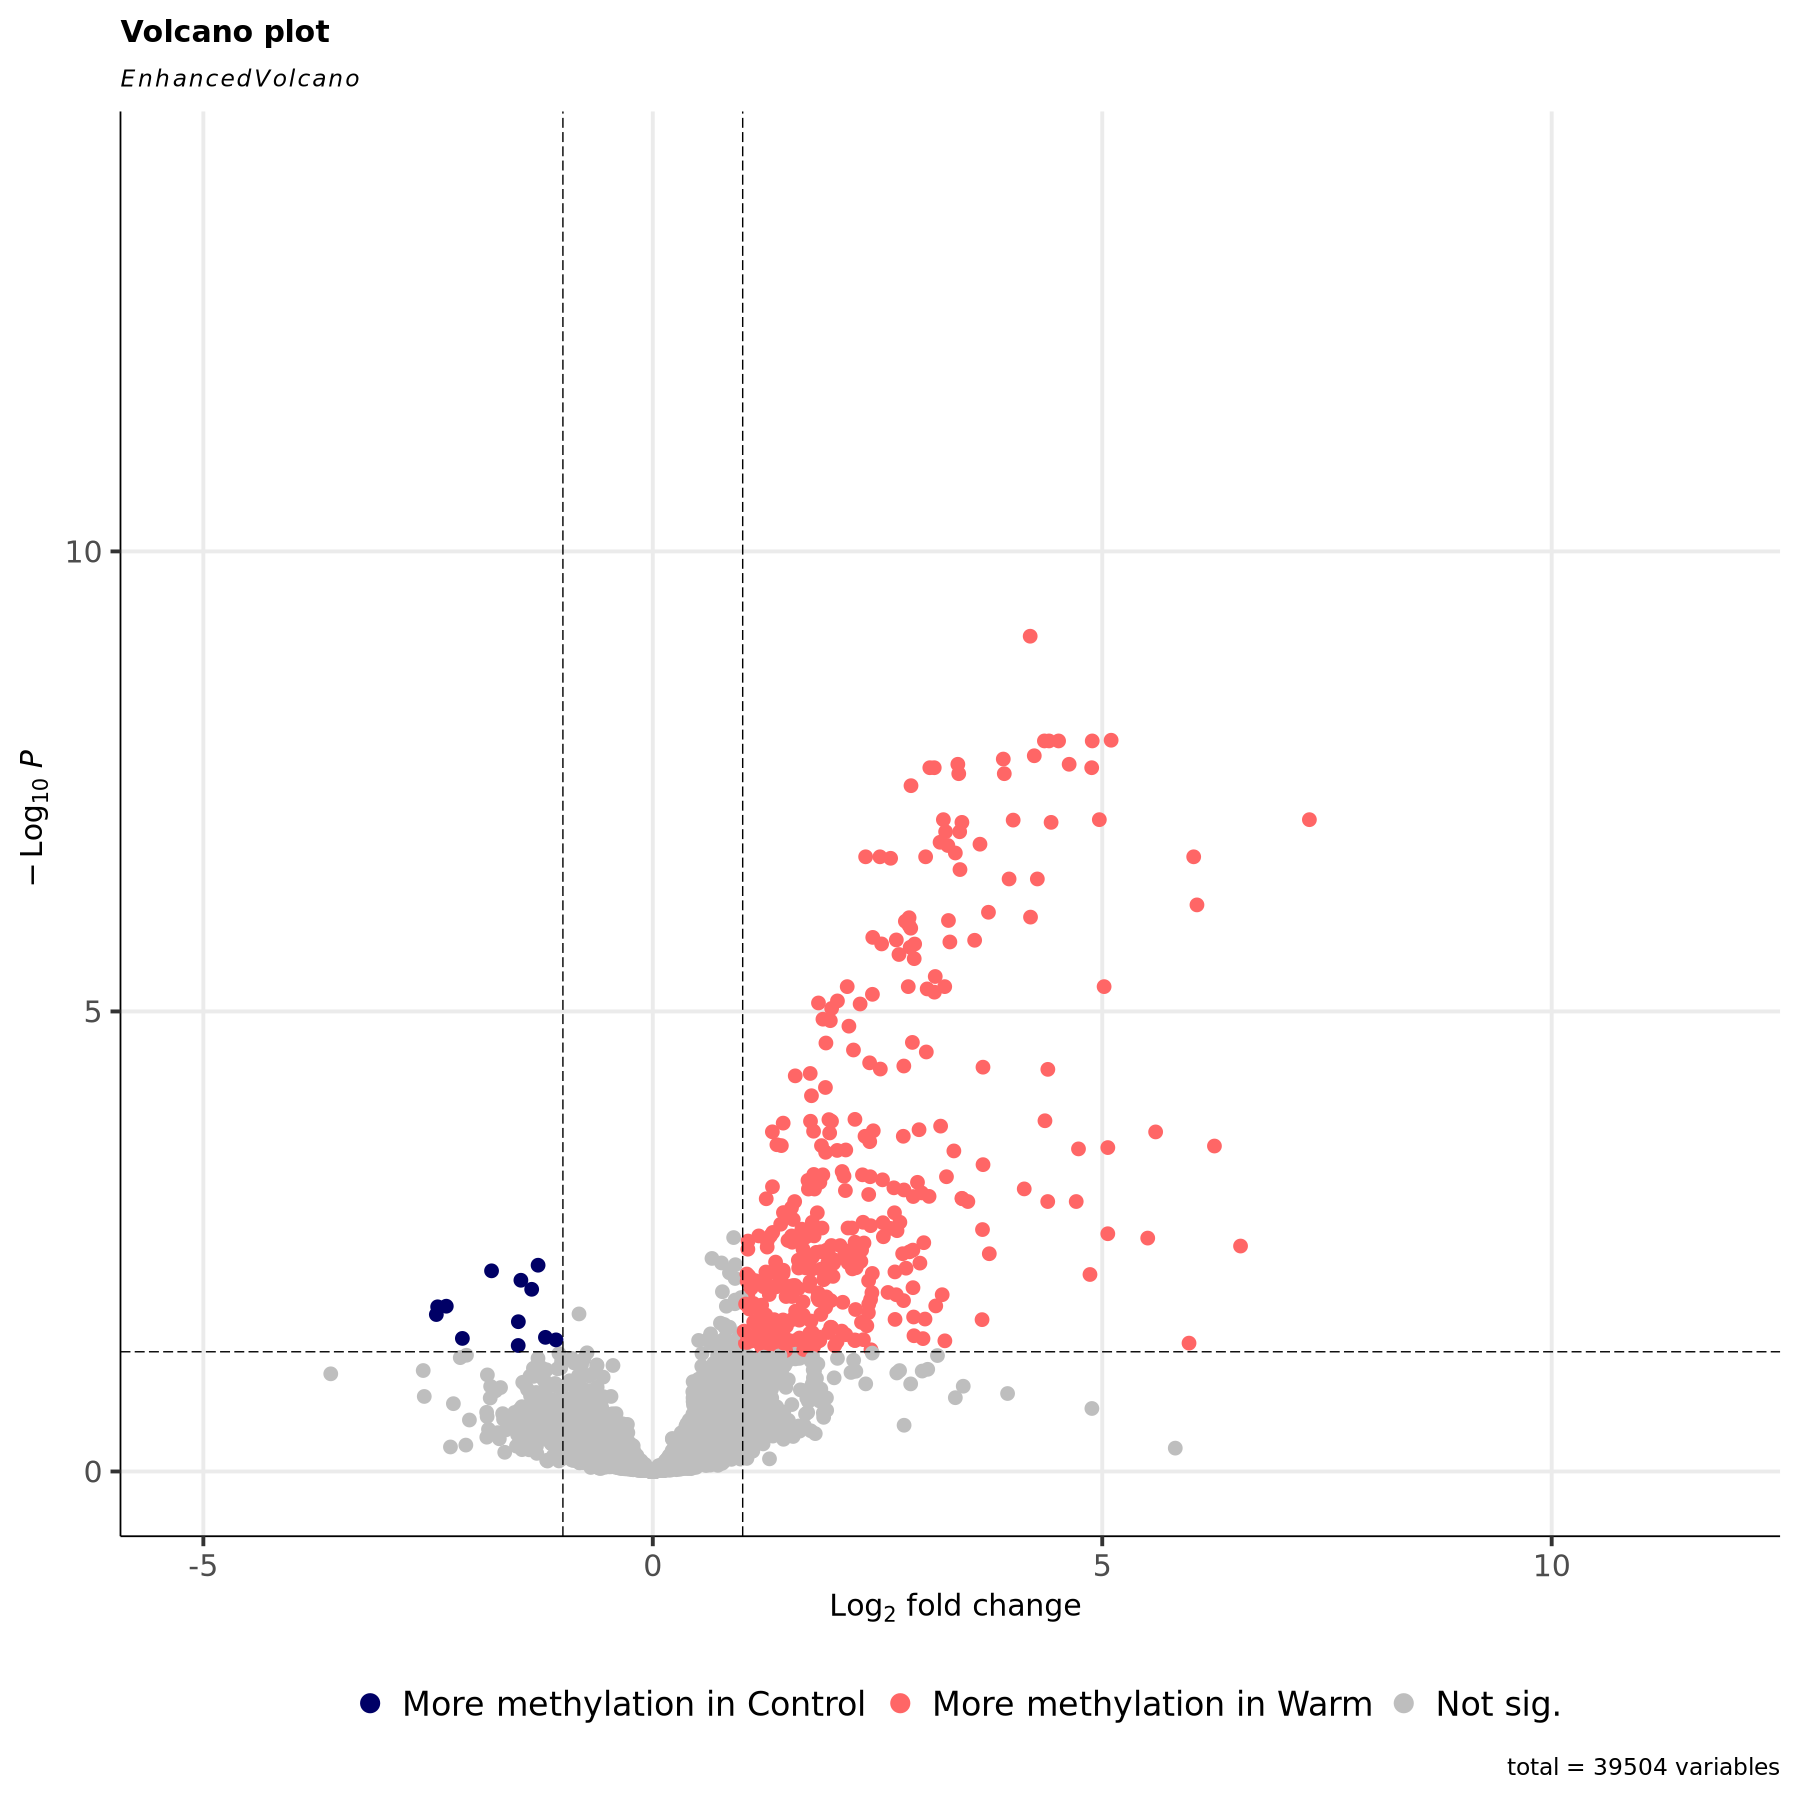

In [33]:
keyvals <- ifelse(
results3$log2FoldChange < -1& results3$padj <0.05, "#000066",
  ifelse(results3$log2FoldChange > 1& results3$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not sig.'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Control'

results3_plot <- EnhancedVolcano(results3,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(results3)[which(names(keyvals) %in% c('More methylation in Warm', 'More methylation in Control'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'bottom',
    legendLabSize = 20,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
results3_plot

In [34]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for warm vs. control for phase 1
warm_v_control.sig_genes = as.data.frame(results3[which(results3$padj < 0.05), ])

# add meta data for those genees
sig_wc_genes = merge(warm_v_control.sig_genes, counts_meta, by="row.names")
head(sig_wc_genes) 

# writing csv file
write.csv(sig_wc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p1_wc_genes.csv")

,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,⋯,WPV-BPR-G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,LOC111099115,46.83069,1.7885864,0.3885554,4.603170,4.161092e-06,0.0002004183,137,141,70,⋯,5,NC_035780.1,Gnomon,gene,1840607,1842557,.,-,.,"gene_id ""LOC111103177""; db_xref ""GeneID:111103177""; gbkey ""Gene""; gene ""LOC111103177""; gene_biotype ""protein_coding"";"
2,LOC111099216,29.51165,1.4828614,0.4401508,3.368985,7.544561e-04,0.0125496496,61,59,55,⋯,1,NC_035780.1,Gnomon,gene,3517611,3518657,.,+,.,"gene_id ""LOC111132154""; db_xref ""GeneID:111132154""; gbkey ""Gene""; gene ""LOC111132154""; gene_biotype ""lncRNA"";"
3,LOC111099417,51.70011,2.7487429,0.6879361,3.995637,6.452048e-05,0.0019567084,101,98,62,⋯,3,NC_035780.1,Gnomon,gene,3920144,3928549,.,+,.,"gene_id ""LOC111112068""; db_xref ""GeneID:111112068""; gbkey ""Gene""; gene ""LOC111112068""; gene_biotype ""protein_coding"";"
4,LOC111099424,16.12747,3.4384445,0.8269653,4.157907,3.211770e-05,0.0010745946,57,50,10,⋯,2,NC_035780.1,Gnomon,gene,4012455,4013027,.,+,.,"gene_id ""LOC111130177""; db_xref ""GeneID:111130177""; gbkey ""Gene""; gene ""LOC111130177""; gene_biotype ""protein_coding"";"
5,LOC111099722,593.62230,0.8993515,0.2324598,3.868847,1.093514e-04,0.0028699825,1591,1713,1323,⋯,153,NC_035780.1,Gnomon,gene,8951007,8951628,.,-,.,"gene_id ""LOC111114945""; db_xref ""GeneID:111114945""; gbkey ""Gene""; gene ""LOC111114945""; gene_biotype ""lncRNA"";"
6,LOC111099918,87.23670,0.6567512,0.2251842,2.916507,3.539745e-03,0.0407210025,328,280,280,⋯,6,NC_035780.1,Gnomon,gene,11951821,11976757,.,+,.,"gene_id ""LOC111112589""; db_xref ""GeneID:111112589""; gbkey ""Gene""; gene ""LOC111112589""; gene_biotype ""protein_coding"";"


In [35]:
tail(results3)
write.csv(results3, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/GO_enrichment_analysis/sig_p1_wc_genes_ALL.csv')

log2 fold change (MLE): Phase1 warm vs control 
Wald test p-value: Phase1 warm vs control 
DataFrame with 6 rows and 6 columns
             baseMean log2FoldChange     lfcSE      stat    pvalue      padj
            <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
Trnay-gua_4         0             NA        NA        NA        NA        NA
Trnay-gua_5         0             NA        NA        NA        NA        NA
Trnay-gua_6         0             NA        NA        NA        NA        NA
Trnay-gua_7         0             NA        NA        NA        NA        NA
Trnay-gua_8         0             NA        NA        NA        NA        NA
Trnay-gua_9         0             NA        NA        NA        NA        NA

In [36]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("phase1_warm_control.pdf", width=10, height=10) 
# 2. Create a plot
results3_plot
# Close the pdf filegb
dev.off() 

png 
  2

In [76]:
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2,phase1,phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control,1,2
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control,1,2
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic,1,2
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic,1,2
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control,1,2
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control,1,2


#### looking at effects of phase 2, ignoring phase 1

In [77]:
p2_dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta, 
                              design = ~ Phase2)
p2_dds=DESeq(p2_dds)
resultsNames(p2_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 641 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"              "Phase2_control_vs_both" "Phase2_hypoxic_vs_both"

In [45]:
colData(p2_dds)$Phase2 <- factor(colData(p2_dds)$Phase2, levels = c("control", "hypoxic", "warm", "both"))
head(colData(p2_dds))

DataFrame with 6 rows and 15 columns
                       sample_ID   unique_ID     T1_code     T2_code
                     <character> <character> <character> <character>
BBB-WBO-B21 2018--BBB-WBO-B21-CV BBB-WBO-B21         BBB         WBO
BBB-WBV-B70 2018--BBB-WBV-B70-CV BBB-WBV-B70         BBB         WBV
BBO-BBO-B16 2018--BBO-BBO-B16-CV BBO-BBO-B16         BBO         BBO
BBO-BBY-B27 2018--BBO-BBY-B27-CV BBO-BBY-B27         BBO         BBY
BBO-WBO-B16 2018--BBO-WBO-B16-CV BBO-WBO-B16         BBO         WBO
BBO-WBV-B64 2018--BBO-WBV-B64-CV BBO-WBV-B64         BBO         WBV
                ID_code   T1_oxygen     T1_temp       Tank1   T2_oxygen
            <character> <character> <character> <character> <character>
BBB-WBO-B21         B21     hypoxic     ambient           B    normoxic
BBB-WBV-B70         B70     hypoxic     ambient           B    normoxic
BBO-BBO-B16         B16     hypoxic     ambient           O     hypoxic
BBO-BBY-B27         B27     hypoxic     ambient    

In [78]:
# need to first specify contrasts
contrast4 <- c("Phase2", "hypoxic", "both")
contrast5 <- c("Phase2", "both", "control")
#contrast6 <- c("Phase2", "warm", "control") don't actually have these samples

In [79]:
results4 <- results(p2_dds, contrast = contrast4)
results5 <- results(p2_dds, contrast = contrast5)
#results6 <- results(p2_dds, contrast = contrast6) don't have these samples


out of 17852 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 9, 0.05%
LFC < 0 (down)     : 115, 0.64%
outliers [1]       : 0, 0%
low counts [2]     : 14913, 84%
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



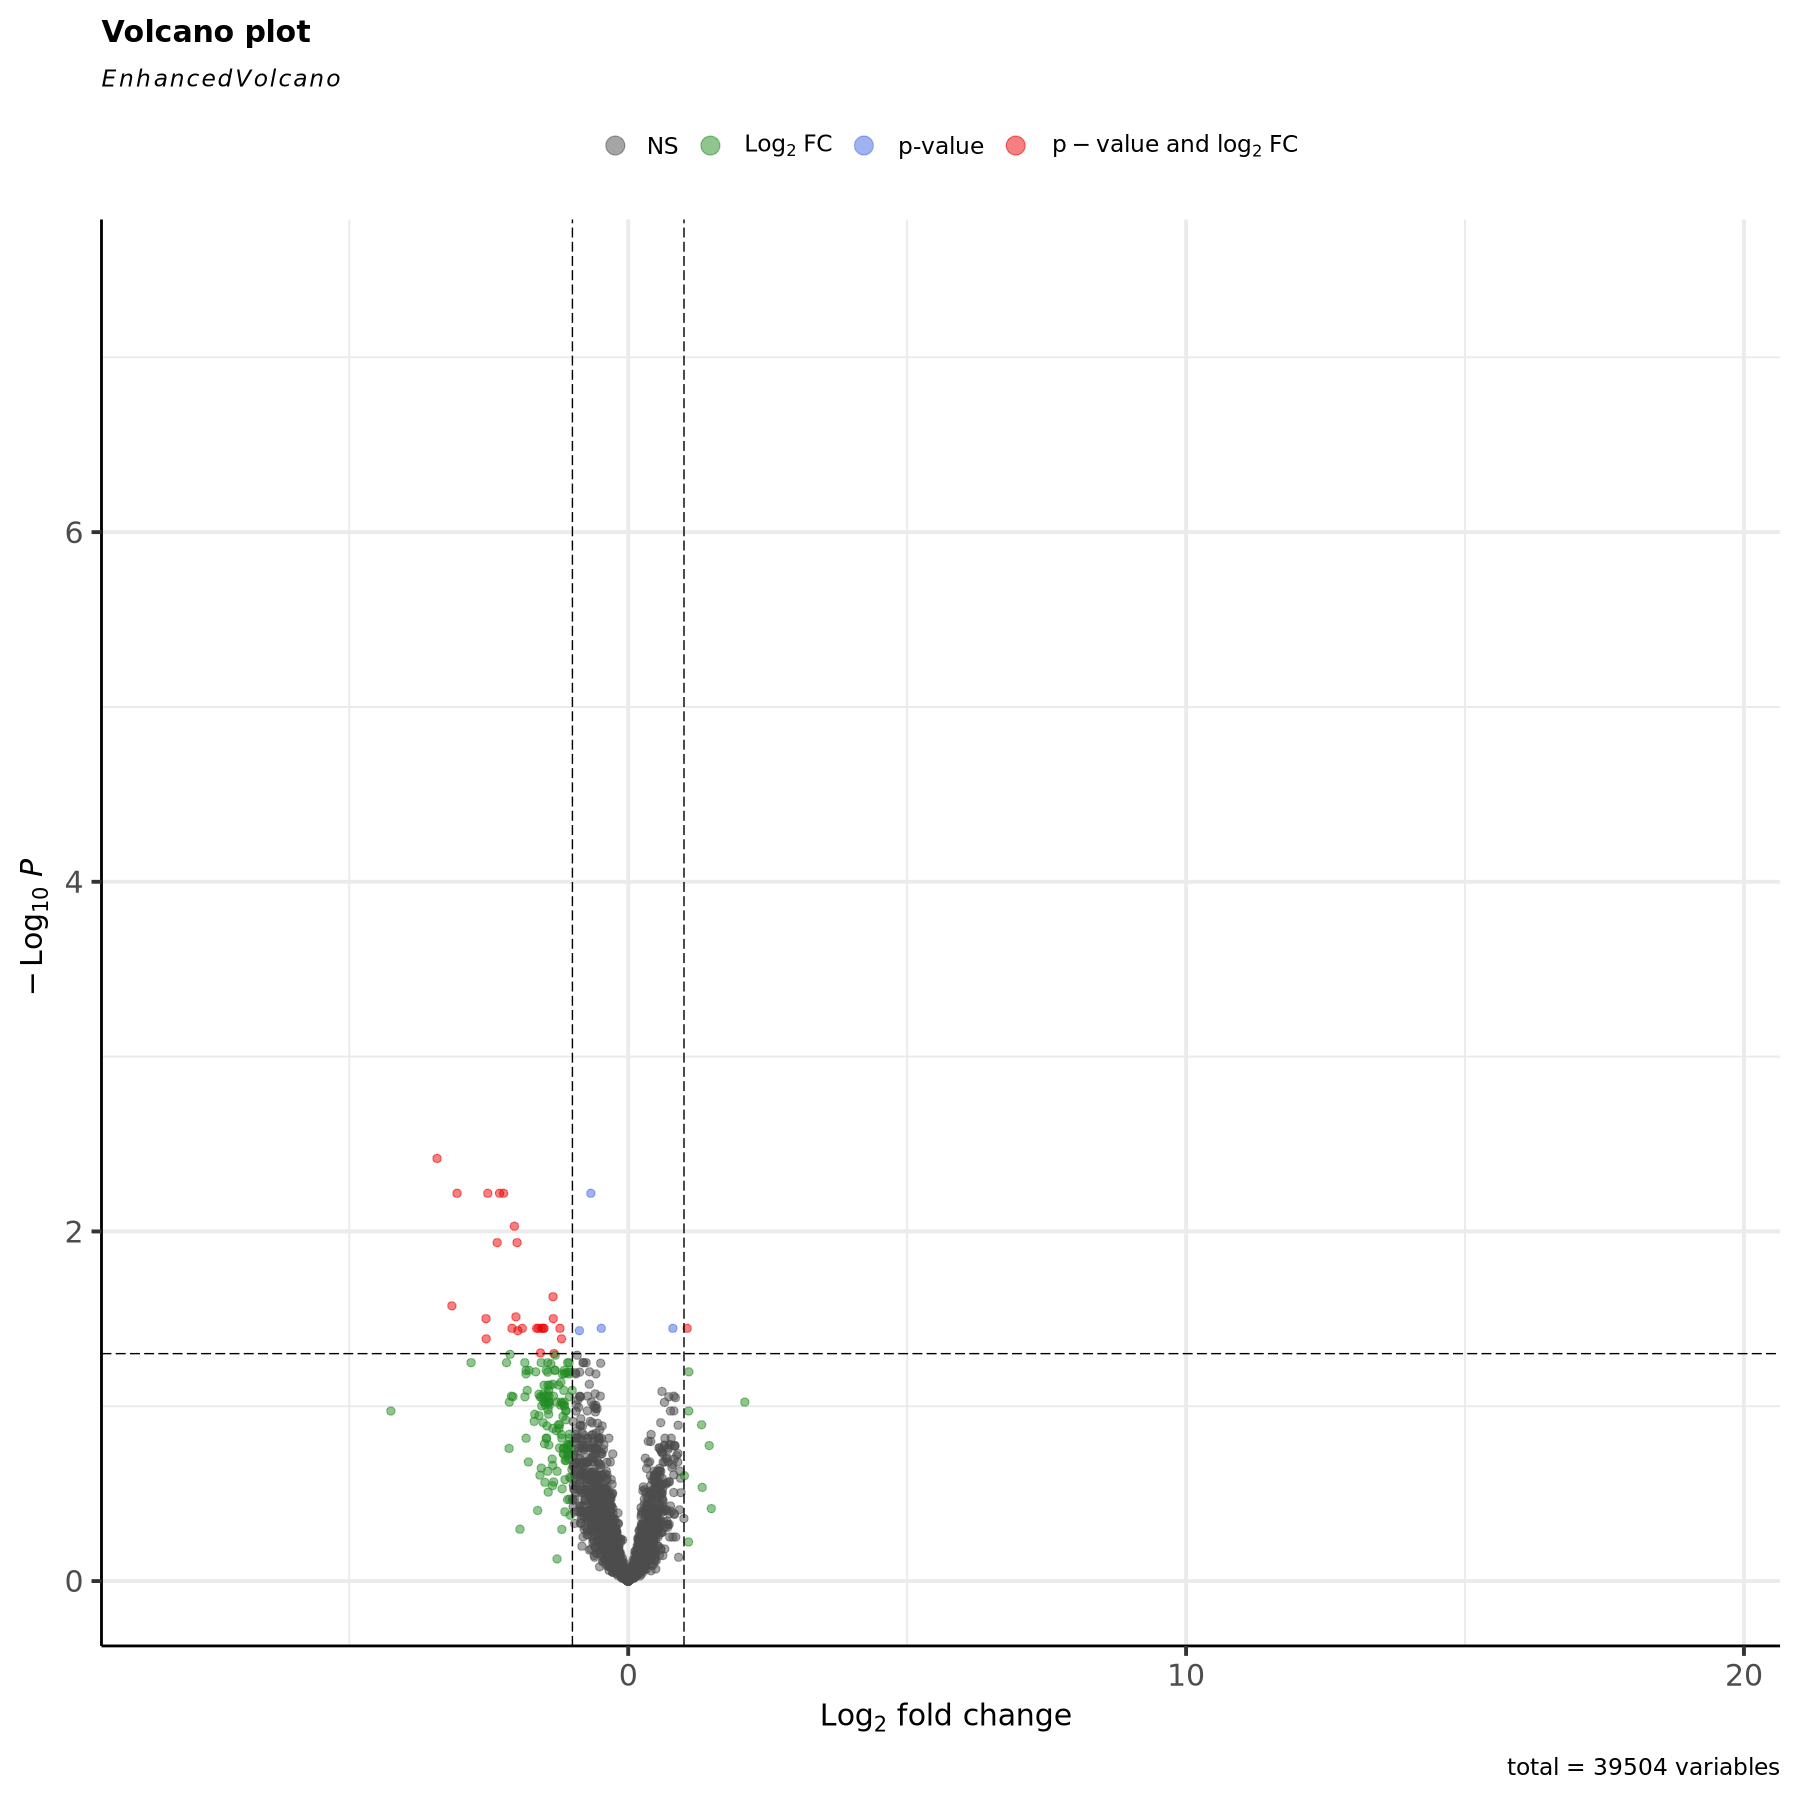

In [82]:
# phase 2 hypoxic vs both
summary(results4)
   
EnhancedVolcano(results4,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [83]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for hypoxic vs. control for phase 2
hypoxic_v_control.sig_genes = as.data.frame(results4[which(results4$padj < 0.05), ])

# add meta data for those genes
sig_hc_genes = merge(hypoxic_v_control.sig_genes, counts_meta, by="row.names")
head(sig_hc_genes)

# writing csv file
write.csv(sig_hc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2_hc_genes.csv")

,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,⋯,WPV-BPR-G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,LOC111100406,17.62959,-1.9786229,0.5520622,-3.584058,3.382968e-04,0.036937003,54,22,26,⋯,0,NC_035780.1,Gnomon,gene,19969471,19973171,.,-,.,"gene_id ""LOC111106253""; db_xref ""GeneID:111106253""; gbkey ""Gene""; gene ""LOC111106253""; gene_biotype ""pseudogene""; pseudo ""true"";"
2,LOC111101237,27.58609,-2.0831676,0.5718641,-3.642767,2.697234e-04,0.035842664,27,8,48,⋯,1,NC_035780.1,Gnomon,gene,33450544,33452011,.,-,.,"gene_id ""LOC111125998""; db_xref ""GeneID:111125998""; gbkey ""Gene""; gene ""LOC111125998""; gene_biotype ""lncRNA"";"
3,LOC111104284,176.64789,-0.4820848,0.1334711,-3.611904,3.039575e-04,0.035842664,557,471,428,⋯,14,NC_035781.1,Gnomon,gene,15873119,15877086,.,+,.,"gene_id ""LOC111118545""; db_xref ""GeneID:111118545""; gbkey ""Gene""; gene ""LOC111118545""; gene_biotype ""protein_coding"";"
4,LOC111105299,32.23413,-2.5172192,0.5757785,-4.371854,1.231961e-05,0.006053034,24,20,39,⋯,29,NC_035781.1,Gnomon,gene,32304396,32351726,.,+,.,"gene_id ""LOC111118328""; db_xref ""GeneID:111118328""; gbkey ""Gene""; gene ""LOC111118328""; gene_biotype ""protein_coding"";"
5,LOC111105528,20.08092,-3.1608623,0.8121594,-3.891924,9.945249e-05,0.026653268,43,37,30,⋯,88,NC_035781.1,Gnomon,gene,35832098,35847015,.,-,.,"gene_id ""LOC111119616""; db_xref ""GeneID:111119616""; gbkey ""Gene""; gene ""LOC111119616""; gene_biotype ""protein_coding"";"
6,LOC111106800,62.57724,-2.3481348,0.5672694,-4.139365,3.482692e-05,0.011586848,43,65,48,⋯,56,NC_035781.1,Gnomon,gene,53754293,53755514,.,-,.,"gene_id ""LOC111122005""; db_xref ""GeneID:111122005""; gbkey ""Gene""; gene ""LOC111122005""; gene_biotype ""lncRNA"";"



out of 17852 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 245, 1.4%
LFC < 0 (down)     : 45, 0.25%
outliers [1]       : 0, 0%
low counts [2]     : 10701, 60%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



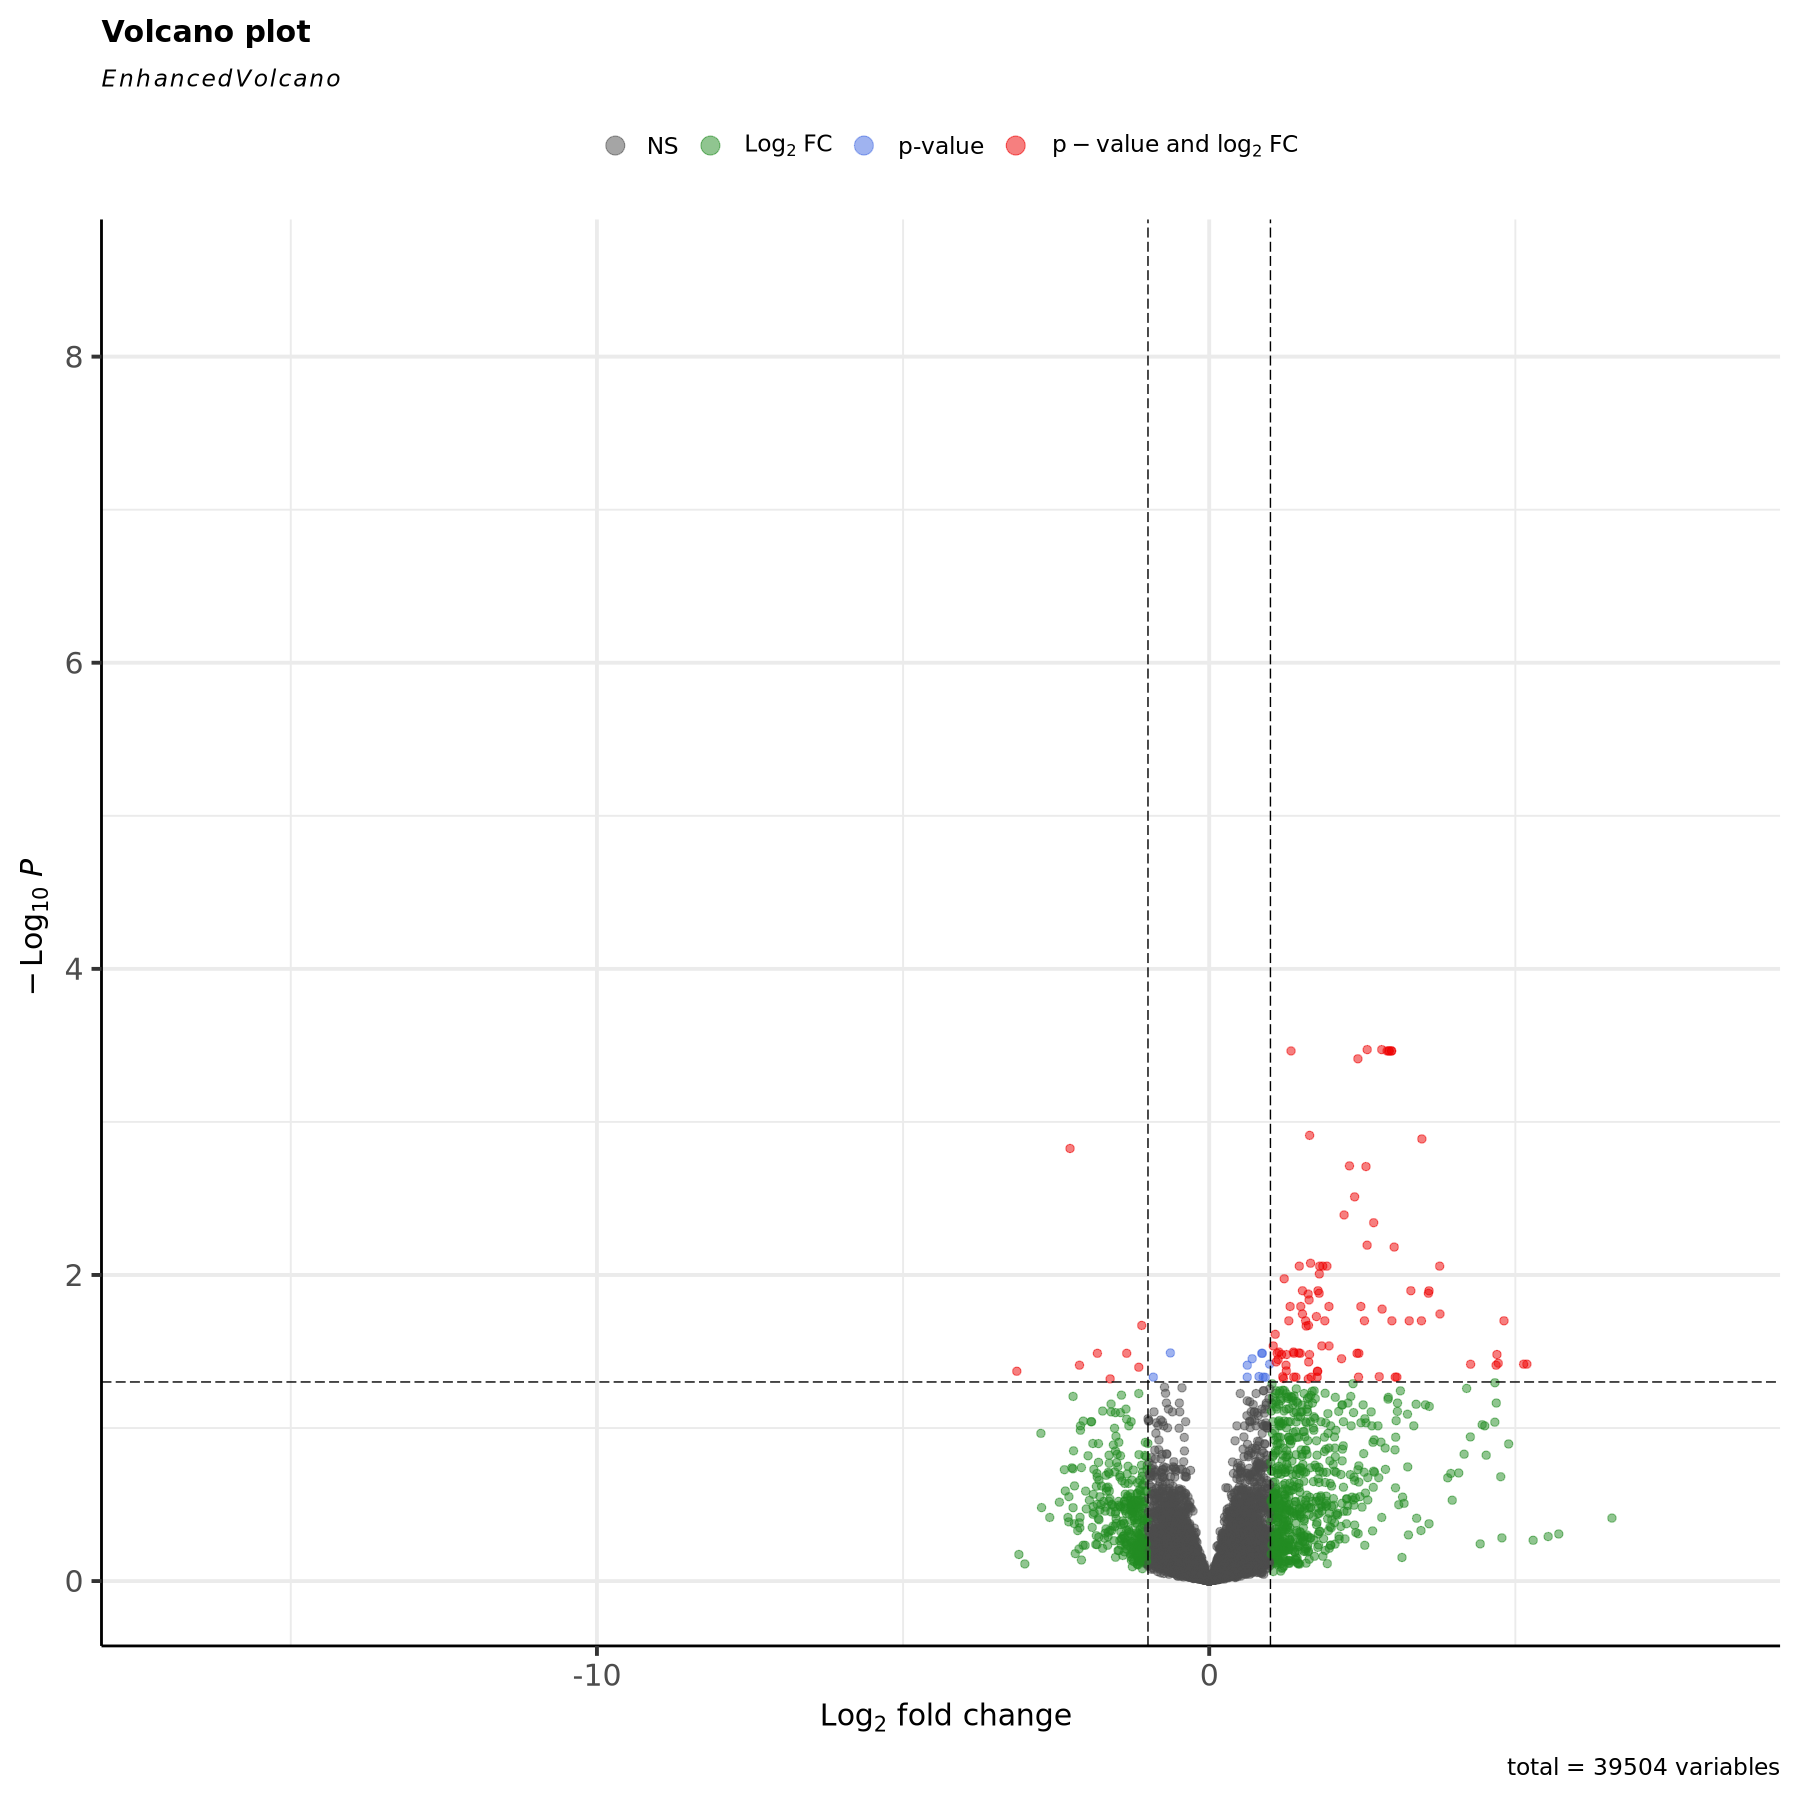

In [84]:
# phase 2 both vs control
summary(results5)
   
EnhancedVolcano(results5,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

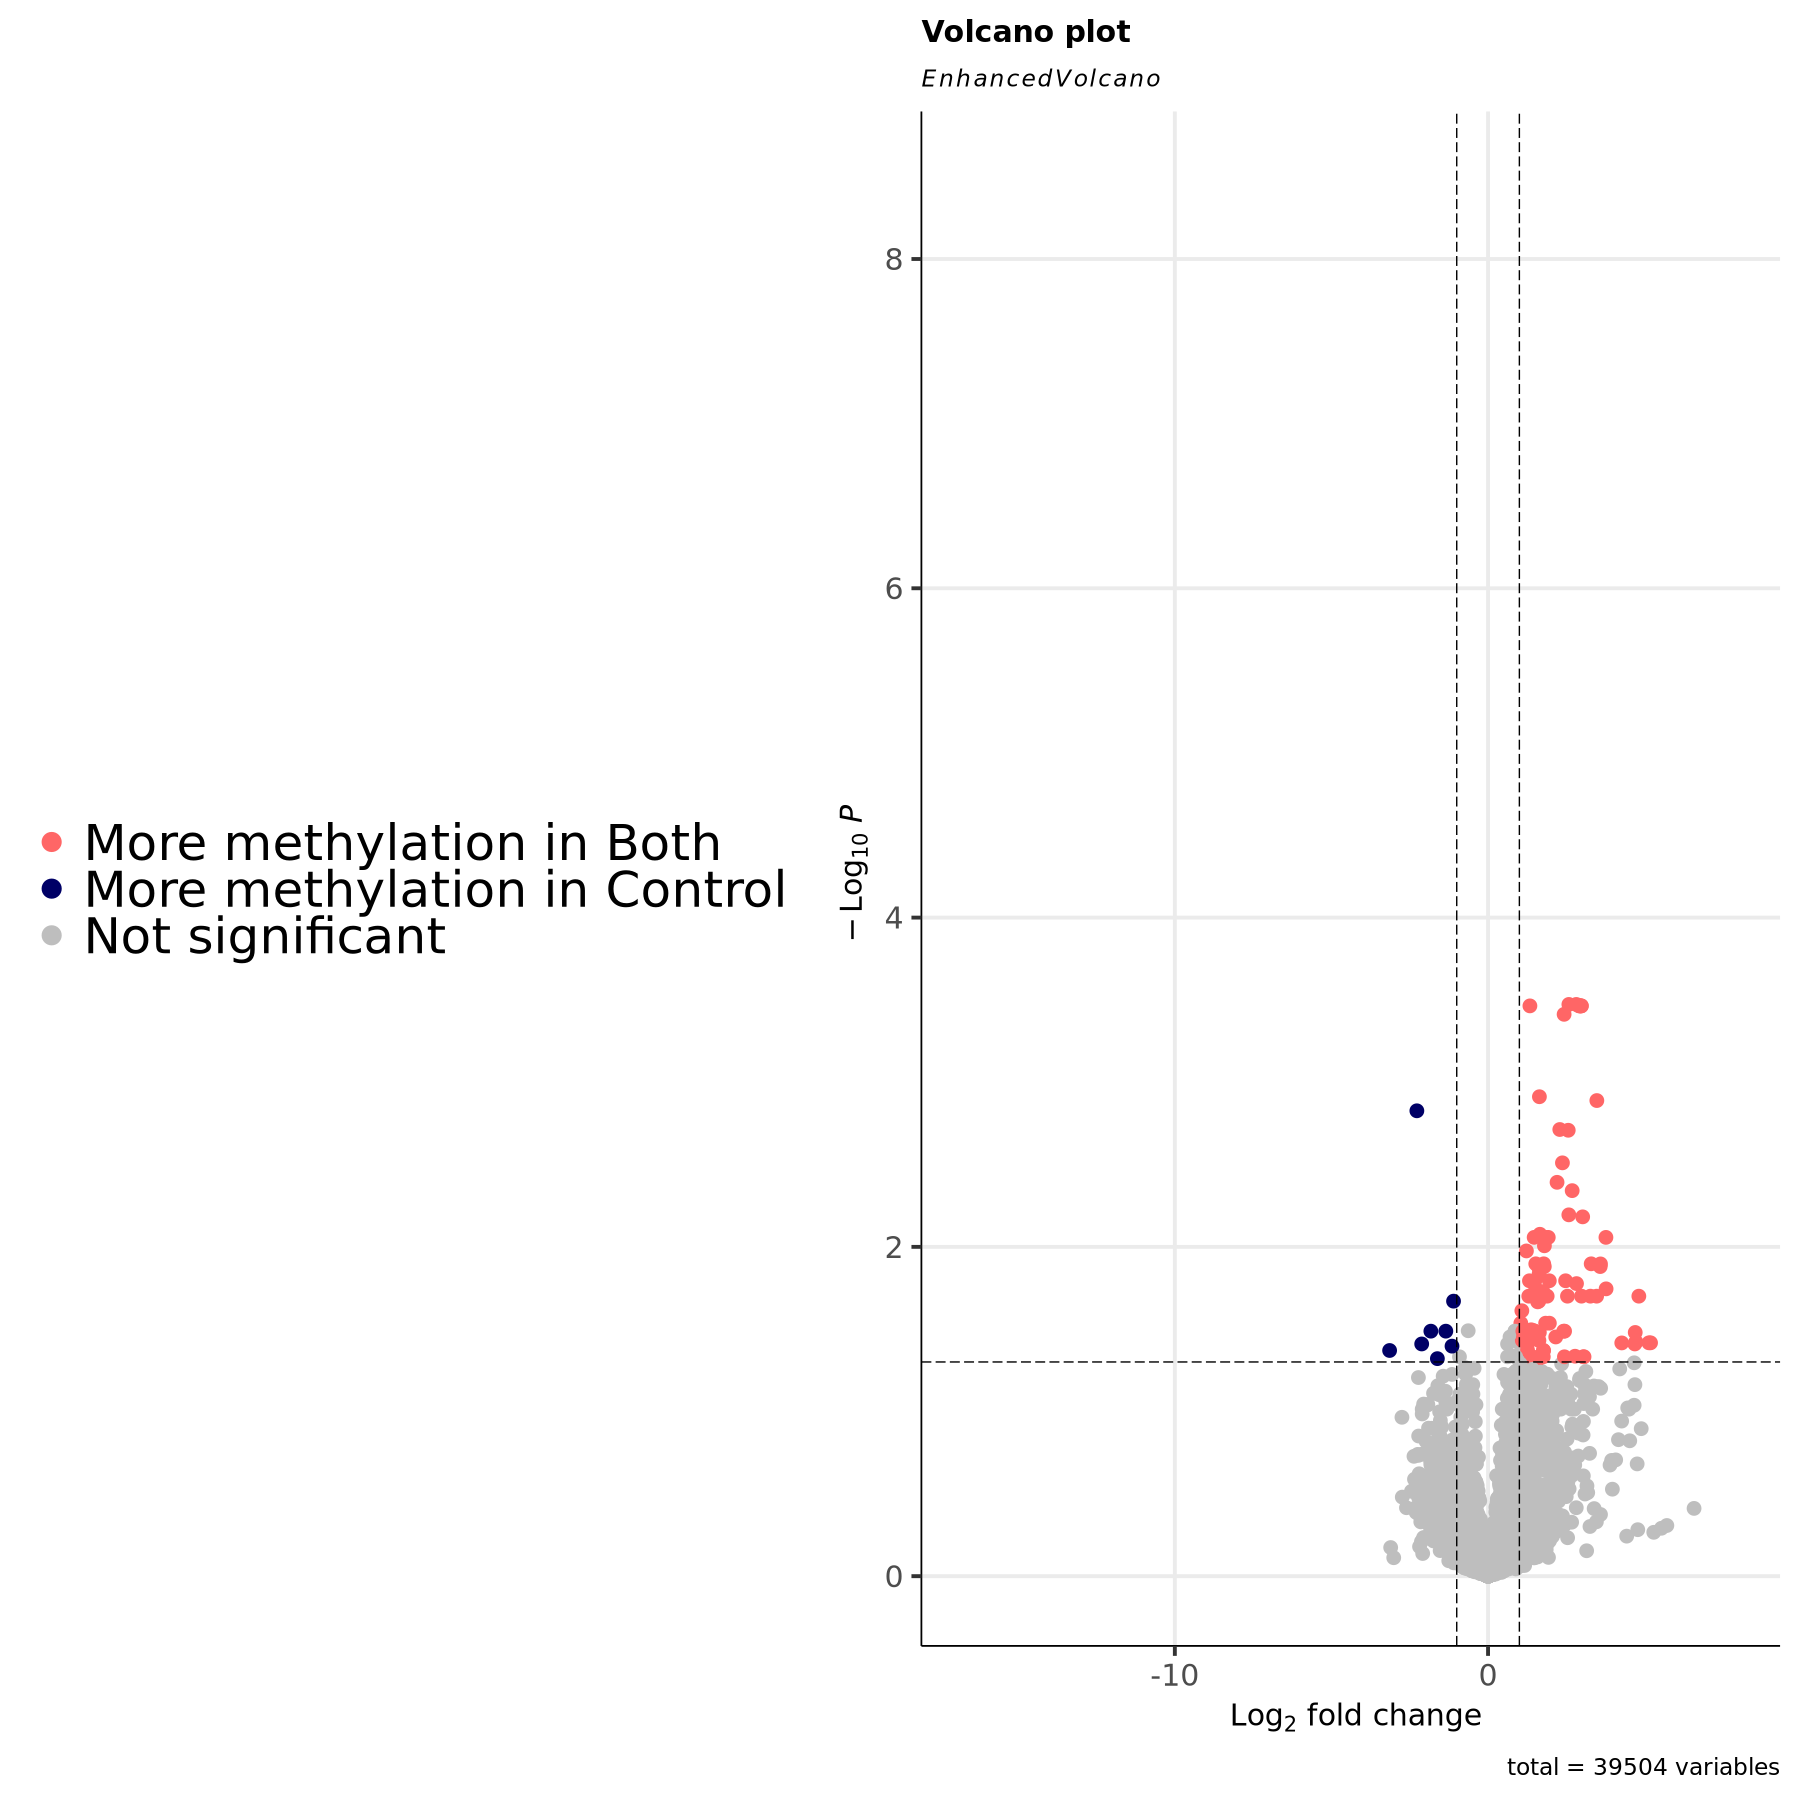

In [85]:
keyvals <- ifelse(
results5$log2FoldChange < -1& results5$padj <0.05, "#000066",
  ifelse(results5$log2FoldChange > 1& results5$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Both'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Control'

results5_plot <- EnhancedVolcano(results5,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(results5)[which(names(keyvals) %in% c('More methylation in Both', 'More methylation in Control'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
results5_plot

In [ ]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for both vs. control for phase 2
both_v_control.sig_genes = as.data.frame(results5[which(results5$padj < 0.05), ])

# add meta data for those genes
sig_bc_genes = merge(both_v_control.sig_genes, counts_meta, by="row.names")
head(sig_bc_genes)

# writing csv file
write.csv(sig_bc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2_bc_genes.csv")

#### given phase 2, what is the effect of phase 1


In [52]:
# for phase 2 hypoxic
p2hypoxic_meta = filter(meta, meta$Phase2 == 'hypoxic')
p2hypoxic_meta                               

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic
BBR-BBB-B50,2018--BBR-BBB-B50-CV,BBR-BBB-B50,BBR,BBB,B50,hypoxic,ambient,R,hypoxic,ambient,B,hypoxic,hypoxic
BBR-BBG-B38,2018--BBR-BBG-B38-CV,BBR-BBG-B38,BBR,BBG,B38,hypoxic,ambient,R,hypoxic,ambient,G,hypoxic,hypoxic
BBR-BBY-B26,2018--BBR-BBY-B26-CV,BBR-BBY-B26,BBR,BBY,B26,hypoxic,ambient,R,hypoxic,ambient,Y,hypoxic,hypoxic
WBG-BBB-W56,2018--WBG-BBB-W56-CV,WBG-BBB-W56,WBG,BBB,W56,normoxic,ambient,G,hypoxic,ambient,B,control,hypoxic
WBO-BBR-W03,2018--WBO-BBR-W03-CV,WBO-BBR-W03,WBO,BBR,W03,normoxic,ambient,O,hypoxic,ambient,R,control,hypoxic
WBR-BBY-W25,2018--WBR-BBY-W25-CV,WBR-BBY-W25,WBR,BBY,W25,normoxic,ambient,R,hypoxic,ambient,Y,control,hypoxic
WBY-BBV-W65,2018--WBY-BBV-W65-CV,WBY-BBV-W65,WBY,BBV,W65,normoxic,ambient,Y,hypoxic,ambient,V,control,hypoxic


In [53]:
# have to make sure counts matrix has the same columns as rows in meta
p2hypoxic_counts = counts_gene[,colnames(counts_gene) %in% p2hypoxic_meta$unique_ID, drop=FALSE]
head(p2hypoxic_counts)

,BBO-BBO-B16,BBO-BBY-B27,BBR-BBB-B50,BBR-BBG-B38,BBR-BBY-B26,WBG-BBB-W56,WBO-BBR-W03,WBR-BBY-W25,WBY-BBV-W65,WBY-BBY-W30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
COX1,0,0,0,0,0,0,0,0,0,0
COX2,0,0,0,0,0,0,0,0,0,0
COX3,0,0,0,0,0,0,0,0,0,0
CYTB,0,0,0,0,0,0,0,0,0,0
LOC111099029,15,11,9,15,11,50,1,9,30,13
LOC111099030,0,0,0,0,0,0,0,0,0,0


In [54]:
p2h_dds <- DESeqDataSetFromMatrix(countData = p2hypoxic_counts,
                              colData = p2hypoxic_meta, 
                              design = ~ Phase1)
p2h_dds=DESeq(p2h_dds)
resultsNames(p2h_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"


out of 15121 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 12, 0.079%
LFC < 0 (down)     : 34, 0.22%
outliers [1]       : 110, 0.73%
low counts [2]     : 12502, 83%
(mean count < 19)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



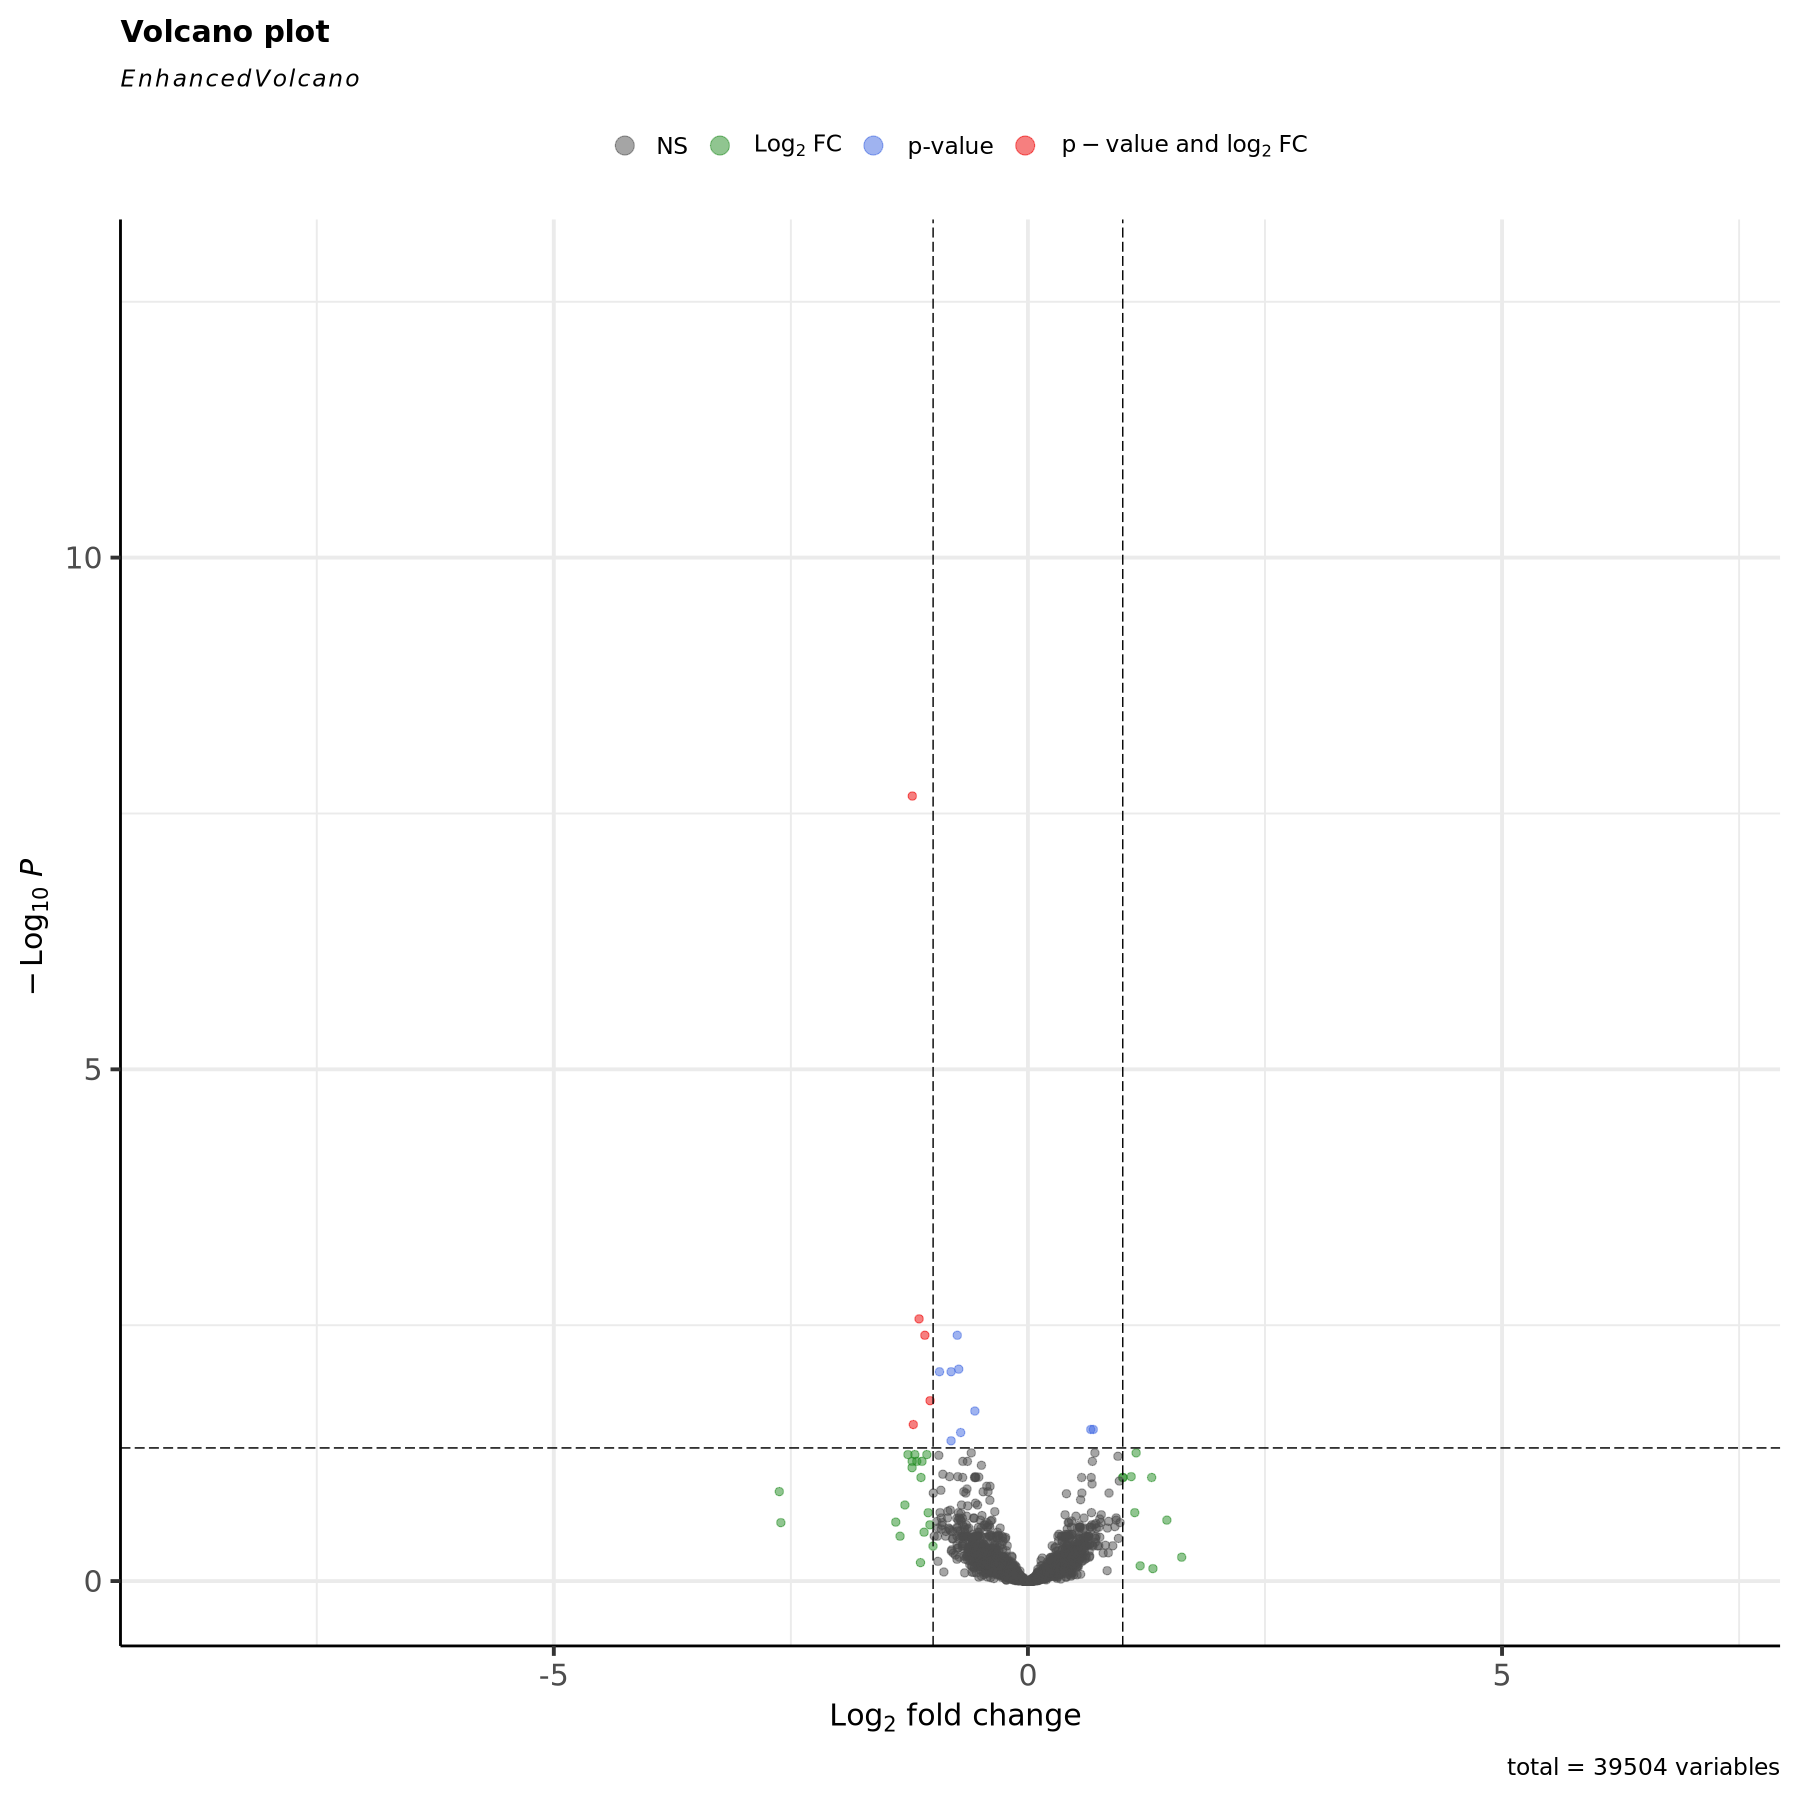

In [55]:
# phase 2 = hypoxic, looking at hypoxic vs. control for phase 1
res_p2h=results(p2h_dds, name="Phase1_hypoxic_vs_control")

summary(res_p2h)
   
EnhancedVolcano(res_p2h,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [56]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for hypoxic vs. control for phase 1, given phase 2 (hypoxic)
p21_hc.sig_genes = as.data.frame(res_p2h[which(res_p2h$padj < 0.05), ])

# add meta data for those genes
sig_p2h_hc_genes = merge(p21_hc.sig_genes, counts_meta, by="row.names")
head(sig_p2h_hc_genes)

# writing csv file
write.csv(sig_p2h_hc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2h_p1hc_genes.csv")

,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,⋯,WPV-BPR-G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,LOC111100393,81.38650,0.6624208,0.1749967,3.785334,1.535024e-04,3.300650e-02,266,213,227,⋯,5,NC_035780.1,Gnomon,gene,19844346,19846519,.,+,.,"gene_id ""LOC111111640""; db_xref ""GeneID:111111640""; gbkey ""Gene""; gene ""LOC111111640""; gene_biotype ""protein_coding"";"
2,LOC111105858,166.76824,-0.5596059,0.1416777,-3.949851,7.819983e-05,2.180038e-02,542,452,248,⋯,6,NC_035781.1,Gnomon,gene,40519320,40525463,.,-,.,"gene_id ""LOC111121817""; db_xref ""GeneID:111121817""; gbkey ""Gene""; gene ""LOC111121817""; gene_biotype ""protein_coding"";"
3,LOC111106800,37.87595,-1.0316182,0.2557875,-4.033106,5.504449e-05,1.726333e-02,43,65,48,⋯,56,NC_035781.1,Gnomon,gene,53754293,53755514,.,-,.,"gene_id ""LOC111122005""; db_xref ""GeneID:111122005""; gbkey ""Gene""; gene ""LOC111122005""; gene_biotype ""lncRNA"";"
4,LOC111113273,39.70373,-0.8104052,0.2205057,-3.675211,2.376525e-04,4.259072e-02,103,68,49,⋯,1,NC_035783.1,Gnomon,gene,18544122,18551219,.,-,.,"gene_id ""LOC111128151""; db_xref ""GeneID:111128151""; gbkey ""Gene""; gene ""LOC111128151""; gene_biotype ""protein_coding"";"
5,LOC111113309,76.00809,0.6891998,0.1824070,3.778363,1.578629e-04,3.300650e-02,209,163,169,⋯,4,NC_035783.1,Gnomon,gene,19185130,19186624,.,+,.,"gene_id ""LOC111129496""; db_xref ""GeneID:111129496""; gbkey ""Gene""; gene ""LOC111129496""; gene_biotype ""protein_coding"";"
6,LOC111117059,57.43026,-1.2192004,0.1785174,-6.829588,8.515913e-12,2.136643e-08,78,74,60,⋯,2,NC_035784.1,Gnomon,gene,16080460,16090876,.,-,.,"gene_id ""LOC111134366""; db_xref ""GeneID:111134366""; gbkey ""Gene""; gene ""LOC111134366""; gene_biotype ""protein_coding"";"


In [57]:
# for phase 2 both
p2both_meta = filter(meta, meta$Phase2 == 'both')
p2both_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2both_counts = counts_gene[,colnames(counts_gene) %in% p2both_meta$unique_ID, drop=FALSE]
head(p2both_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BPO-BPO-O16,2018--BPO-BPO-O16-CV,BPO-BPO-O16,BPO,BPO,O16,hypoxic,warm,O,hypoxic,warm,O,both,both
BPR-BPG-O38,2018--BPR-BPG-O38-CV,BPR-BPG-O38,BPR,BPG,O38,hypoxic,warm,R,hypoxic,warm,G,both,both
BPR-BPR-O02,2018--BPR-BPR-O02-CV,BPR-BPR-O02,BPR,BPR,O02,hypoxic,warm,R,hypoxic,warm,R,both,both
BPY-BPG-O42,2018--BPY-BPG-O42-CV,BPY-BPG-O42,BPY,BPG,O42,hypoxic,warm,Y,hypoxic,warm,G,both,both
BPY-BPY-O29,2018--BPY-BPY-O29-CV,BPY-BPY-O29,BPY,BPY,O29,hypoxic,warm,Y,hypoxic,warm,Y,both,both
WPB-BPG-G45,2018--WPB-BPG-G45-CV,WPB-BPG-G45,WPB,BPG,G45,normoxic,warm,B,hypoxic,warm,G,warm,both
WPO-BPO-G16,2018--WPO-BPO-G16-CV,WPO-BPO-G16,WPO,BPO,G16,normoxic,warm,O,hypoxic,warm,O,warm,both
WPO-BPY-G28,2018--WPO-BPY-G28-CV,WPO-BPY-G28,WPO,BPY,G28,normoxic,warm,O,hypoxic,warm,Y,warm,both
WPR-BPY-G25,2018--WPR-BPY-G25-CV,WPR-BPY-G25,WPR,BPY,G25,normoxic,warm,R,hypoxic,warm,Y,warm,both


,BPO-BPO-O16,BPR-BPG-O38,BPR-BPR-O02,BPY-BPG-O42,BPY-BPY-O29,WPB-BPG-G45,WPO-BPO-G16,WPO-BPY-G28,WPR-BPY-G25,WPV-BPR-G11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
COX1,0,0,0,0,0,0,0,0,0,0
COX2,0,0,0,0,0,0,0,0,0,0
COX3,0,0,0,0,0,0,0,0,0,0
CYTB,0,0,0,0,0,0,0,0,0,0
LOC111099029,1,11,3,0,11,15,0,0,4,0
LOC111099030,0,0,0,0,0,0,0,0,0,0


In [58]:
p2both_dds <- DESeqDataSetFromMatrix(countData = p2both_counts,
                              colData = p2both_meta, 
                              design = ~ Phase1)
p2both_dds=DESeq(p2both_dds)
resultsNames(p2both_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Intercept"           "Phase1_warm_vs_both"


out of 13165 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 43, 0.33%
LFC < 0 (down)     : 1, 0.0076%
outliers [1]       : 333, 2.5%
low counts [2]     : 11140, 85%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



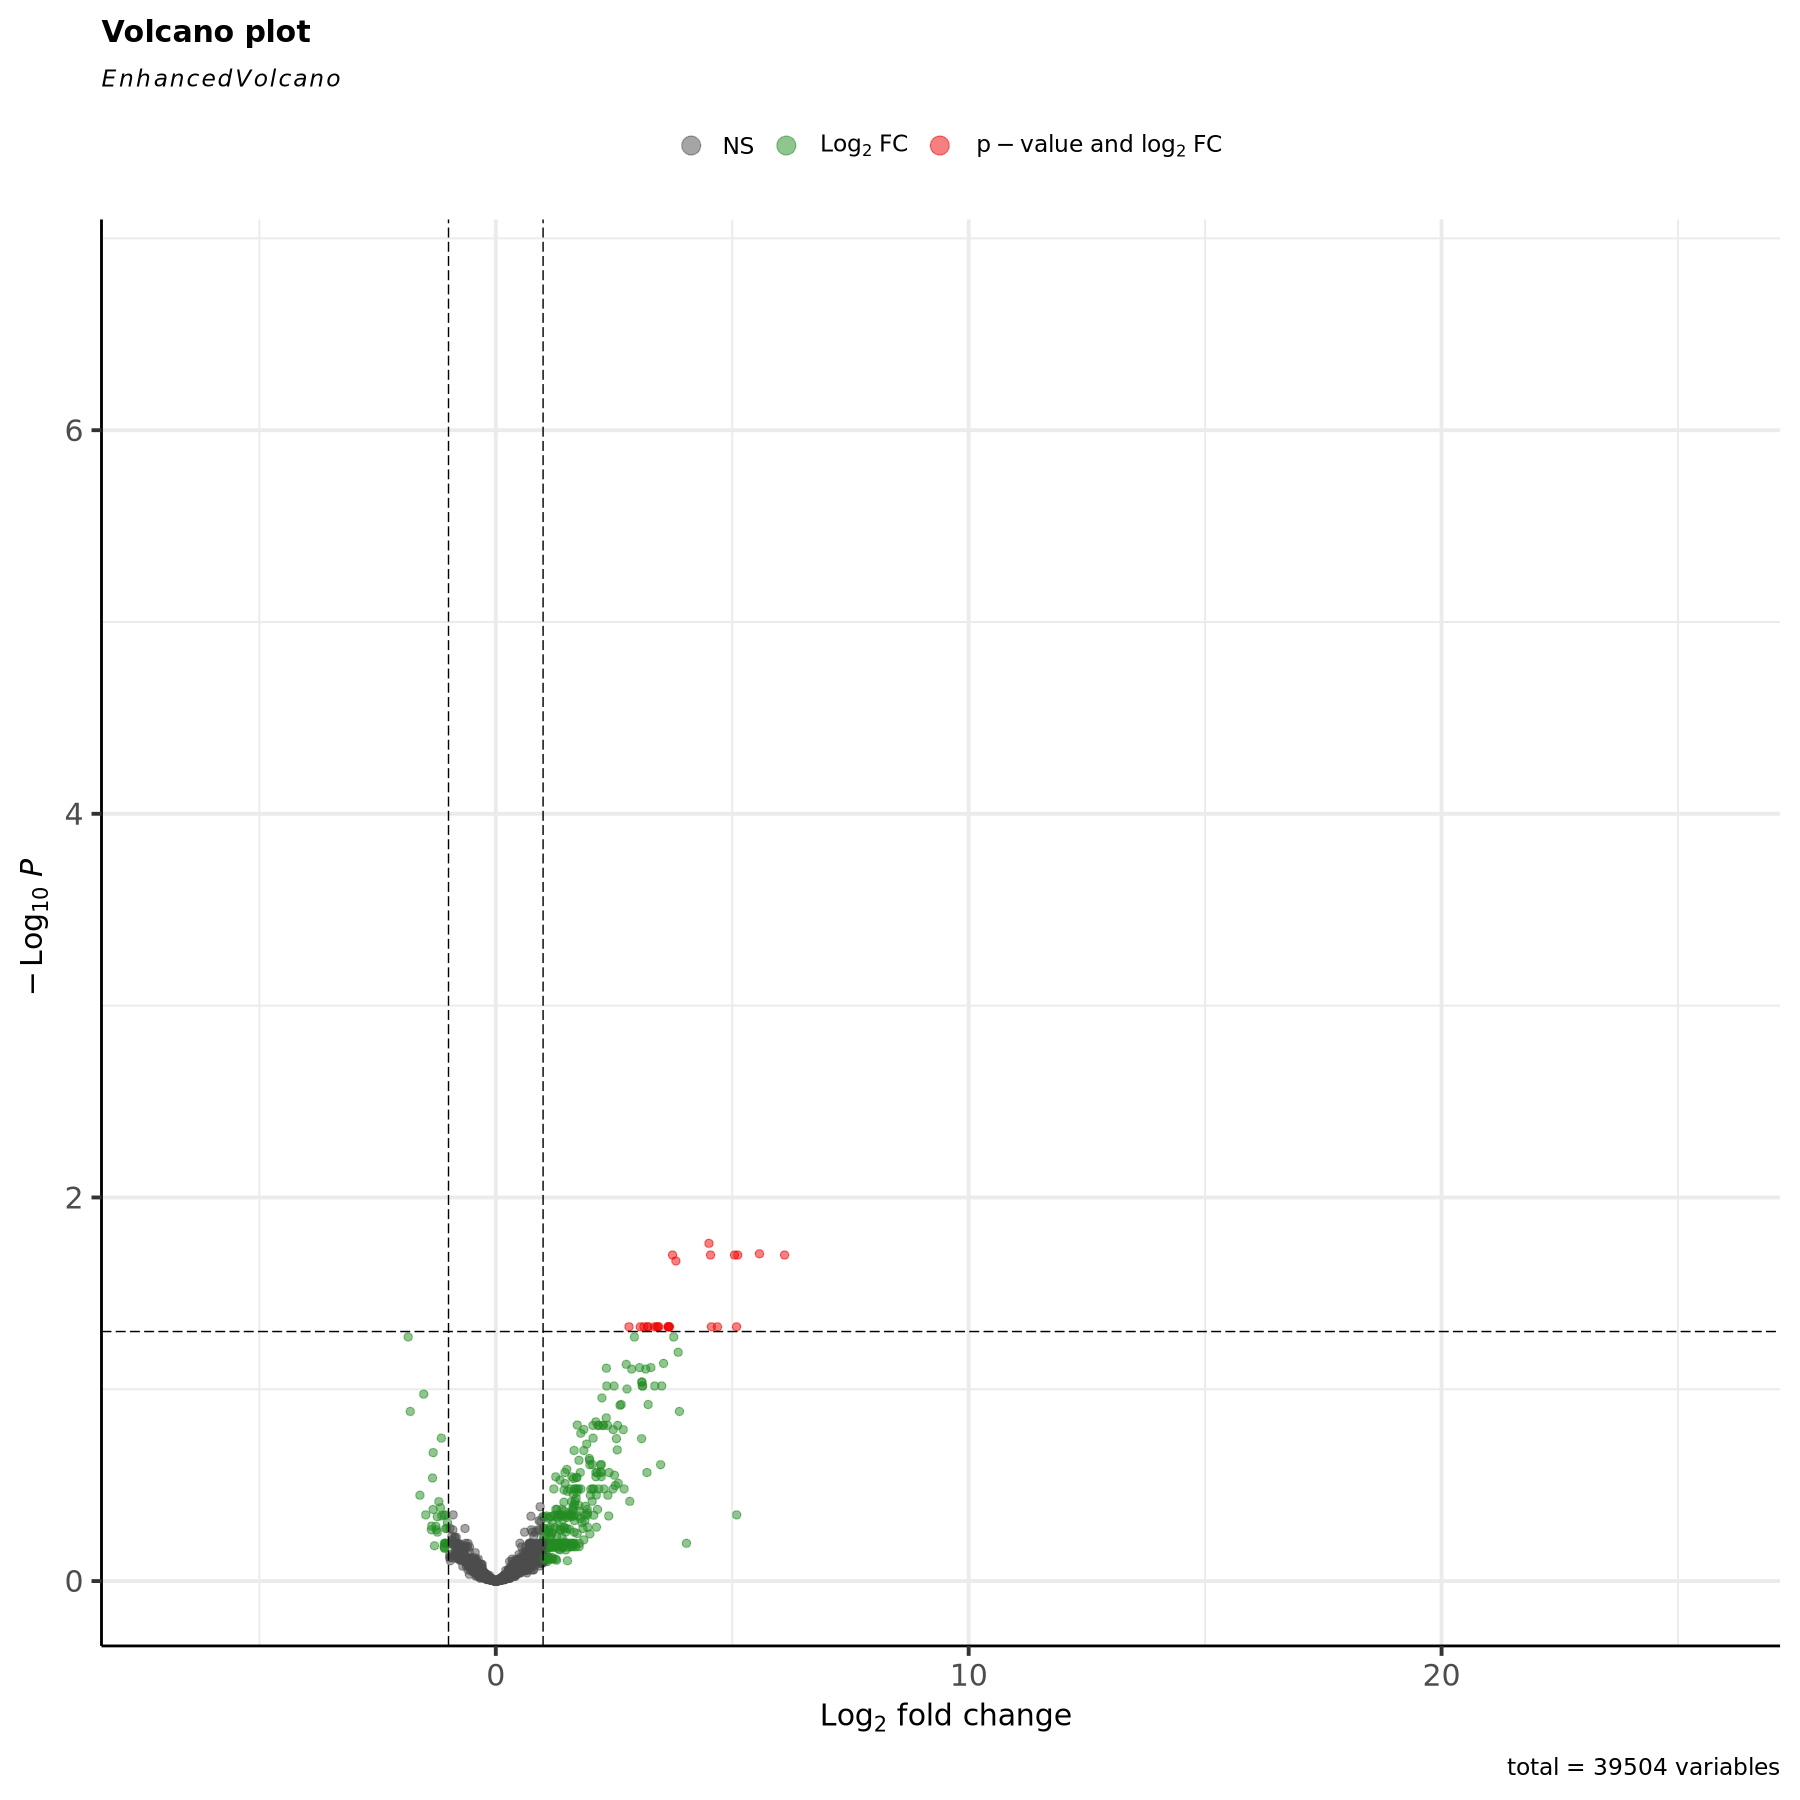

In [59]:
# phase 1 effects (warm vs. both) given phase 2 (both)
res_p2b=results(p2both_dds, name="Phase1_warm_vs_both")

summary(res_p2b)
   
EnhancedVolcano(res_p2b,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [60]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for warm vs. both for phase 1, given phase 2 (both)
p21_wb.sig_genes = as.data.frame(res_p2b[which(res_p2b$padj < 0.05), ])

# add meta data for those genes
sig_p2b_wb_genes = merge(p21_wb.sig_genes, counts_meta, by="row.names")
head(sig_p2b_wb_genes)

# writing csv file
write.csv(sig_p2b_wb_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2b_p1wb_genes.csv")

,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,⋯,WPV-BPR-G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,LOC111099424,14.09339,5.091371,1.4917964,3.412913,6.427248e-04,0.04723631,57,50,10,⋯,2,NC_035780.1,Gnomon,gene,4012455,4013027,.,+,.,"gene_id ""LOC111130177""; db_xref ""GeneID:111130177""; gbkey ""Gene""; gene ""LOC111130177""; gene_biotype ""protein_coding"";"
2,LOC111104287,138.05484,3.737378,0.9429858,3.963345,7.390695e-05,0.01996310,187,124,152,⋯,173,NC_035781.1,Gnomon,gene,15910433,15919352,.,+,.,"gene_id ""LOC111120508""; db_xref ""GeneID:111120508""; gbkey ""Gene""; gene ""LOC111120508""; gene_biotype ""protein_coding"";"
3,LOC111105528,73.22013,4.688128,1.3587797,3.450249,5.600698e-04,0.04723631,43,37,30,⋯,88,NC_035781.1,Gnomon,gene,35832098,35847015,.,-,.,"gene_id ""LOC111119616""; db_xref ""GeneID:111119616""; gbkey ""Gene""; gene ""LOC111119616""; gene_biotype ""protein_coding"";"
4,LOC111107422,179.02783,3.646694,1.0712011,3.404304,6.633284e-04,0.04723631,110,177,78,⋯,241,NC_035782.1,Gnomon,gene,2190979,2203743,.,+,.,"gene_id ""LOC111123344""; db_xref ""GeneID:111123344""; gbkey ""Gene""; gene ""LOC111123344""; gene_biotype ""protein_coding"";"
5,LOC111109804,69.24427,3.652908,1.0339314,3.533028,4.108293e-04,0.04723631,92,74,27,⋯,87,NC_035782.1,Gnomon,gene,42862649,42864999,.,-,.,"gene_id ""LOC111123697""; db_xref ""GeneID:111123697""; gbkey ""Gene""; gene ""LOC111123697""; gene_biotype ""protein_coding"";"
6,LOC111114820,37.76093,6.107272,1.5513455,3.936758,8.258968e-05,0.01996310,3,11,4,⋯,54,NC_035783.1,Gnomon,gene,41231076,41243082,.,+,.,"gene_id ""LOC111130153""; db_xref ""GeneID:111130153""; gbkey ""Gene""; gene ""LOC111130153""; gene_biotype ""protein_coding"";"


In [61]:
# for phase 2 both
p2control_meta = filter(meta, meta$Phase2 == 'control')
p2control_meta  

# have to make sure counts matrix has the same columns as rows in meta
p2control_counts = counts_gene[,colnames(counts_gene) %in% p2control_meta$unique_ID, drop=FALSE]
head(p2control_counts)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control
BBY-WBG-B42,2018--BBY-WBG-B42-CV,BBY-WBG-B42,BBY,WBG,B42,hypoxic,ambient,Y,normoxic,ambient,G,hypoxic,control
WBB-WBV-W69,2018--WBB-WBV-W69-CV,WBB-WBV-W69,WBB,WBV,W69,normoxic,ambient,B,normoxic,ambient,V,control,control
WBG-WBG-W44,2018--WBG-WBG-W44-CV,WBG-WBG-W44,WBG,WBG,W44,normoxic,ambient,G,normoxic,ambient,G,control,control
WBO-WBV-W64,2018--WBO-WBV-W64-CV,WBO-WBV-W64,WBO,WBV,W64,normoxic,ambient,O,normoxic,ambient,V,control,control
WBV-WBO-W23,2018--WBV-WBO-W23-CV,WBV-WBO-W23,WBV,WBO,W23,normoxic,ambient,V,normoxic,ambient,O,control,control


,BBB-WBO-B21,BBB-WBV-B70,BBO-WBO-B16,BBO-WBV-B64,BBY-WBG-B42,WBB-WBV-W69,WBG-WBG-W44,WBO-WBV-W64,WBV-WBO-W23,WBV-WBR-W12
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
COX1,0,0,0,0,0,0,0,0,0,0
COX2,0,0,0,0,0,0,0,0,0,0
COX3,0,0,0,0,0,0,0,0,0,0
CYTB,0,0,0,0,0,0,0,0,0,0
LOC111099029,7,13,16,12,1,9,10,7,6,1
LOC111099030,0,0,0,0,0,0,0,0,0,0


In [62]:
p2control_dds <- DESeqDataSetFromMatrix(countData = p2control_counts,
                              colData = p2control_meta, 
                              design = ~ Phase1)
p2control_dds=DESeq(p2control_dds)
resultsNames(p2control_dds)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"                 "Phase1_hypoxic_vs_control"


out of 15326 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 47, 0.31%
LFC < 0 (down)     : 86, 0.56%
outliers [1]       : 193, 1.3%
low counts [2]     : 7804, 51%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



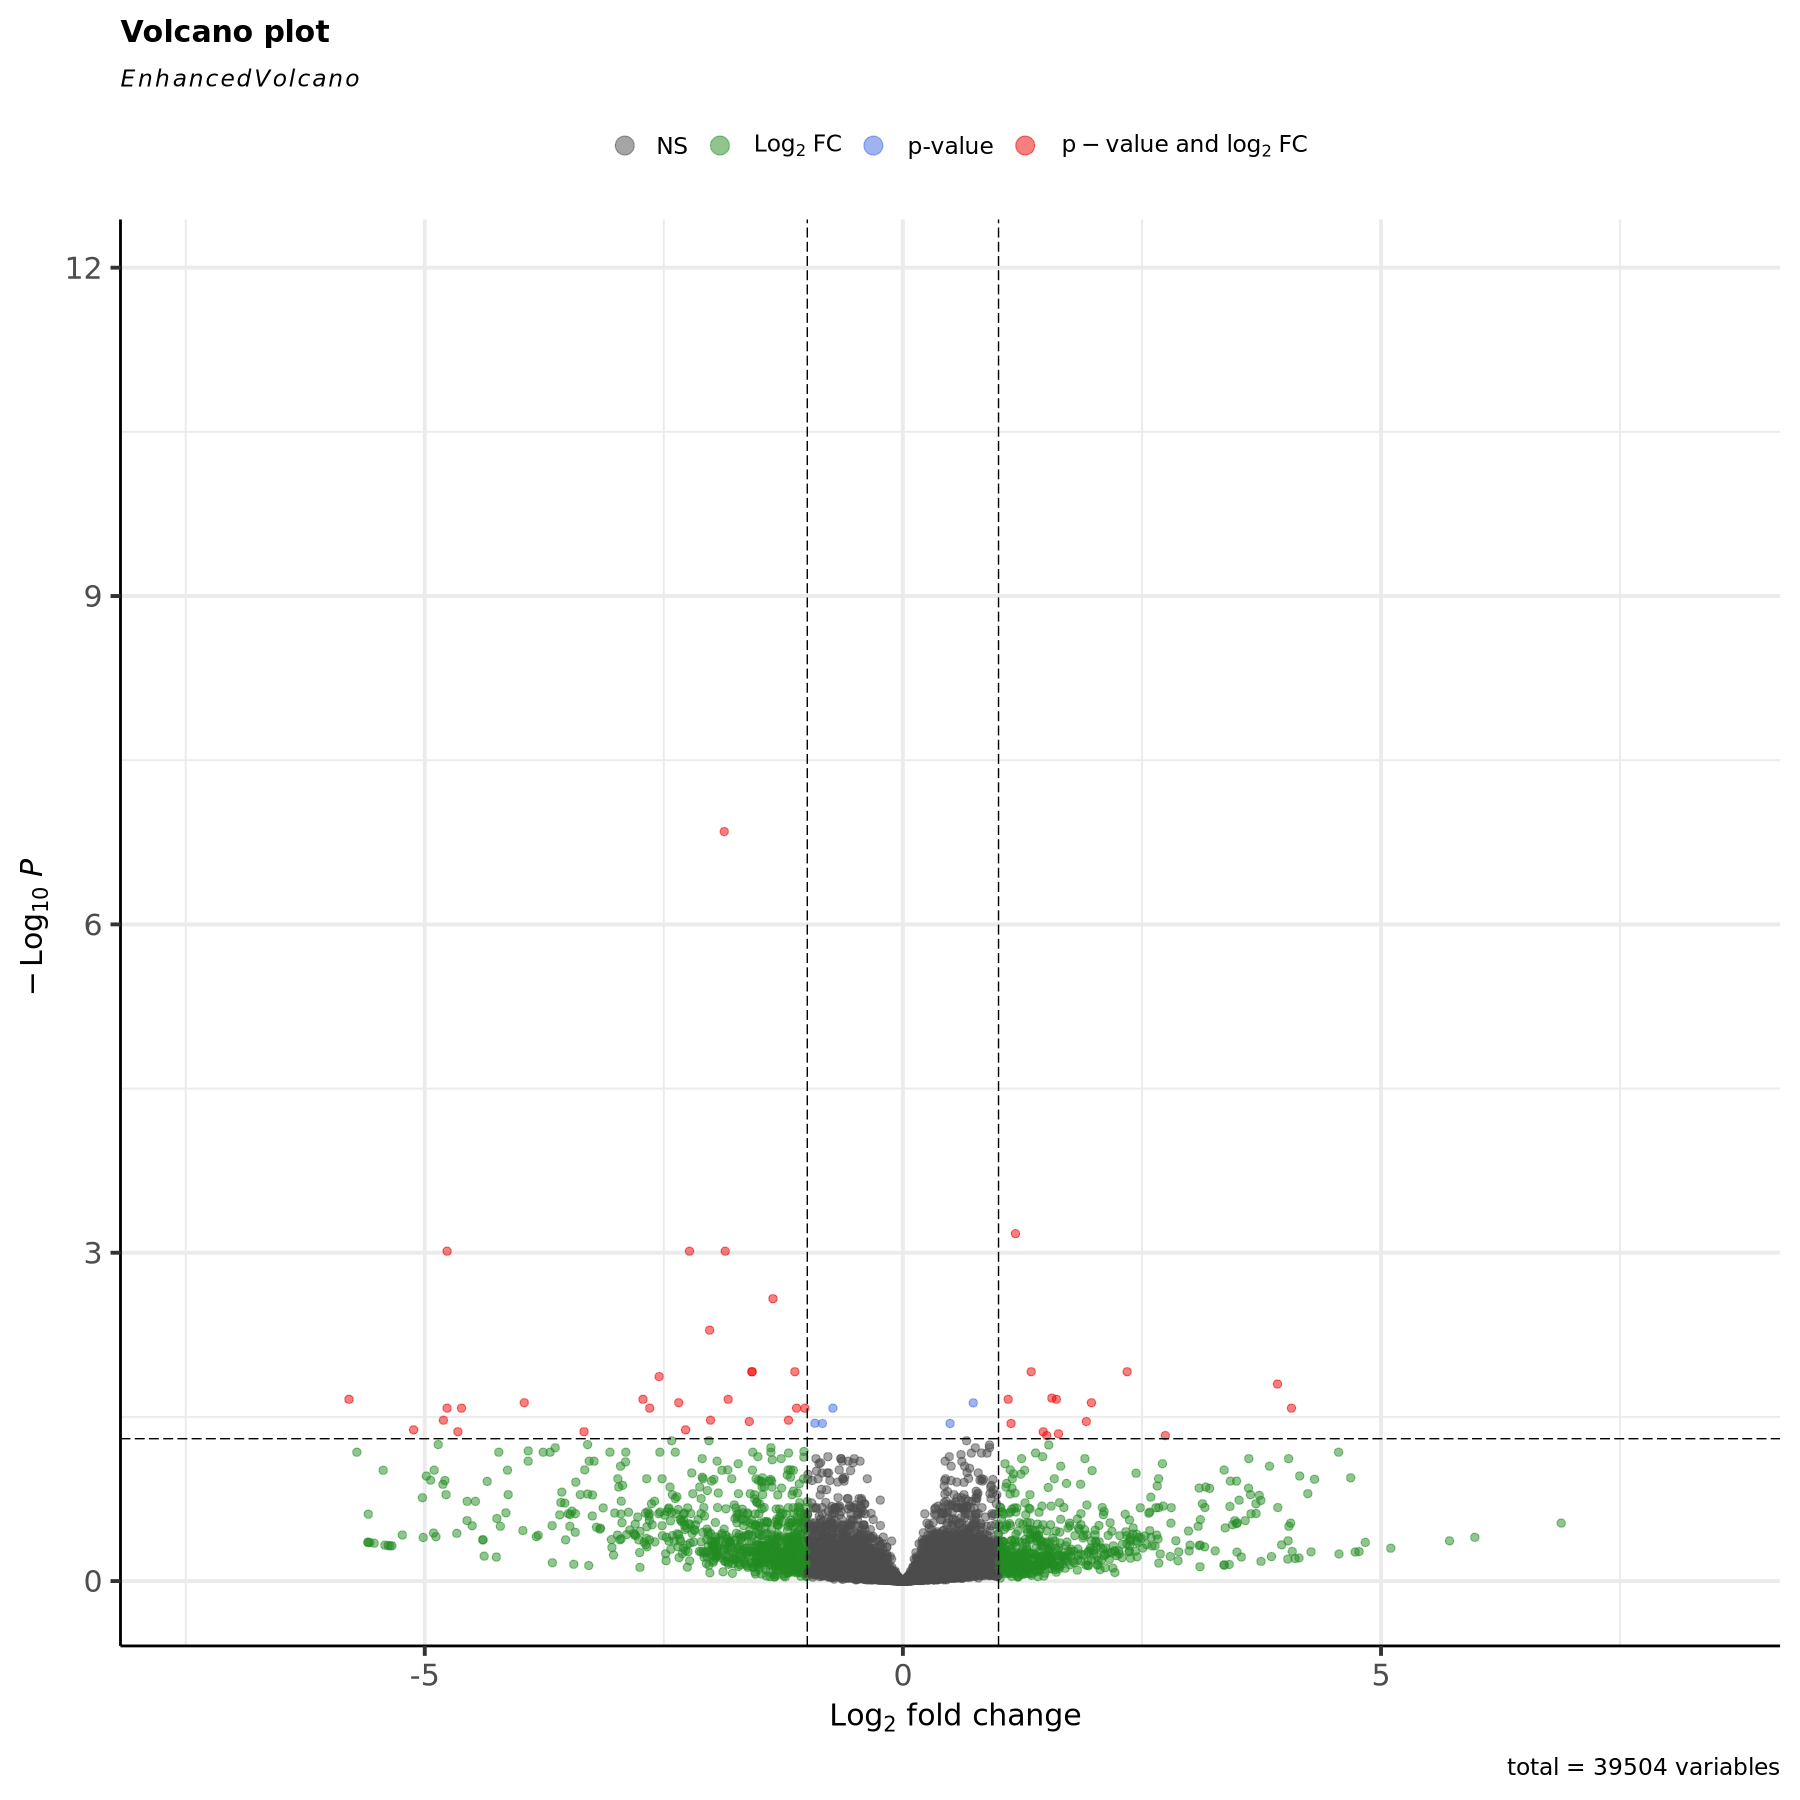

In [63]:
# effects of phase 1 (hypoxic vs. control), given phase 2 (control)
res_p2c=results(p2control_dds, name="Phase1_hypoxic_vs_control")

summary(res_p2c)
   
EnhancedVolcano(res_p2c,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [64]:
### saving sig genes into dataframe and csv file

# grabbing all sig genes for hypoxic vs. control for phase 1, given phase 2 (control)
p21_hc.sig_genes = as.data.frame(res_p2c[which(res_p2c$padj < 0.05), ])

# add meta data for those genes
sig_p2c_hc_genes = merge(p21_hc.sig_genes, counts_meta, by="row.names")
head(sig_p2c_hc_genes)

# writing csv file
write.csv(sig_p2c_hc_genes,
          "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_p2c_p1hc_genes.csv")

,Row.names,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,BBB-WBO-B21,BBB-WBV-B70,BBO-BBO-B16,⋯,WPV-BPR-G11,seqname,source,feature,start,end,score,strand,frame,attributes
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,LOC111099424,12.251342,2.345118,0.5498753,4.264819,2.000648e-05,0.012218955,57,50,10,⋯,2,NC_035780.1,Gnomon,gene,4012455,4013027,.,+,.,"gene_id ""LOC111130177""; db_xref ""GeneID:111130177""; gbkey ""Gene""; gene ""LOC111130177""; gene_biotype ""protein_coding"";"
2,LOC111099567,10.957426,-1.827096,0.4551509,-4.014264,5.963168e-05,0.021852028,8,9,22,⋯,0,NC_035780.1,Gnomon,gene,6626250,6630796,.,-,.,"gene_id ""LOC111132592""; db_xref ""GeneID:111132592""; gbkey ""Gene""; gene ""LOC111132592""; gene_biotype ""protein_coding"";"
3,LOC111100699,4.766713,4.063722,1.0408043,3.904405,9.445732e-05,0.026313561,39,26,26,⋯,1,NC_035780.1,Gnomon,gene,24803109,24806091,.,-,.,"gene_id ""LOC111118982""; db_xref ""GeneID:111118982""; gbkey ""Gene""; gene ""LOC111118982""; gene_biotype ""protein_coding"";"
4,LOC111101020,21.435473,1.605386,0.3985725,4.027840,5.629173e-05,0.021852028,68,55,34,⋯,0,NC_035780.1,Gnomon,gene,30058299,30061941,.,-,.,"gene_id ""LOC111116791""; db_xref ""GeneID:111116791""; gbkey ""Gene""; gene ""LOC111116791""; gene_biotype ""protein_coding"";"
5,LOC111101925,7.177728,-2.272699,0.6181228,-3.676776,2.362005e-04,0.041511110,7,3,31,⋯,0,NC_035780.1,Gnomon,gene,46199697,46206016,.,-,.,"gene_id ""LOC111119868""; db_xref ""GeneID:111119868""; gbkey ""Gene""; gene ""LOC111119868""; gene_biotype ""protein_coding"";"
6,LOC111103792,15.266591,-2.021323,0.4422751,-4.570284,4.870634e-06,0.005099554,14,12,21,⋯,0,NC_035781.1,Gnomon,gene,9603899,9612709,.,+,.,"gene_id ""LOC111118210""; db_xref ""GeneID:111118210""; gbkey ""Gene""; gene ""LOC111118210""; gene_biotype ""protein_coding"";"


#### design = ~T1_temp + T1_oxygen

In [65]:
dds_t1 <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_temp + T1_oxygen + T1_temp:T1_oxygen)
dds_t1=DESeq(dds_t1)
resultsNames(dds_t1)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 385 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                     "T1_temp_warm_vs_ambient"      
[3] "T1_oxygen_normoxic_vs_hypoxic" "T1_tempwarm.T1_oxygennormoxic"

In [66]:
model.matrix(~T1_temp + T1_oxygen + T1_temp:T1_oxygen, data = meta)

,(Intercept),T1_tempwarm,T1_oxygennormoxic,T1_tempwarm:T1_oxygennormoxic
BBB-WBO-B21,1,0,0,0
BBB-WBV-B70,1,0,0,0
BBO-BBO-B16,1,0,0,0
BBO-BBY-B27,1,0,0,0
BBO-WBO-B16,1,0,0,0
BBO-WBV-B64,1,0,0,0
BBR-BBB-B50,1,0,0,0
BBR-BBG-B38,1,0,0,0
BBR-BBY-B26,1,0,0,0
BBY-WBG-B42,1,0,0,0


so i should relevel because this is treating normoxic warm as the control I think?

In [67]:
tail(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
WBY-BBY-W30,2018--WBY-BBY-W30-CV,WBY-BBY-W30,WBY,BBY,W30,normoxic,ambient,Y,hypoxic,ambient,Y,control,hypoxic
WPB-BPG-G45,2018--WPB-BPG-G45-CV,WPB-BPG-G45,WPB,BPG,G45,normoxic,warm,B,hypoxic,warm,G,warm,both
WPO-BPO-G16,2018--WPO-BPO-G16-CV,WPO-BPO-G16,WPO,BPO,G16,normoxic,warm,O,hypoxic,warm,O,warm,both
WPO-BPY-G28,2018--WPO-BPY-G28-CV,WPO-BPY-G28,WPO,BPY,G28,normoxic,warm,O,hypoxic,warm,Y,warm,both
WPR-BPY-G25,2018--WPR-BPY-G25-CV,WPR-BPY-G25,WPR,BPY,G25,normoxic,warm,R,hypoxic,warm,Y,warm,both
WPV-BPR-G11,2018--WPV-BPR-G11-CV,WPV-BPR-G11,WPV,BPR,G11,normoxic,warm,V,hypoxic,warm,R,warm,both



out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 6, 0.034%
LFC < 0 (down)     : 2, 0.011%
outliers [1]       : 204, 1.1%
low counts [2]     : 8756, 49%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



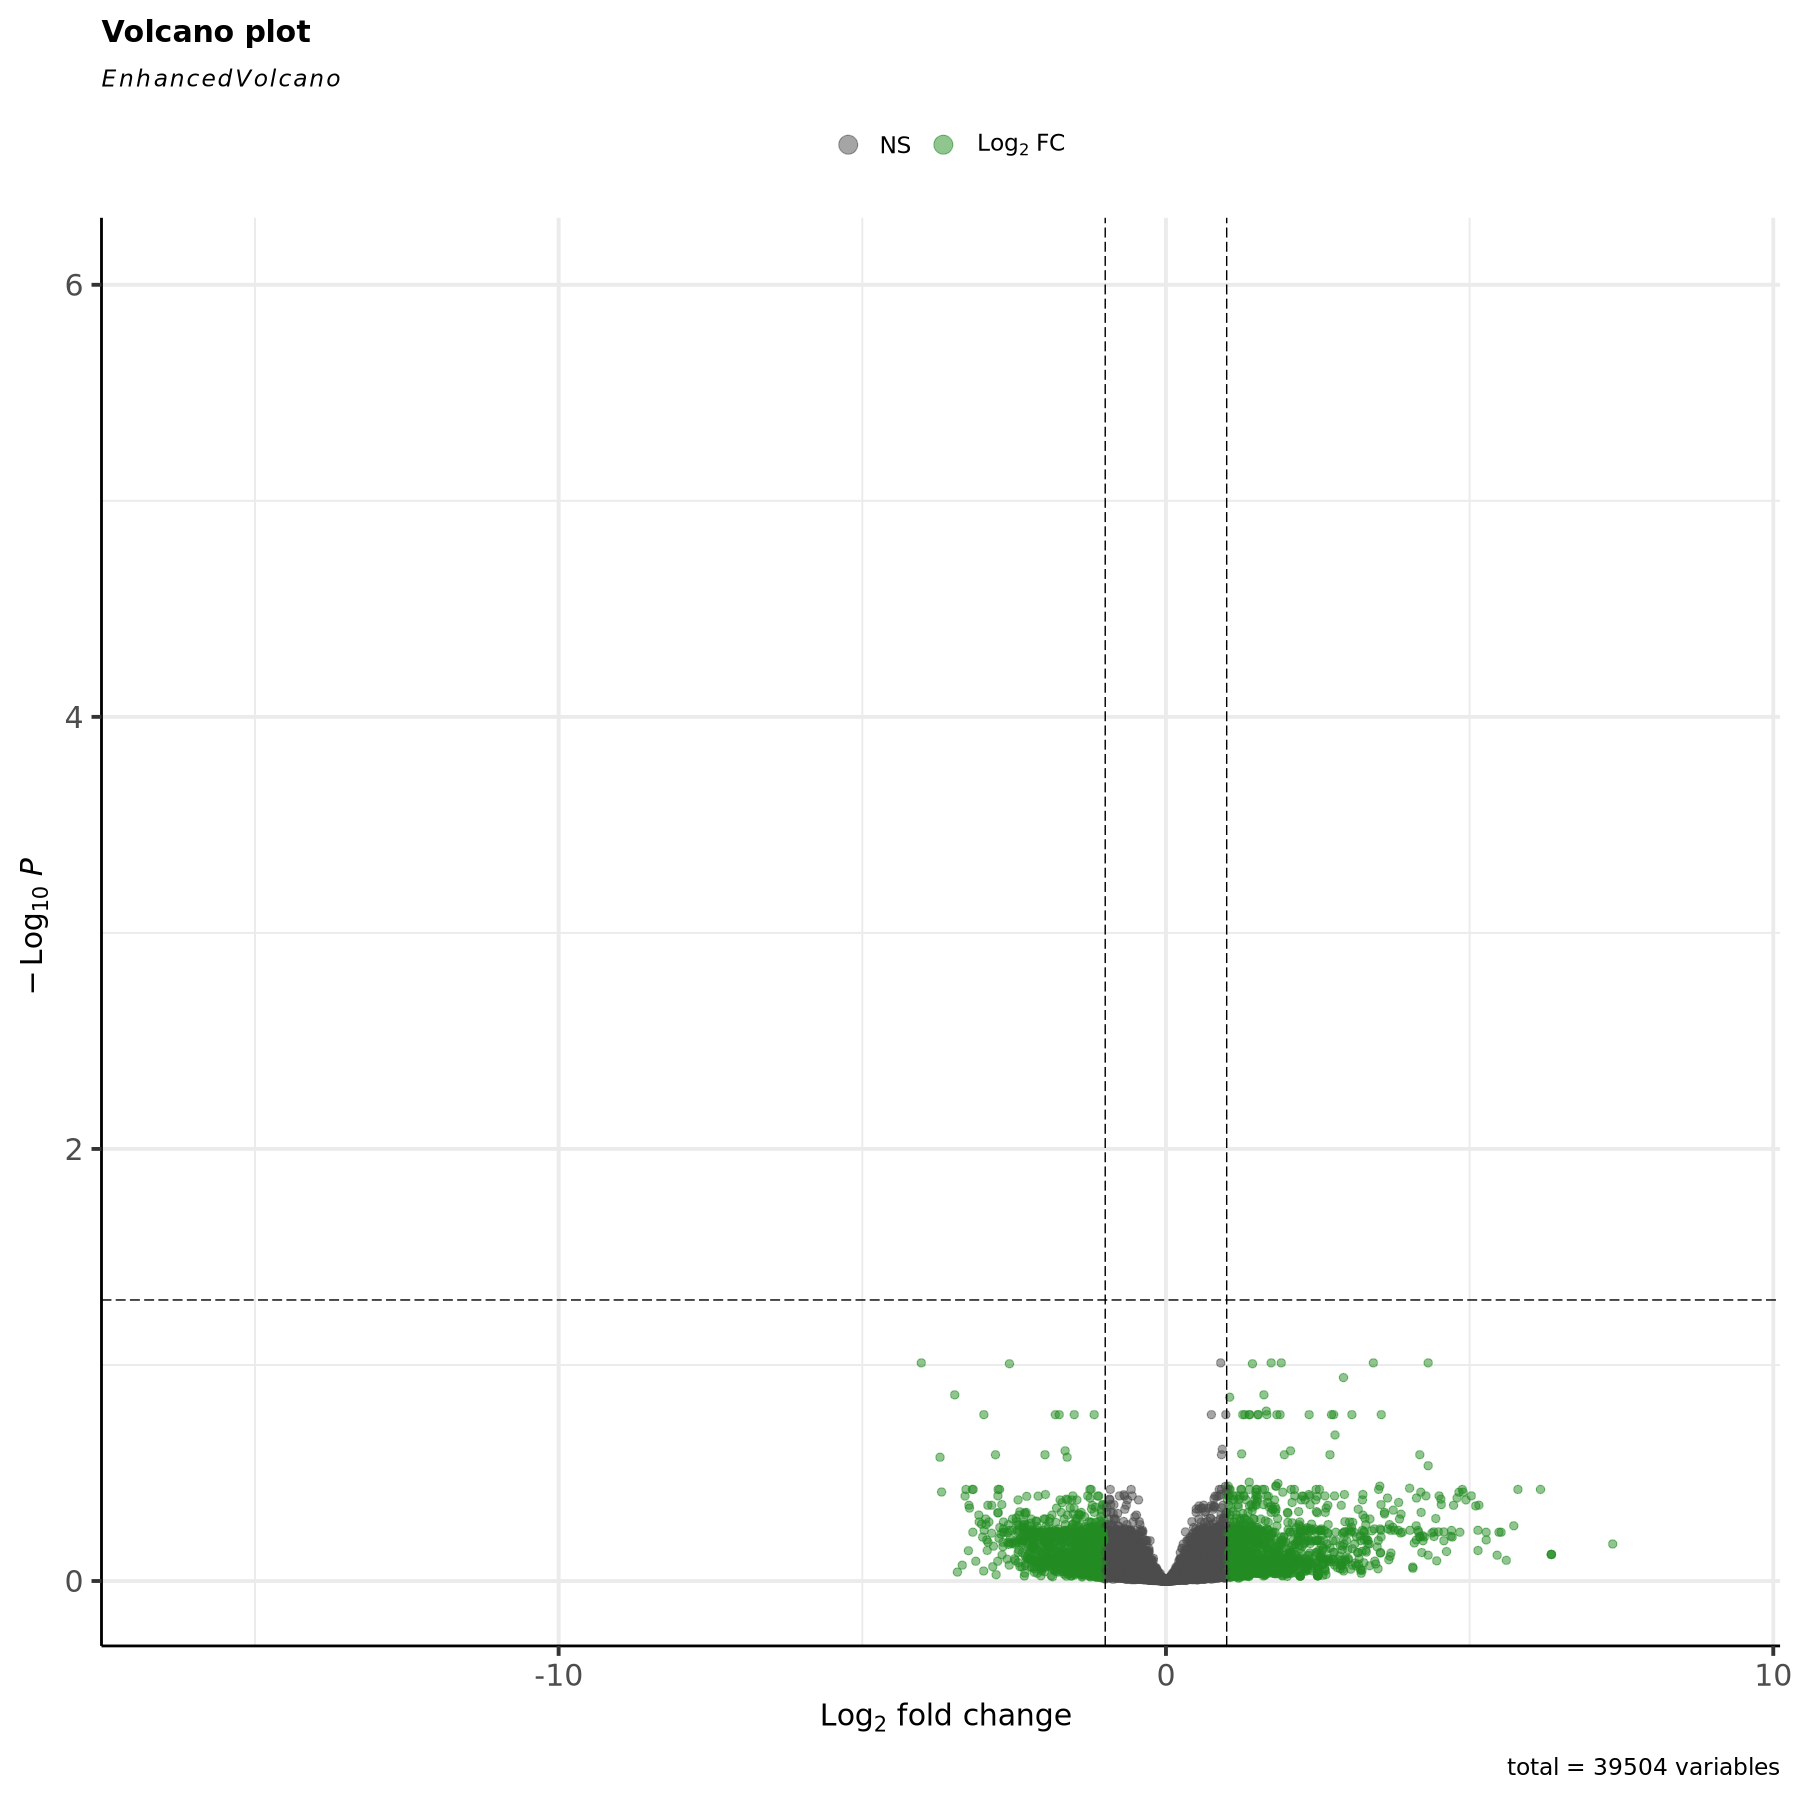

In [68]:
res_t1_temp=results(dds_t1, name="T1_temp_warm_vs_ambient")

summary(res_t1_temp)
   
EnhancedVolcano(res_t1_temp,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.0056%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 204, 1.1%
low counts [2]     : 6, 0.034%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



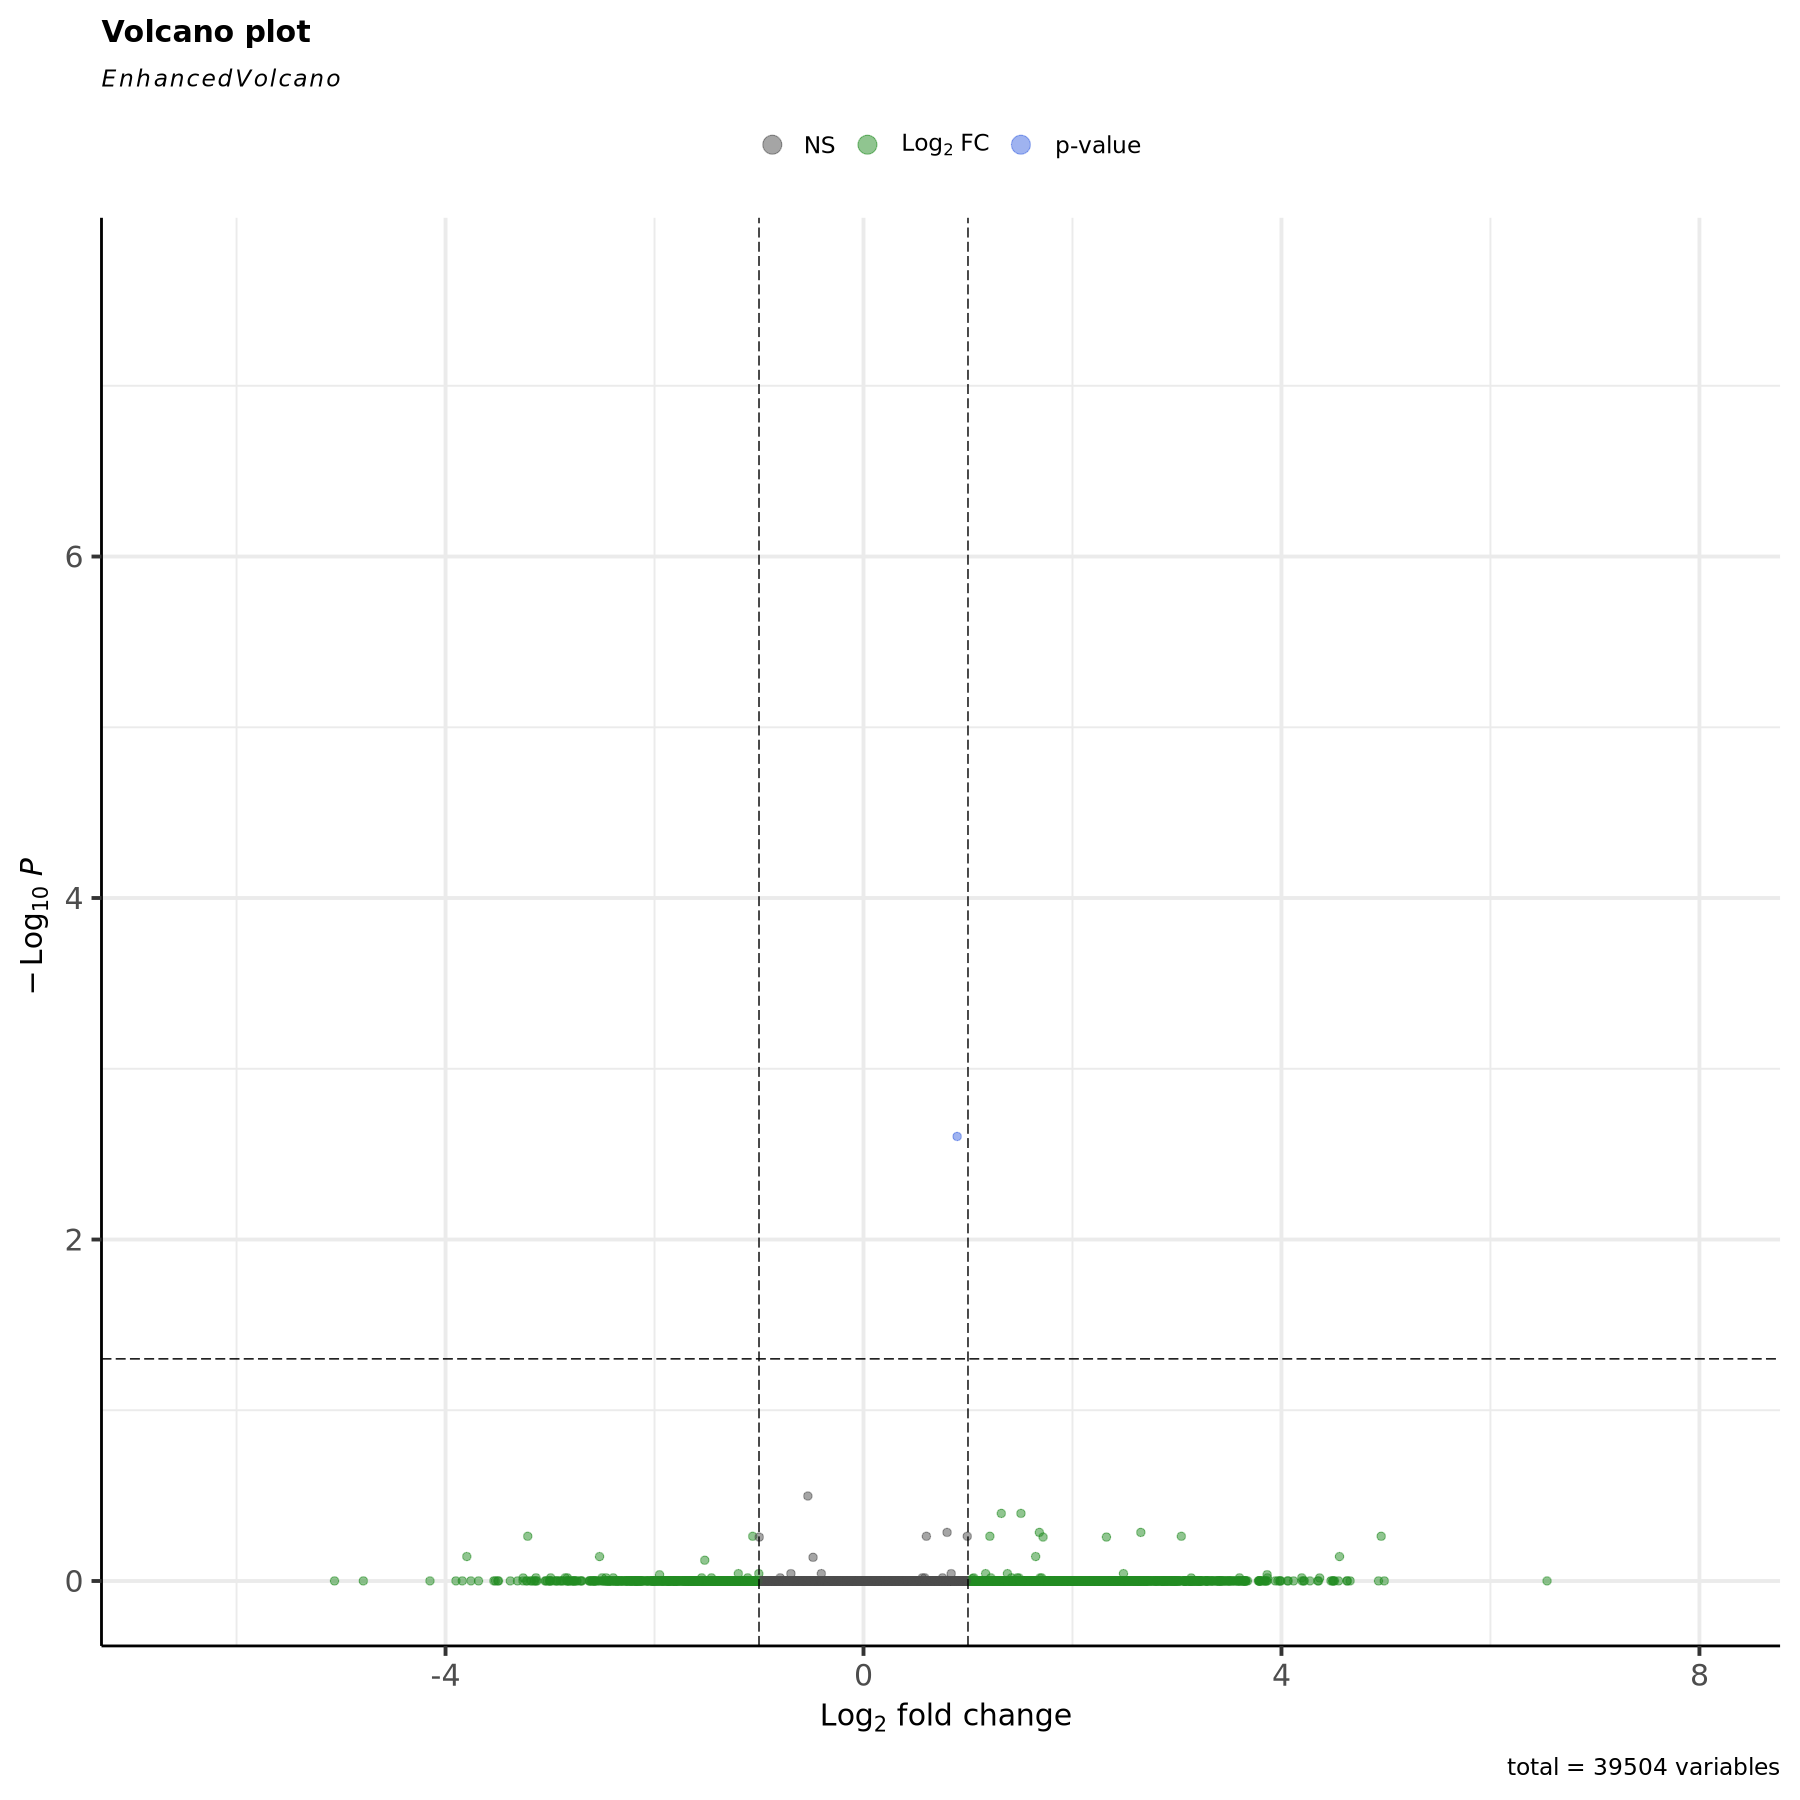

In [69]:
res_t1_oxygen=results(dds_t1, name="T1_oxygen_normoxic_vs_hypoxic")

summary(res_t1_oxygen)
   
EnhancedVolcano(res_t1_oxygen,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)


out of 17855 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 177, 0.99%
LFC < 0 (down)     : 51, 0.29%
outliers [1]       : 204, 1.1%
low counts [2]     : 13274, 74%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



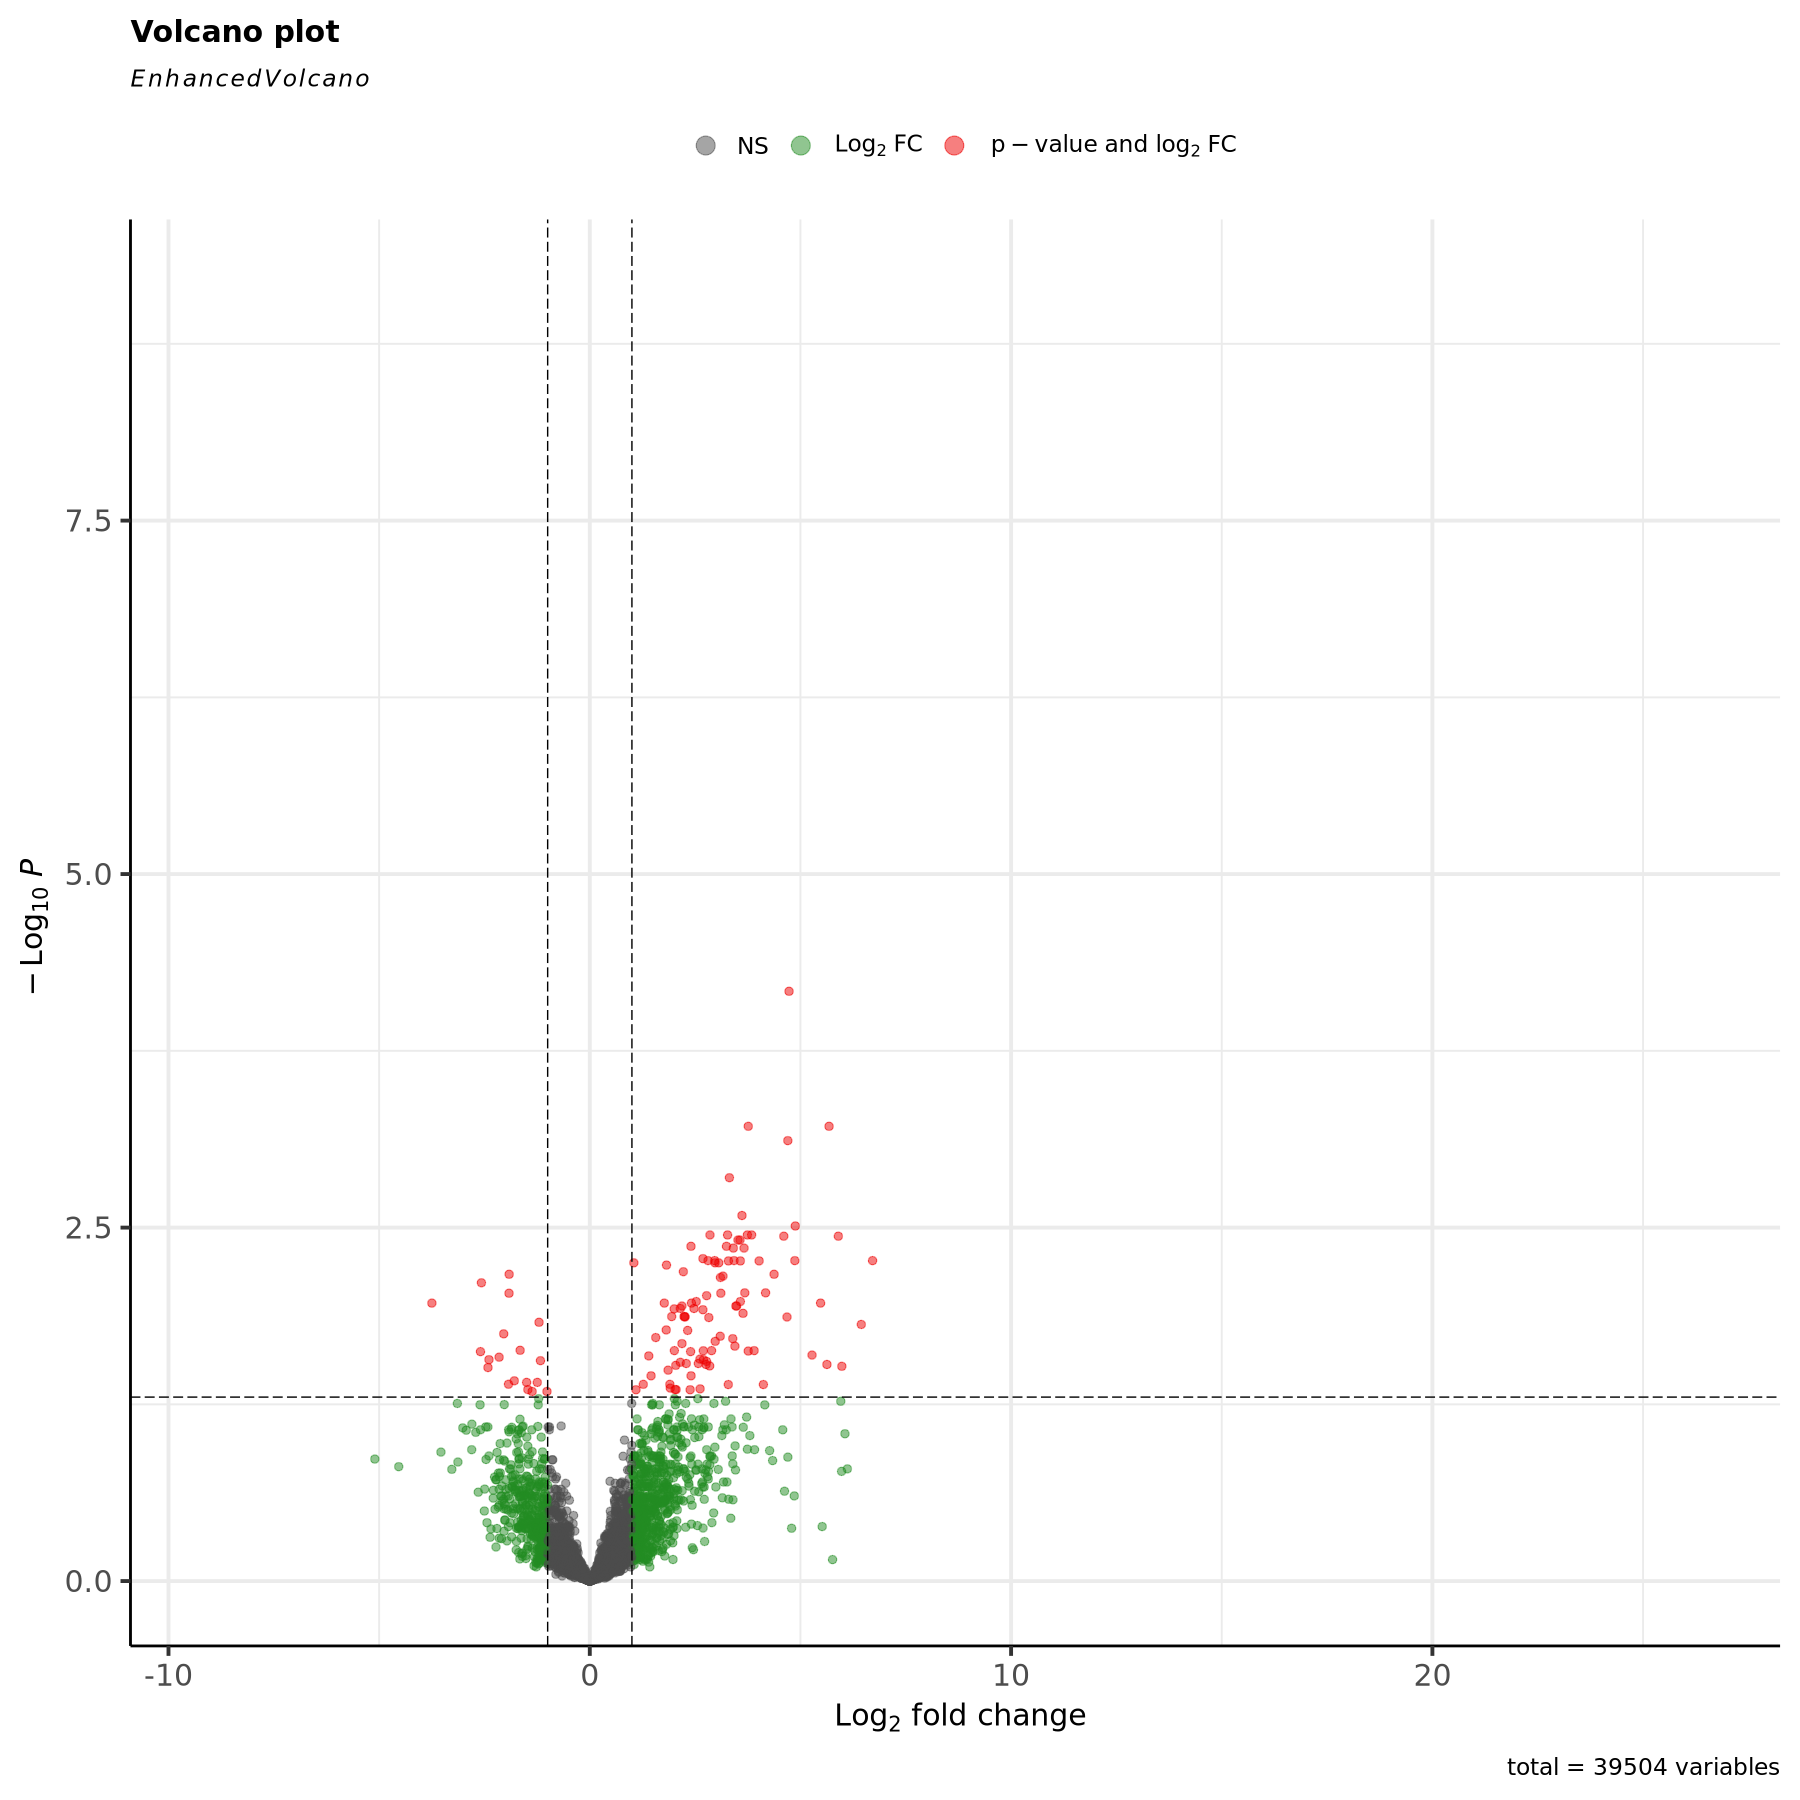

In [70]:
res_t1=results(dds_t1, name="T1_tempwarm.T1_oxygennormoxic")

summary(res_t1)
   
EnhancedVolcano(res_t1,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

#### design = ~T2_temp + T2_oxygen

In [71]:
dds_t2 <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T2_temp + T2_oxygen)
dds_t2=DESeq(dds_t2)
resultsNames(dds_t2)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 641 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "Intercept"                     "T2_temp_warm_vs_ambient"      
[3] "T2_oxygen_normoxic_vs_hypoxic"


out of 17852 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 115, 0.64%
LFC < 0 (down)     : 9, 0.05%
outliers [1]       : 0, 0%
low counts [2]     : 14913, 84%
(mean count < 11)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



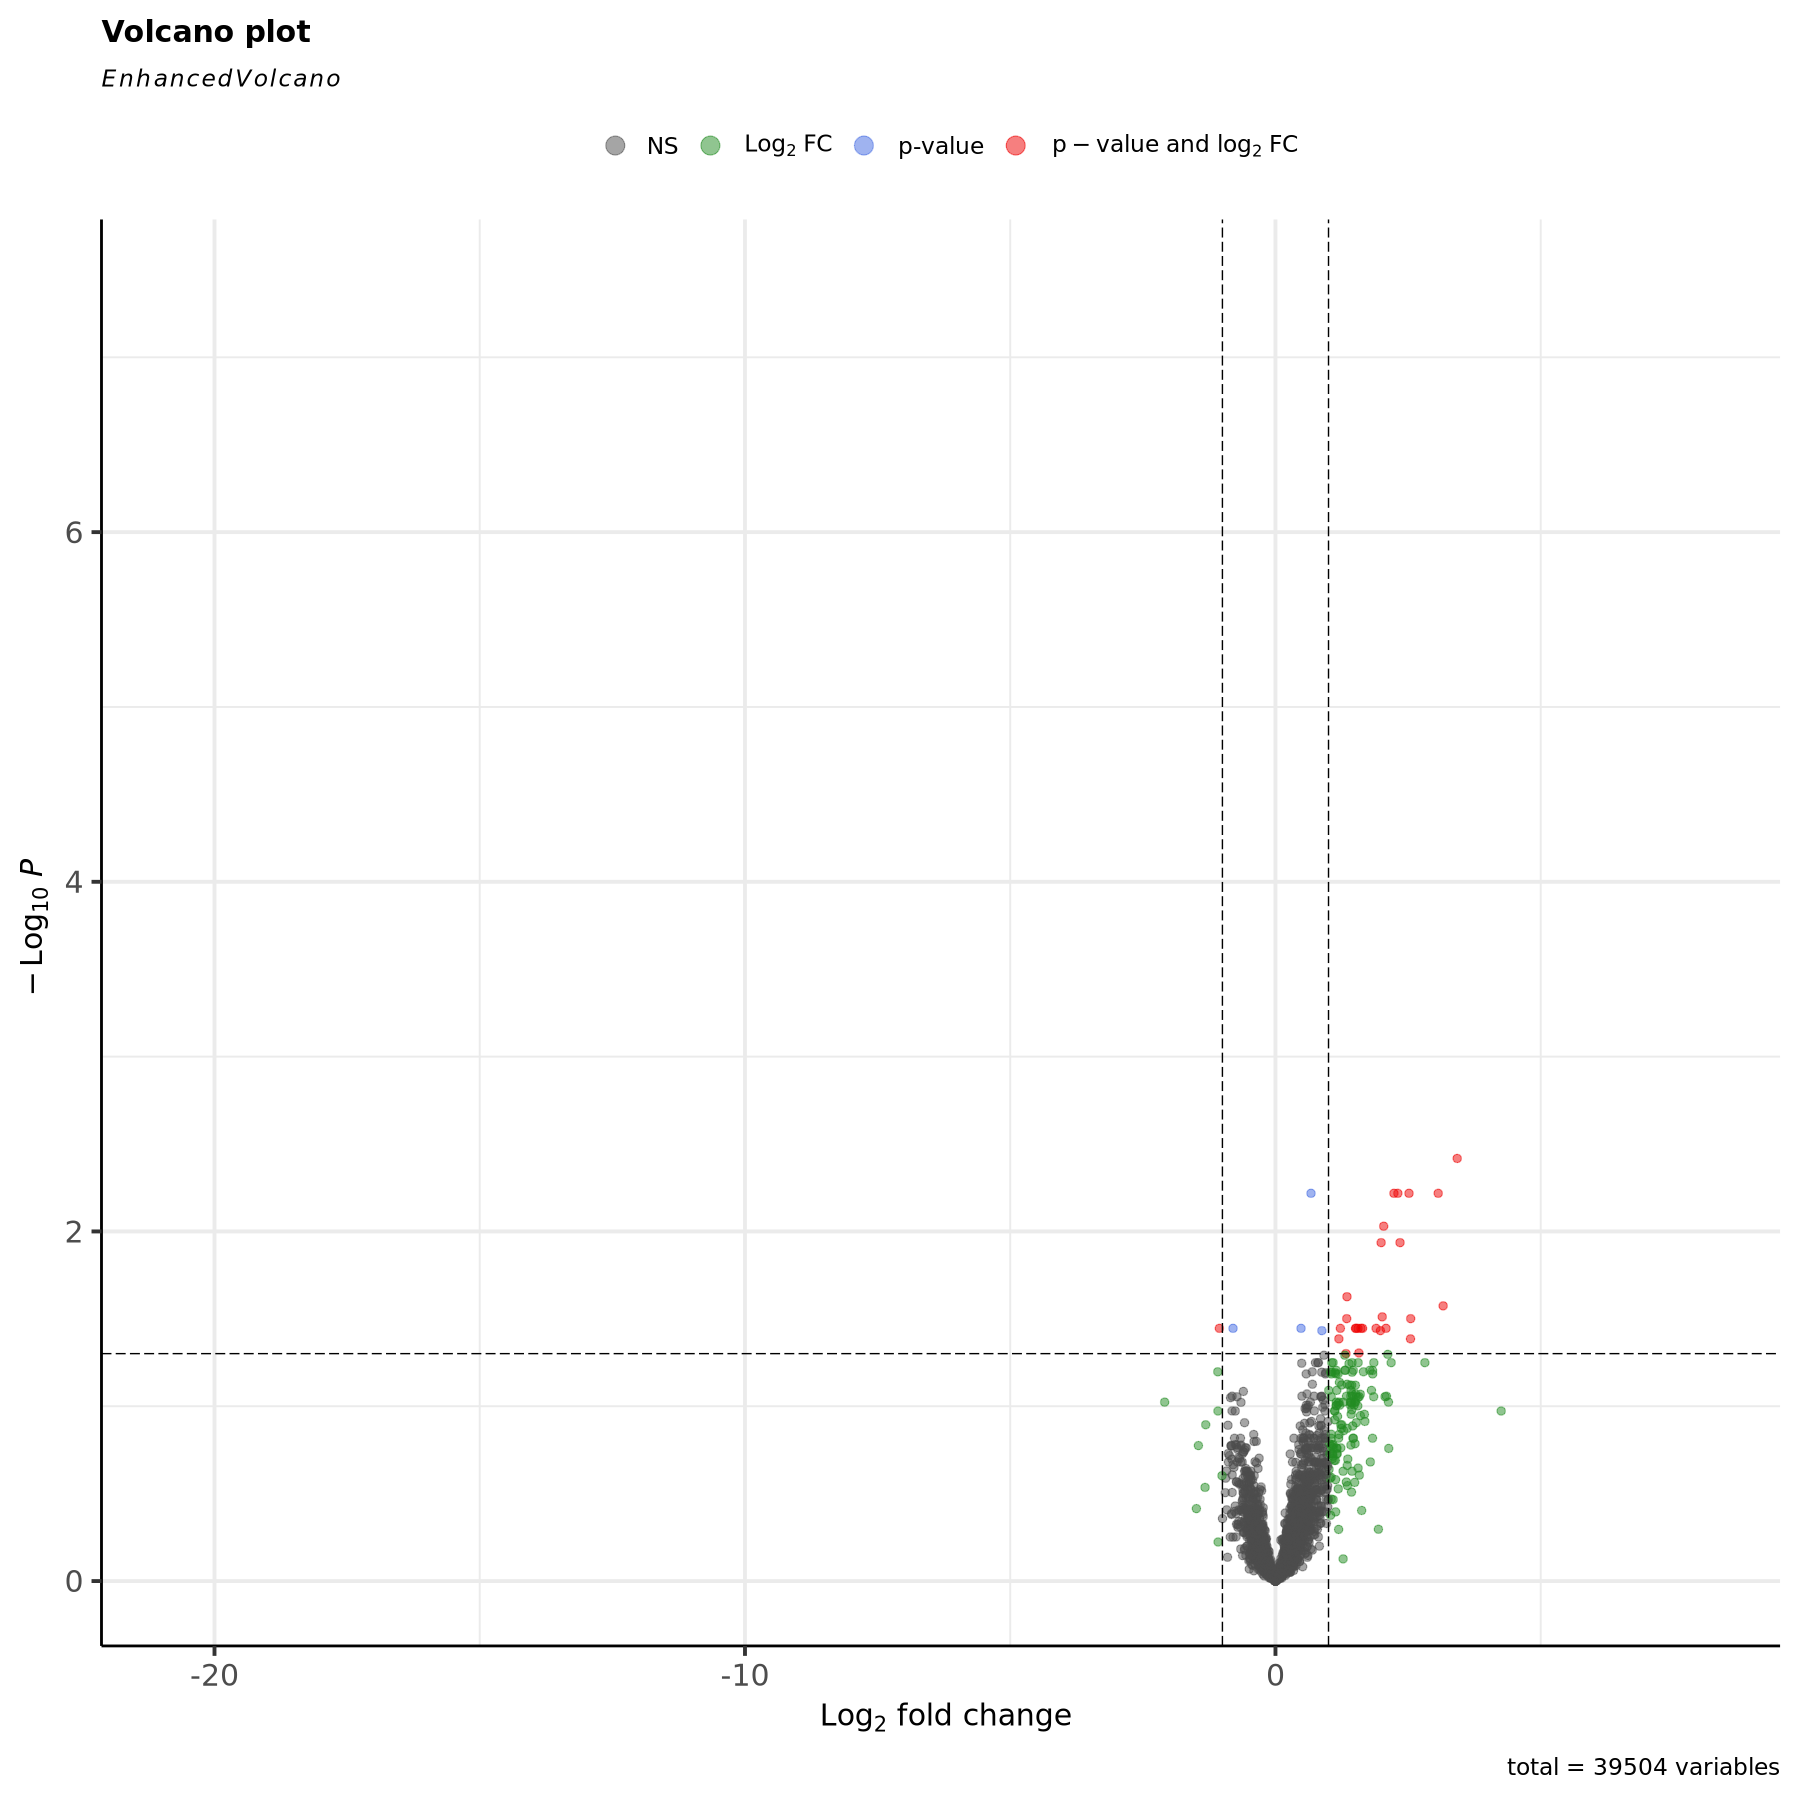

In [72]:
res_t2_temp=results(dds_t2, name="T2_temp_warm_vs_ambient")

summary(res_t2_temp)
   
EnhancedVolcano(res_t2_temp,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)


out of 17852 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 33, 0.18%
LFC < 0 (down)     : 54, 0.3%
outliers [1]       : 0, 0%
low counts [2]     : 10701, 60%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



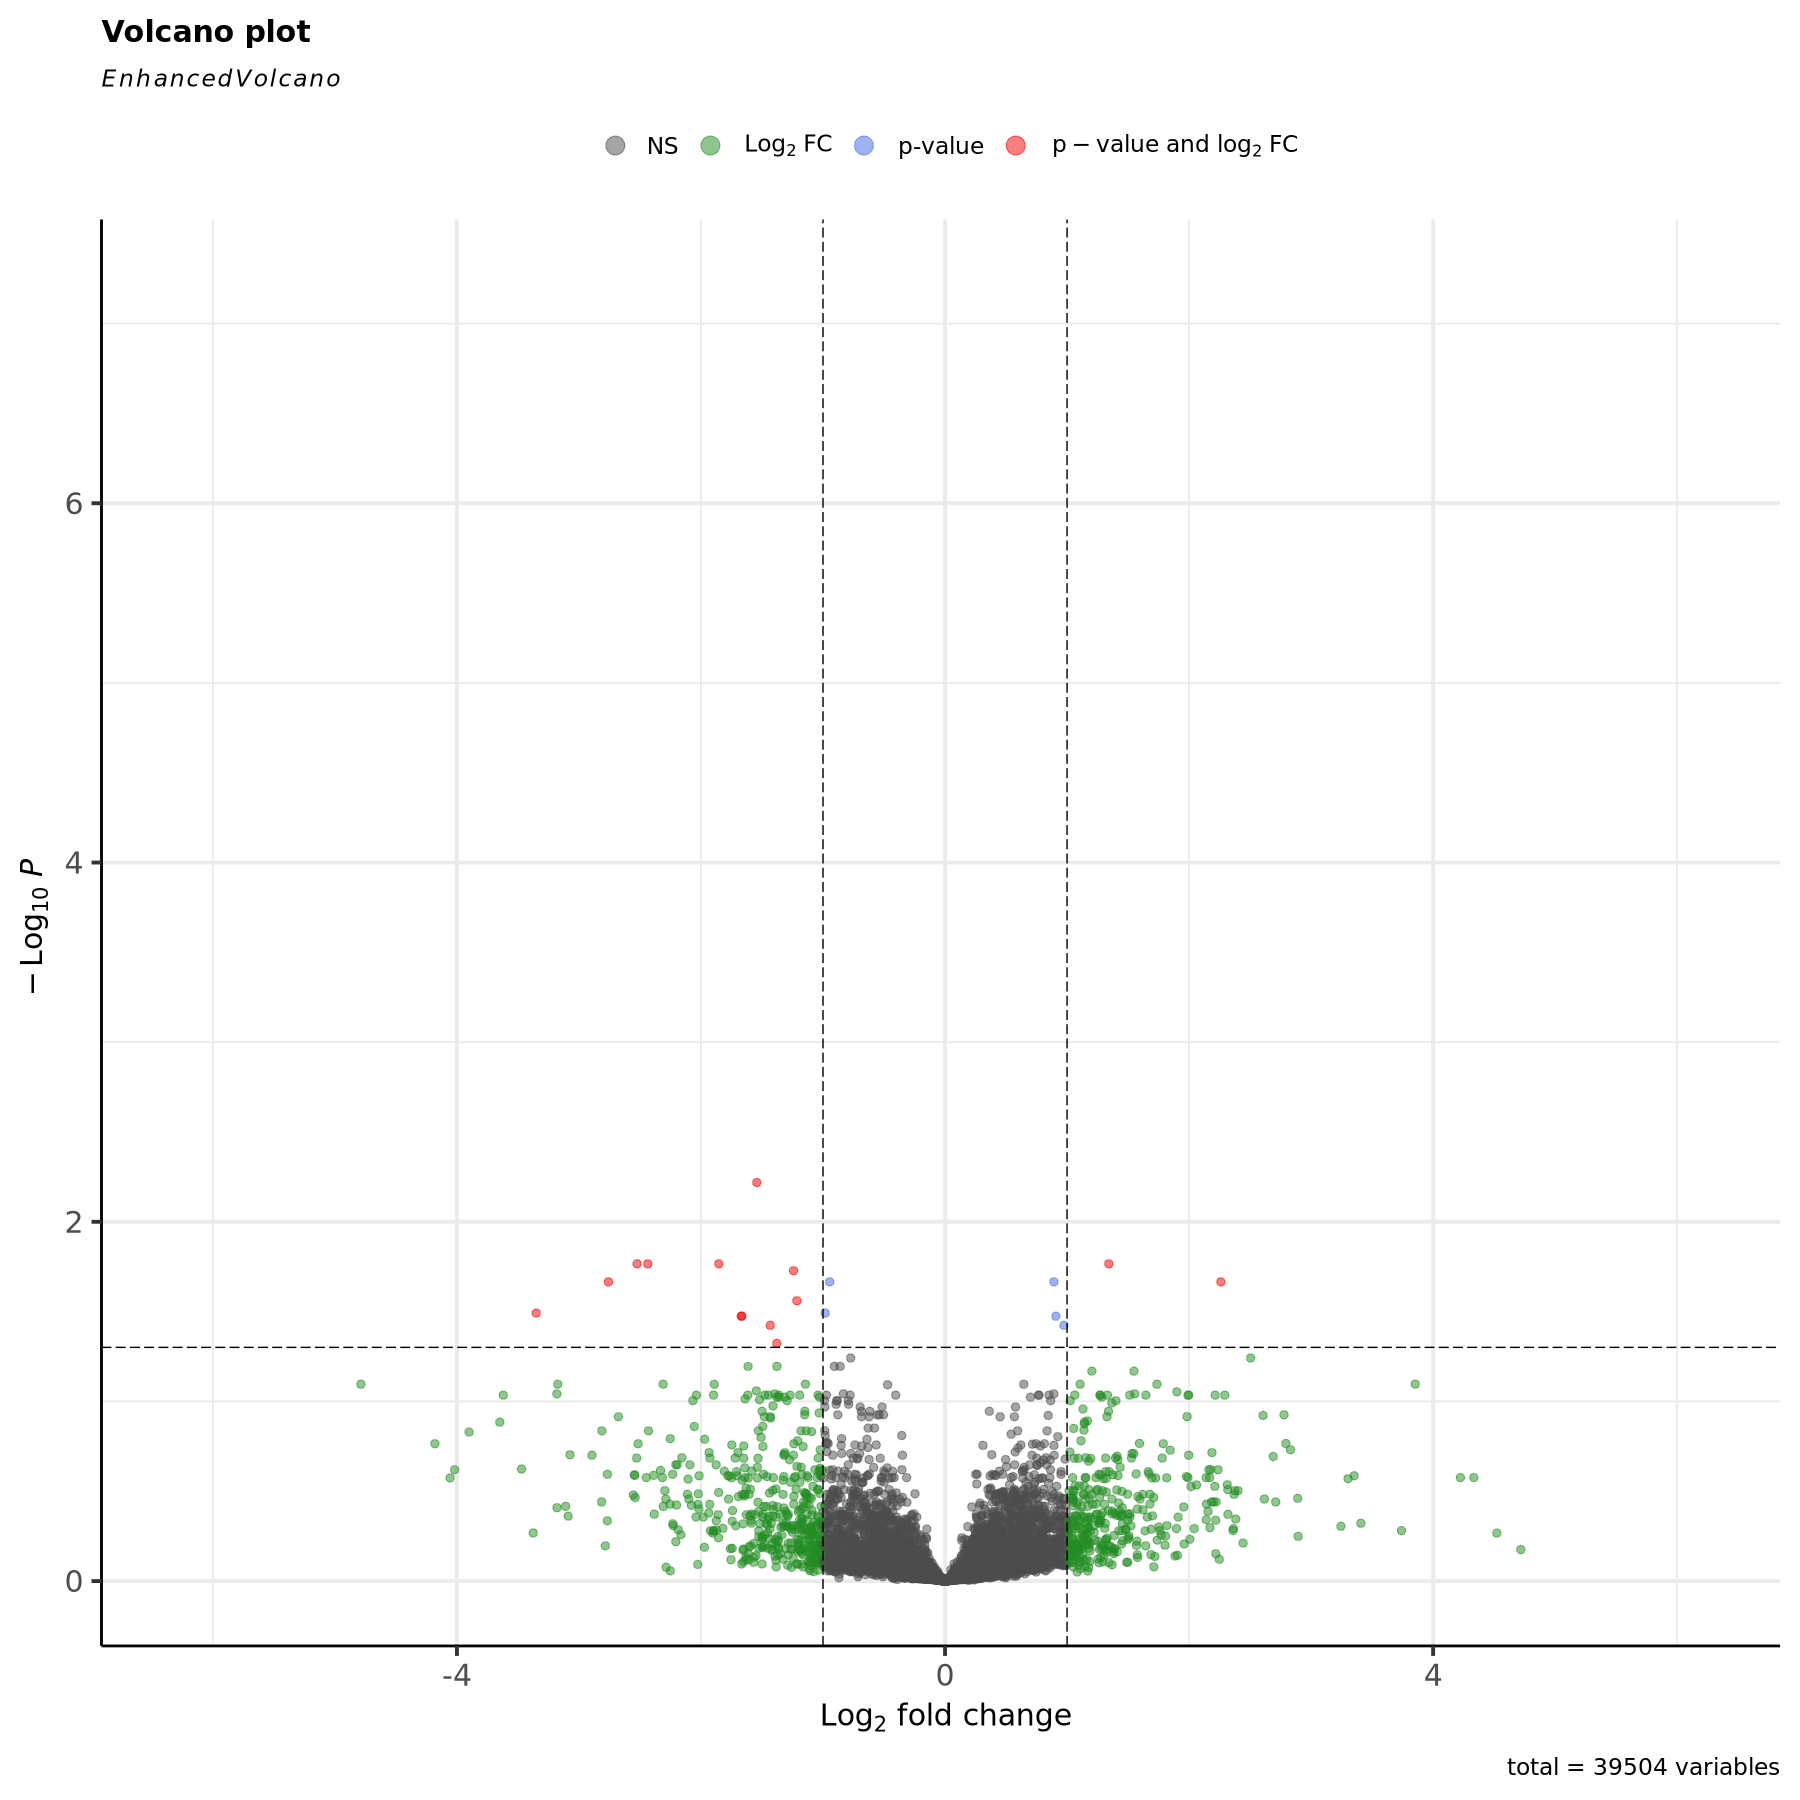

In [73]:
res_t2_oxygen=results(dds_t2, name="T2_oxygen_normoxic_vs_hypoxic")

summary(res_t2_oxygen)
   
EnhancedVolcano(res_t2_oxygen,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

#### design = ~TC1 + TC2
so this doesn't work because (I think) the treatment labels are not unique between TC1 and TC2 (could have normoxic ambient for both) - possible work around is to make new columns to be able to capture all treatment conditions...

In [74]:
meta$phase1 = paste(meta$TC1, '1')
meta$phase2 = paste(meta$TC2, '2')
head(meta)

,sample_ID,unique_ID,T1_code,T2_code,ID_code,T1_oxygen,T1_temp,Tank1,T2_oxygen,T2_temp,Tank2,Phase1,Phase2,phase1,phase2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BBB-WBO-B21,2018--BBB-WBO-B21-CV,BBB-WBO-B21,BBB,WBO,B21,hypoxic,ambient,B,normoxic,ambient,O,hypoxic,control,1,2
BBB-WBV-B70,2018--BBB-WBV-B70-CV,BBB-WBV-B70,BBB,WBV,B70,hypoxic,ambient,B,normoxic,ambient,V,hypoxic,control,1,2
BBO-BBO-B16,2018--BBO-BBO-B16-CV,BBO-BBO-B16,BBO,BBO,B16,hypoxic,ambient,O,hypoxic,ambient,O,hypoxic,hypoxic,1,2
BBO-BBY-B27,2018--BBO-BBY-B27-CV,BBO-BBY-B27,BBO,BBY,B27,hypoxic,ambient,O,hypoxic,ambient,Y,hypoxic,hypoxic,1,2
BBO-WBO-B16,2018--BBO-WBO-B16-CV,BBO-WBO-B16,BBO,WBO,B16,hypoxic,ambient,O,normoxic,ambient,O,hypoxic,control,1,2
BBO-WBV-B64,2018--BBO-WBV-B64-CV,BBO-WBV-B64,BBO,WBV,B64,hypoxic,ambient,O,normoxic,ambient,V,hypoxic,control,1,2


In [75]:
dds_both <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ phase1 + phase2) # don't think you can do this
dds_both=DESeq(dds_both)
resultsNames(dds_both)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [ ]:
meta$temp_treatment = paste(meta$T1_temp, meta$T2_temp)
meta$oxygen_treatment = paste(meta$T1_oxygen, meta$T2_oxygen)
head(meta)

In [ ]:
dds_both <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ temp_treatment + oxygen_treatment) # don't think you can do this
dds_both=DESeq(dds_both)
resultsNames(dds_both)

In [ ]:
res1=results(dds_both, name="temp_treatment_warm.warm_vs_ambient.ambient")

summary(res1)
   
EnhancedVolcano(res1,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res2=results(dds_both, name="oxygen_treatment_hypoxic.normoxic_vs_hypoxic.hypoxic")

summary(res2)
   
EnhancedVolcano(res2,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res3=results(dds_both, name="oxygen_treatment_normoxic.hypoxic_vs_hypoxic.hypoxic")

summary(res3)
   
EnhancedVolcano(res3,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res4=results(dds_both, name="oxygen_treatment_normoxic.normoxic_vs_hypoxic.hypoxic")

summary(res4)
   
EnhancedVolcano(res4,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

#### can look at effect of effect (difference of differences)
[link for example](https://hbctraining.github.io/DGE_workshop_salmon_online/lessons/04a_design_formulas.html#:~:text=The%20design%20formula%20should%20have,of%20variation%20in%20your%20data.&text=The%20tilde%20(%20~%20)%20should%20always,counts%20using%20the%20following%20formula.)

In [ ]:
dds_both <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_temp + T1_oxygen + T1_temp:T1_oxygen)
# includes main effects of temp and oxygen, as well as their interaction (temp:oxygen)
dds_both=DESeq(dds_both)
resultsNames(dds_both)

In [ ]:
res=results(dds_both, name="T1_temp_warm_vs_ambient")

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res=results(dds_both, name="T1_oxygen_normoxic_vs_hypoxic")

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

In [ ]:
res=results(dds_both, name="T1_tempwarm.T1_oxygennormoxic")

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

#### hypoxic warm for phase 2
only grabbing samples that were hypoxic warm for phase 2
this leaves normoxic ambient and hypoxic warm as phase 1 treatments, so we can look at how HW priming affects response later

In [ ]:
# looking at samples that had hypoxic warm for treatment 2
meta_hw=meta[meta$TC2=="hypoxic warm",]
dim(meta_hw)
head(meta_hw)

In [ ]:
# returning T/F for samples in that specific treatment
colnames(counts_gene) %in% meta_hw$unique_ID

In [ ]:
# creating new df that only has samples with that specific treatment 2
counts_hw = counts_gene[,colnames(counts_gene) %in% meta_hw$unique_ID, drop=FALSE]
head(counts_hw)

In [ ]:
# checking that things make sense
dim(counts_hw)
dim(counts_gene)

In [ ]:
dds_hw <- DESeqDataSetFromMatrix(countData = counts_hw,
                              colData = meta_hw,
                              design= ~ TC1)

In [ ]:
unique(meta_hw$TC1)

In [ ]:
# prefiltering
keep <- rowSums(counts(dds_hw)) >= 5
dds_hw <- dds_hw[keep,]

In [ ]:
dds_hw <- DESeq(dds_hw)
res <- results(dds_hw)

In [ ]:
#res
res <- results(dds_hw, contrast=c("TC1","normoxic.ambient","hypoxic.warm"))

In [ ]:
summary(res)

In [ ]:
plotMA(res)

In [ ]:
EnhancedVolcano(res,
                lab=NA,
                x='log2FoldChange',
                y='padj',
                pCutoff = 0.05)

In [ ]:
resultsNames(dds_hw)

In [ ]:
res=results(dds_hw, name='TC1_normoxic.warm_vs_hypoxic.warm')

In [ ]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Warm'

hw_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
hw_plot

so the above is showing all hypoxic warm samples for treatment 2 and looking at treatment 1
* seeing more methylation in normoxic warm
    * from summary(res) - LFC > 0 (up): 78, 0.88%
* less/no methylation in hypoxic warm

In [ ]:
# saving the plot as a pdf file

# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC2_hw.pdf", width=20, height=10) 
# 2. Create a plot
hw_plot
# Close the pdf filegb
dev.off() 

In [ ]:
sig1_stress = res[which(res$padj < 0.05),] 
dim(sig1_stress)
sig1_stress=as.data.frame(sig1_stress)
# 51 rows for 51 p<0.05 (significant) genes

In [ ]:
# adding meta data 
match_rows = rownames(gtf_genes1) %in% rownames(sig1_stress)
gtf_match = gtf_genes1[match_rows,]

In [ ]:
sig_hw_genes = cbind(sig1_stress, gtf_match)
write.csv(sig_hw_genes, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_hw_genes.csv")

what other treatment combos can we look at for phase 2...

In [ ]:
unique(meta$TC2)

#### hypoxic ambient phase 2 samples
only grabbing samples that were HA for phase 2, so phase 1 options are normoxic ambient and hypoxic ambient (just looking at the effect of dissolved oxygen)

how does priming with dissolved oxygen affect response later?

In [ ]:
# filtering out only samples with HA for phase 2
meta_ha <- filter(meta, meta$TC2 == 'hypoxic ambient')
#meta_ha

# what are the treatments of phase 1 for these samples?
unique(meta_ha$TC1)
# HA and NA

In [ ]:
# pulling out the matching samples from the counts matrix
counts_ha = counts_gene[,colnames(counts_gene) %in% meta_ha$unique_ID, drop=FALSE]
head(counts_ha)

In [ ]:
# running DESeq
dds_ha <- DESeqDataSetFromMatrix(countData = counts_ha,
                              colData = meta_ha,
                              design= ~ TC1)

dds_ha <- DESeq(dds_ha)
res_ha <- results(dds_ha)

summary(res_ha)

In [ ]:
resultsNames(dds_ha)

In [ ]:
res_ha=results(dds_ha, name='TC1_normoxic.ambient_vs_hypoxic.ambient')

EnhancedVolcano(res_ha,
                lab=NA,
                x='log2FoldChange',
                y='padj',
                pCutoff = 0.05)

In [ ]:
keyvals <- ifelse(
res_ha$log2FoldChange < -1& res_ha$padj <0.05, "#000066",
  ifelse(res_ha$log2FoldChange > 1& res_ha$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Ambient'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

ha_plot <- EnhancedVolcano(res_ha,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(res_ha)[which(names(keyvals) %in% c('More methylation in Normoxic Ambient', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
ha_plot

above is looking at only samples that were hypoxic ambient for phase 2

#### normoxic ambient samples for phase 2 
looking at only samples that were normoxic ambient for phase 2 treatments, phase 1 treatment options were normoxic ambient and hypoxic ambient

In [ ]:
# pulling out only samples that were NA for phase 2
meta_na <- filter(meta, meta$TC2 == 'normoxic ambient')
# looking at the unique treatments for phase 1 of these samples
unique(meta_na$TC1)

In [ ]:
# pulling out the matching samples from the counts matrix
counts_na = counts_gene[,colnames(counts_gene) %in% meta_na$unique_ID, drop=FALSE]
head(counts_na)

In [ ]:
# running DESeq
dds_na <- DESeqDataSetFromMatrix(countData = counts_na,
                              colData = meta_na,
                              design= ~ TC1)

dds_na <- DESeq(dds_na)
res_na <- results(dds_na)

summary(res_na)

In [ ]:
resultsNames(dds_na)

In [ ]:
res_na=results(dds_ha, name='TC1_normoxic.ambient_vs_hypoxic.ambient')

keyvals <- ifelse(
res_na$log2FoldChange < -1& res_na$padj <0.05, "#000066",
  ifelse(res_na$log2FoldChange > 1& res_na$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Ambient'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

na_plot <- EnhancedVolcano(res_na,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj', # so we are using padj...
    selectLab = rownames(res_na)[which(names(keyvals) %in% c('More methylation in Normoxic Ambient', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05, # and have our p-value cutoff to 0.05
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
na_plot

above is looking at normoxic ambient samples for phase 2

#### design= ~TC1

this is using *all* samples and looking at TC1 as the design value

In [ ]:
dds_TC1 <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ TC1)
dds_TC1=DESeq(dds_TC1)

In [ ]:
resultsNames(dds_TC1)

TC1 hypoxic warm vs hypoxic ambient 

In [ ]:
res_TC1=results(dds_TC1, name="TC1_hypoxic.warm_vs_hypoxic.ambient")
    
sig1_TC1 = res[which(res$padj < 0.05), ]
     
dim(sig1_TC1)

summary(res_TC1)
   
EnhancedVolcano(res_TC1,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff = 0.05)


In [ ]:
keyvals <- ifelse(
res_TC1$log2FoldChange < -1& res_TC1$padj <0.05, "#000066",
  ifelse(res_TC1$log2FoldChange > 1& res_TC1$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Hypoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

TC1_hw_ha_plot <- EnhancedVolcano(res_TC1,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res_TC1)[which(names(keyvals) %in% c('More methylation in Hypoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
TC1_hw_ha_plot

TC1 normoxic warm vs hypoxic ambient 

In [ ]:
## this one has a lot of differential methylation
# same deal, all samples, design=~TC1
res_nw_ha=results(dds_TC1, name="TC1_normoxic.warm_vs_hypoxic.ambient")
    
sig1_nw_ha = res_nw_ha[which(res_nw_ha$padj < 0.05), ]
     
dim(sig1_nw_ha)

summary(res_nw_ha)

EnhancedVolcano(res_nw_ha,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj',pCutoff=0.05)

In [ ]:
keyvals <- ifelse(
res_nw_ha$log2FoldChange < -1& res_nw_ha$padj <0.05, "#000066",
  ifelse(res_nw_ha$log2FoldChange > 1& res_nw_ha$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

In [ ]:
TC1_nw_ha_plot <- EnhancedVolcano(res_nw_ha,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res_nw_ha)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
TC1_nw_ha_plot

methylation differences between TC1 (phase one treatment conditions) as the design

saving plot as PDF

In [ ]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC1_nw_v_ha.pdf", width=20, height=10) 
# 2. Create a plot
TC1_plot
# Close the pdf filegb
dev.off() 

In [ ]:
summary(res)
sig1_t=as.data.frame(sig1_t)
head(sig1_t)
# adding meta data 
match_rows = rownames(gtf_genes1) %in% rownames(sig1_t)
gtf_match = gtf_genes1[match_rows,]

sig_1t_stress = cbind(sig1_t, gtf_match)
head(sig_1t_stress)

write.csv(sig_1t_stress, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_TC1_normoxic.warm_vs_hypoxic.ambient.csv")

TC1 normoxic ambient vs hypoxic ambient

In [ ]:
res_na_ha=results(dds_TC1, name="TC1_normoxic.ambient_vs_hypoxic.ambient")

sig1_na_ha = res_na_ha[which(res_na_ha$padj < 0.05), ]
     
dim(sig1_na_ha)
   

EnhancedVolcano(res_na_ha,
                lab=NA,
                x = 'log2FoldChange',
                y = 'padj', pCutoff=0.05)

#### design= ~TC2

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ TC2)
dds=DESeq(dds)
resultsNames(dds)

TC2 hypoxic warm vs hypoxic ambient

In [ ]:
res=results(dds, name="TC2_hypoxic.warm_vs_hypoxic.ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Hypoxic Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

In [ ]:
TC2_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')

TC2_plot

In [ ]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC2_hw_v_ha.pdf", width=20, height=10) 
# 2. Create a plot
TC2_plot
# Close the pdf file
dev.off() 

TC2 normoxic ambient vs hypoxic ambient

In [ ]:
res=results(dds, name="TC2_normoxic.ambient_vs_hypoxic.ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)
   
EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic Ambient'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic Ambient'

hw_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
hw_plot

In [ ]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("TC2_ha_v_na.pdf", width=20, height=10) 
# 2. Create a plot
hw_plot
# Close the pdf file
dev.off() 

#### design = ~T2_temp

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T2_temp)
dds=DESeq(dds)

resultsNames(dds)

In [ ]:
res=results(dds, name="T2_temp_warm_vs_ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

#### design = ~T1_temp

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_temp)
dds=DESeq(dds)

resultsNames(dds)

In [ ]:
res=results(dds, name="T1_temp_warm_vs_ambient")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Ambient'

In [ ]:
T1temp_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')

T1temp_plot

saving as pdf

In [ ]:
# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("T1_temp.pdf", width=20, height=10) 
# 2. Create a plot
T1temp_plot
# Close the pdf filegb
dev.off() 

saving significant genes into a csv file

In [ ]:
summary(res)
sig1_t=as.data.frame(sig1_t)
head(sig1_t)
# adding meta data 
match_rows = rownames(gtf_genes1) %in% rownames(sig1_t)
gtf_match = gtf_genes1[match_rows,]

sig_1t_stress = cbind(sig1_t, gtf_match)
head(sig_1t_stress)

write.csv(sig_1t_stress, "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/significant_genes/sig_T1_temp.csv")

#### design = ~T1_oxygen

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T1_oxygen)
dds=DESeq(dds)

resultsNames(dds)

In [ ]:
res=results(dds, name="T1_oxygen_normoxic_vs_hypoxic")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)

summary(res)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in Normoxic'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in Hypoxic'

hw_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')
hw_plot

# Open a pdf file
setwd("/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/CE_methyl_analysis/figures")
pdf("T1_oxygen.pdf", width=20, height=10) 
# 2. Create a plot
hw_plot
# Close the pdf file
dev.off() 

#### design = ~T2_oxygen

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ T2_oxygen)
dds=DESeq(dds)

resultsNames(dds)

In [ ]:
res=results(dds, name="T2_oxygen_normoxic_vs_hypoxic")
    
sig1_t = res[which(res$padj < 0.05), ]
     
dim(sig1_t)
   

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

doesn't seem that oxygen has a big impact/influence on methylation 

#### looking at carryover effects

In [ ]:
head(meta)

In [ ]:
meta$all_TC = paste(meta$TC1, meta$TC2)

In [ ]:
unique(meta$all_TC)

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = counts_gene,
                              colData = meta,
                              design= ~ all_TC)
dds=DESeq(dds)

resultsNames(dds)

In [ ]:
res=results(dds, name="all_TC_hypoxic.ambient.normoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
res=results(dds, name="all_TC_hypoxic.warm.hypoxic.warm_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
res=results(dds, name="all_TC_normoxic.ambient.hypoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
res=results(dds, name="all_TC_normoxic.ambient.normoxic.ambient_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
res=results(dds, name="all_TC_normoxic.warm.hypoxic.warm_vs_hypoxic.ambient.hypoxic.ambient")
    
sig = res[which(res$padj < 0.05), ]
     
dim(sig)

summary(res)

EnhancedVolcano(res,
                lab=NA,
                x = 'log2FoldChange',
                y = 'pvalue')

In [ ]:
keyvals <- ifelse(
res$log2FoldChange < -1& res$padj <0.05, "#000066",
  ifelse(res$log2FoldChange > 1& res$padj <0.05,"#FF6666" ,
    'grey'))
keyvals[is.na(keyvals)] <- 'grey'
names(keyvals)[keyvals == "#FF6666"] <- 'More methylation in normoxic.warm.hypoxic.warm'
names(keyvals)[keyvals == 'grey'] <- 'Not significant'
names(keyvals)[keyvals == "#000066"] <- 'More methylation in hypoxic.ambient.hypoxic.ambient'

In [ ]:
T1temp_plot <- EnhancedVolcano(res,
    lab = NA,
    x = 'log2FoldChange',
    y = 'padj',
    selectLab = rownames(res)[which(names(keyvals) %in% c('More methylation in Normoxic Warm', 'More methylation in Hypoxic Ambient'))],
    xlab = bquote(~Log[2]~ 'fold change'),
    pointSize = 3.5,
    pCutoff = 0.05,
    colCustom = keyvals,
    colAlpha = 1,
    legendPosition = 'left',
    legendLabSize = 30,
    legendIconSize = 5.0,
    drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
    arrowheads = FALSE,
    gridlines.major = TRUE,
    gridlines.minor = FALSE,
    border = 'partial',
    borderWidth = 0.5,
    borderColour = 'black')

T1temp_plot